In [ ]:
pip install yfinance


     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 9.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install cvxopt

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import math
from numpy.linalg import eig
from tabulate import tabulate
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [ ]:
tickers_list = ['VFINX', 'VBMFX', 'VGSLX', 'VIMAX', 'VGTSX', 'VGENX', 'GS', 'JPM', 'WFC']
data = [np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252)]
#Get Data for all stocks by year
data[16] = (yf.download(tickers_list,'2005-01-01','2005-12-30')['Adj Close'])
data[15] = (yf.download(tickers_list,'2006-01-01','2006-12-30')['Adj Close'])
data[14] = (yf.download(tickers_list,'2007-01-01','2007-12-30')['Adj Close'])
data[13] = (yf.download(tickers_list,'2008-01-01','2008-12-30')['Adj Close'])
data[12] = (yf.download(tickers_list,'2009-01-01','2009-12-30')['Adj Close'])
data[11] = (yf.download(tickers_list,'2010-01-01','2010-12-30')['Adj Close'])
data[10] = (yf.download(tickers_list,'2011-01-01','2011-12-30')['Adj Close'])
data[9] = (yf.download(tickers_list,'2012-01-01','2012-12-30')['Adj Close'])
data[8] = (yf.download(tickers_list,'2013-01-01','2013-12-30')['Adj Close'])
data[7] = (yf.download(tickers_list,'2014-01-01','2014-12-30')['Adj Close'])
data[6] = (yf.download(tickers_list,'2015-01-01','2015-12-30')['Adj Close'])
data[5] = (yf.download(tickers_list,'2016-01-01','2016-12-30')['Adj Close'])
data[4] = (yf.download(tickers_list,'2017-01-01','2017-12-30')['Adj Close'])
data[3] = (yf.download(tickers_list,'2018-01-01','2018-12-30')['Adj Close'])
data[2] = (yf.download(tickers_list,'2019-01-01','2019-12-30')['Adj Close'])
data[1] = yf.download(tickers_list,'2020-01-01','2020-12-30')['Adj Close']
data[0] = yf.download(tickers_list,'2021-01-01','2021-12-30')['Adj Close']
# Remove invalid values

returns = [np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252),np.zeros(252)]

for i in range(17):
  returns[i] = data[i].pct_change()
  returns[i].dropna(inplace = True)


print(returns[0])

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%********

In [ ]:
frames = []
shape = [249,250,249,249,250,251,249,249,249,248,251,249,250,251,249,250,251]

for i in range(17):
    frames.append(returns[i].reindex(index = returns[i].index[::-1]))


rolled_ret = pd.concat(frames)
rolled_av = []
sum = 0
roll_ret = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(16):
    for j in range(4):
        roll_ret[i].append(rolled_ret.iloc[(sum + 63*j):(sum + 63*j + 252)])

    sum = sum + shape[i]

In [ ]:
# Rolling data
# Rolling split into quarterly, so 4 datapts per year so total 64 per year (64*3 = 192 total)
def calc_A_m(vec,OneVect): # A = T(ones)* Inv(V)* ones
    OneVectorTrans = np.transpose(OneVect)
    inverse = np.linalg.inv(vec)
    inverse = np.matmul(OneVectorTrans,inverse)
    inverse = np.matmul(inverse,OneVect)
    return inverse

def calc_B_m(vec,OneVect,m): #B = T(ones)* Inv(V)* means
    OneVectorTrans = np.transpose(OneVect)
    inverse = np.linalg.inv(vec)
    inverse = np.matmul(OneVectorTrans,inverse)
    inverse = np.matmul(inverse,m)
    return inverse

def calc_C_m(vec,m):         #C = T(means)* Inv(V)* means
    mTrans = np.transpose(m)
    inverse = np.linalg.inv(vec)
    inverse = np.matmul(mTrans,inverse)
    inverse = np.matmul(inverse,m)
    return inverse

roll_means = []
roll_var = []
roll_a = []
roll_b = []
roll_c = []
roll_o = []
roll_u = []
roll_v = []
rrt = []
roll_q = []

for i in range(16):
    means = [[],[],[]]
    var = [[],[],[]]
    a = [[],[],[]]
    b = [[],[],[]]
    c = [[],[],[]]
    o = [[],[],[]]
    u = [[],[],[]]
    v = [[],[],[]]
    for dset in roll_ret[i]:
        means[0].append([dset['VFINX'].sum()*(1/len(dset)),dset['VBMFX'].sum()*(1/len(dset)),dset['VGSLX'].sum()*(1/len(dset))])
    
        means[1].append([dset['VFINX'].sum()*(1/len(dset)),dset['VBMFX'].sum()*(1/len(dset)),dset['VGSLX'].sum()*(1/len(dset)),
              dset['VIMAX'].sum()*(1/len(dset)),dset['VGTSX'].sum()*(1/len(dset)),dset['VGENX'].sum()*(1/len(dset))])
        means[2].append([dset['VFINX'].sum()*(1/len(dset)),dset['VBMFX'].sum()*(1/len(dset)),dset['VGSLX'].sum()*(1/len(dset)),
              dset['VIMAX'].sum()*(1/len(dset)),dset['VGTSX'].sum()*(1/len(dset)),dset['VGENX'].sum()*(1/len(dset)),
              dset['GS'].sum()*(1/len(dset)),dset['JPM'].sum()*(1/len(dset)),dset['WFC'].sum()*(1/len(dset))])
        var[0].append((dset[['VFINX','VBMFX','VGSLX']]).cov())
        var[1].append((dset[['VFINX', 'VBMFX', 'VGSLX', 'VIMAX', 'VGTSX', 'VGENX']]).cov())
        var[2].append(dset.cov())
        rrt.append(dset)

        for i in range(3):
            
            a[i].append(calc_A_m(var[i][-1],np.ones(len(means[i][-1]))))
            b[i].append(calc_B_m(var[i][-1],np.ones(len(means[i][-1])),means[i][-1]))
            c[i].append(calc_C_m(var[i][-1],means[i][-1]))
            
        for i in range(3):
            o[i].append(1/math.sqrt(a[i][-1]))
            u[i].append((b[i][-1]/a[i][-1]))
            v[i].append(math.sqrt(((a[i][-1]*c[i][-1]) - b[i][-1]**2)/a[i][-1]))
        

    roll_means.append(means)#Means
    roll_var.append(var)

    roll_a.append(a)
    roll_b.append(b)
    roll_c.append(c)

    roll_o.append(o)
    roll_u.append(u)
    roll_v.append(v)

rollvarf = np.zeros((16,4,9,9))

for i in range(16):
  for k in range(3):
      for j in range(4):
        roll_ret[i][j] = np.array(roll_ret[i][j])
        roll_var[i][k][j] = np.array(roll_var[i][k][j])#Variance

for i in range(len(rrt)):
  rrt[i] = rrt[i].to_numpy()#Returns




In [ ]:
fmv = np.zeros((16,4,9))
formatter = "{0:.4f}"

for i in  range(16):
  for j in range(4):
    inverse = (1/roll_a[i][2][j]) * np.linalg.inv(roll_var[i][2][j])
    inverse = np.matmul(inverse,np.ones(len(roll_means[i][2][j])))
    fmv[i][j] = (inverse)



In [ ]:

usi = [4.89,4.89,4.89,4.89, 3.29, 3.29, 3.29, 3.29, 0.11, 0.11, 0.11, 0.11, 0.06, 0.06, 0.06, 0.06, 0.12, 0.12, 0.12, 0.12, 0.02, 0.02, 0.02, 0.02, 0.05, 0.05, 0.05, 0.05, 0.07, 0.07, 0.07, 0.07, 0.04, 0.04, 0.04, 0.04, 0.16, 0.16, 0.16, 0.16, 0.50, 0.50, 0.50, 0.50, 1.37, 1.37, 1.37, 1.37, 2.40, 2.40, 2.40, 2.40, 1.52, 1.52, 1.52, 1.52, 0.09, 0.09, 0.09, 0.09, 0.06, 0.06, 0.06, 0.06]
usi = usi[::-1]
usi.reverse()
ucl = []
for i in range(len(usi)):
  usi[i] = usi[i] * .01
  ucl.append(usi[i] + .0003)

tft = 1/252
for i in range(len(usi)):
    usi[i] = (1+usi[i])**(tft)-1
    ucl[i] = (1+ucl[i])**(tft)-1


In [ ]:
fst = []
fct = []
count = 0
for i in  range(16):
    for j in range(4):
        for k in range(3):
            inverse = (roll_o[i][k][j]**2/(roll_u[i][k][j] - usi[count])) * np.linalg.inv(roll_var[i][k][j])
            fst.append(np.matmul(inverse,(roll_means[i][k][j] - usi[count]*np.ones(len(roll_means[i][k][j])))))
            inverse = (roll_o[i][k][j]**2/(roll_u[i][k][j] - ucl[count])) * np.linalg.inv(roll_var[i][k][j])
            fct.append(np.matmul(inverse,(roll_means[i][k][j] - ucl[count]*np.ones(len(roll_means[i][k][j])))))
        count = count + 1
            

In [ ]:
#I used a nonstandard quadprog more in line with matlabs quadprog found here https://github.com/nolfwin/cvxopt_quadprog
#Part 8 Felt
import cvxopt

def quadprog(H, f, L=None, k=None, Aeq=None, beq=None, lb=None, ub=None):
    """
    Input: Numpy arrays, the format follows MATLAB quadprog function: https://www.mathworks.com/help/optim/ug/quadprog.html
    Output: Numpy array of the solution
    """
    n_var = H.shape[1]

    P = cvxopt.matrix(H, tc='d')
    q = cvxopt.matrix(f, tc='d')

    if L is not None or k is not None:
        assert(k is not None and L is not None)
        if lb is not None:
            L = np.vstack([L, -np.eye(n_var)])
            k = np.vstack([k, -lb])

        if ub is not None:
            L = np.vstack([L, np.eye(n_var)])
            k = np.vstack([k, ub])

        L = cvxopt.matrix(L, tc='d')
        k = cvxopt.matrix(k, tc='d')

    if Aeq is not None or beq is not None:
        assert(Aeq is not None and beq is not None)
        Aeq = cvxopt.matrix(Aeq, tc='d')
        beq = cvxopt.matrix(beq, tc='d')

    sol = cvxopt.solvers.qp(P, q, L, k, Aeq, beq)

    return np.array(sol['x'])

n = 99




In [ ]:
umnf = np.zeros((16,3,4))
umxf = np.zeros((16,3,4))
flffA = np.zeros((16,4,n+1,3))
flffAB = np.zeros((16,4,n+1,6))
flffABC = np.zeros((16,4,n+1,9))
oflff = np.zeros((16,3,4,n+1))
ukf = np.zeros((16,3,4,n+1))


for i in range(16):
  for j in range(4):
    for k in range(3):
      umnf[i][k][j] = min(roll_means[i][k][j])
      umndx = roll_means[i][k][j].index(umnf[i][k][j])
      umxf[i][k][j] = max(roll_means[i][k][j])
      umxdx = roll_means[i][k][j].index(umxf[i][k][j])

      alt = np.array(roll_var[i][k][j])
      blt = np.zeros(len(roll_means[i][k][j]))
      clt = np.identity(len(roll_means[i][k][j])) * -1
      dlt = np.zeros(len(roll_means[i][k][j]))  
      ceq = np.array([np.ones(len(roll_means[i][k][j])).T,np.array(roll_means[i][k][j])])
      counter = 0
      while(counter < n):
        ukf[i][k][j][counter] = (umnf[i][k][j] + ((counter*(umxf[i][k][j] - umnf[i][k][j]))/n))
        deq = [1, ukf[i][k][j][counter]]
        if(k == 0):
          flffA[i][j][counter][:] = (quadprog(alt,blt,clt,dlt,ceq,deq)).T
          oflff[i][k][j][counter] = math.sqrt(np.matmul(np.matmul(flffA[i][j][counter][:].T,roll_var[i][k][j]),flffA[i][j][counter][:]))
        elif(k == 1):
          flffAB[i][j][counter][:] = (quadprog(alt,blt,clt,dlt,ceq,deq)).T
          oflff[i][k][j][counter] = math.sqrt(np.matmul(np.matmul(flffAB[i][j][counter][:].T,roll_var[i][k][j]),flffAB[i][j][counter][:]))
        else:
          flffABC[i][j][counter][:] = (quadprog(alt,blt,clt,dlt,ceq,deq)).T
          oflff[i][k][j][counter] = math.sqrt(np.matmul(np.matmul(flffABC[i][j][counter][:].T,roll_var[i][k][j]),flffABC[i][j][counter][:]))
        
        counter = counter + 1
      
      mndxar = np.zeros(len(roll_means[i][k][j]))
      mndxar[umndx] = 1
      
      if(k == 0):
        flffA[i][j][0] = mndxar
        flffA[i][j][counter] = mndxar
      if(k == 1):
        flffAB[i][j][0] = mndxar
        flffAB[i][j][counter] = mndxar
      if(k == 2):
        flffABC[i][j][0] = mndxar  
        flffABC[i][j][counter] = mndxar 
      oflff[i][k][j][0] = math.sqrt(roll_var[i][k][j][umxdx][umxdx])
      
      oflff[i][k][j][counter] = math.sqrt(roll_var[i][k][j][umxdx][umxdx])

Streaming output truncated to the last 5000 lines.
     pcost       dcost       gap    pres   dres
 0:  2.4127e-05 -1.1308e+00  1e+00  5e-20  3e+00
 1:  2.4127e-05 -1.1288e-02  1e-02  1e-16  3e-02
 2:  2.4126e-05 -9.2928e-05  1e-04  6e-17  3e-04
 3:  2.4035e-05  1.9393e-05  5e-06  8e-17  1e-05
 4:  2.3443e-05  2.2966e-05  5e-07  2e-16  1e-07
 5:  2.3356e-05  2.3309e-05  5e-08  1e-16  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4778e-05 -1.1326e+00  1e+00  1e-16  3e+00
 1:  2.4778e-05 -1.1306e-02  1e-02  2e-16  3e-02
 2:  2.4777e-05 -9.2586e-05  1e-04  4e-16  3e-04
 3:  2.4689e-05  1.9921e-05  5e-06  3e-17  1e-05
 4:  2.4094e-05  2.3594e-05  5e-07  1e-16  1e-07
 5:  2.4007e-05  2.3957e-05  5e-08  1e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.5438e-05 -1.1341e+00  1e+00  2e-16  3e+00
 1:  2.5438e-05 -1.1320e-02  1e-02  1e-16  3e-02
 2:  2.5437e-05 -9.2204e-05  1e-04  2e-16  3e-04
 3:  2.5353e-05  2.044

In [ ]:
ufltf = np.zeros((16,3,4))
ofltf = np.zeros((16,3,4))
fltfA =  np.zeros((16,4,3))
fltfAB =  np.zeros((16,4,6))
fltfABC =  np.zeros((16,4,9))


for i in range(16):
  for k in range(3):
    for j in range(4):
      Amax = -1000
      for l in range(n + 1):
        if((ukf[i][k][j][l] - usi[i])/oflff[i][k][j][l] > Amax):
          Amax = ((ukf[i][k][j][l] - usi[i])/oflff[i][k][j][l])
          ufltf[i][k][j] = ukf[i][k][j][l]
          ofltf[i][k][j] = oflff[i][k][j][l]
          if(k == 0):
            fltfA[i][j] = flffA[i][j][l]
          if(k == 1):
            fltfAB[i][j] = flffAB[i][j][l]
          if(k == 2):
            fltfABC[i][j] = flffABC[i][j][l]

            

In [ ]:
roll_q = np.zeros((16,4,9))
roll_qflt = np.zeros((16,3,4))#Not sure if these are righ
roll_qfst = np.zeros((16,3,4))
roll_qfct = np.zeros((16,3,4))
mfst = np.zeros((16,3,4))
vfst = np.zeros((16,3,4))
rfst = np.zeros((16,3,4,252))
mfct = np.zeros((16,3,4))
vfct = np.zeros((16,3,4))
rfct = np.zeros((16,3,4,252))
mflt = np.zeros((16,3,4))
vflt = np.zeros((16,3,4))
rflt = np.zeros((16,3,4,252))
count = 0
temp = 0;
for i in range (16):
  for j in range(4):
    tempflt = np.zeros(3)
    tempfst = np.zeros(3)
    tempfct = np.zeros(3)
    vol = []
    for l in range(9):
      vol.append(roll_var[i][2][j][l][l])

    vflt[i][0][j] = np.dot(vol[:3],fltfA[i][j])
    vflt[i][1][j] = np.dot(vol[:6],fltfAB[i][j])
    vflt[i][2][j] = np.dot(vol[:9],fltfABC[i][j])
    mflt[i][0][j] = np.dot(roll_means[i][0][j],fltfA[i][j])
    mflt[i][1][j] = np.dot(roll_means[i][1][j],fltfAB[i][j])
    mflt[i][2][j] = np.dot(roll_means[i][2][j],fltfABC[i][j])


    for d in range(len(roll_ret[i][j])):
      rflt[i][0][j][d] = np.dot(roll_ret[i][j][d][:3],fltfA[i][j])
      rflt[i][1][j][d] = np.dot(roll_ret[i][j][d][:6],fltfAB[i][j])
      rflt[i][2][j][d] = np.dot(roll_ret[i][j][d][:9],fltfABC[i][j])

      tempflt[0] = tempflt[0] + ((rflt[i][0][j][d] -  mflt[i][0][j] ) ** 2 - vflt[i][0][j]) ** 2
      tempflt[1] = tempflt[1] + ((rflt[i][1][j][d] -  mflt[i][1][j]) ** 2 - vflt[i][1][j]) ** 2    
      tempflt[2] = tempflt[2] + ((rflt[i][2][j][d] - mflt[i][2][j]) ** 2 - vflt[i][2][j]) ** 2 
    roll_qflt[i][0][j] = tempflt[0]/len(roll_ret[i][j])
    roll_qflt[i][1][j] = tempflt[1]/len(roll_ret[i][j])
    roll_qflt[i][2][j] = tempflt[2]/len(roll_ret[i][j])

    for k in range(3):

      if(k == 0):
        vfst[i][0][j] = np.dot(vol[:3],fst[count])    
        mfst[i][0][j] = np.dot(roll_means[i][0][j],fst[count]) 
        vfct[i][0][j] = np.dot(vol[:3],fct[count])    
        mfct[i][0][j] = np.dot(roll_means[i][0][j],fct[count]) 


      if(k == 1):
        vfst[i][1][j] = np.dot(vol[:6],fst[count])    
        mfst[i][1][j] = np.dot(roll_means[i][1][j],fst[count]) 
        rfst[i][1][j] = np.dot(roll_ret[i][j][d][:6],fst[count]) 
        vfct[i][1][j] = np.dot(vol[:6],fct[count])    
        mfct[i][1][j] = np.dot(roll_means[i][1][j],fct[count]) 
        rfct[i][1][j] = np.dot(roll_ret[i][j][d][:6],fct[count])

      if(k == 2):
        vfst[i][2][j] = np.dot(vol[:9],fst[count])    
        mfst[i][2][j] = np.dot(roll_means[i][2][j],fst[count]) 
        rfst[i][2][j] = np.dot(roll_ret[i][j][d][:9],fst[count]) 
        vfct[i][2][j] = np.dot(vol[:9],fct[count])    
        mfct[i][2][j] = np.dot(roll_means[i][2][j],fct[count]) 
        rfct[i][2][j] = np.dot(roll_ret[i][j][d][:9],fct[count])

      for d in range(len(roll_ret[i][j])):
        if(k == 0):
          rfst[i][0][j][d] = np.dot(roll_ret[i][j][d][:3],fst[count]) 
          rfct[i][0][j][d] = np.dot(roll_ret[i][j][d][:3],fct[count])
          tempfst[0] = tempfst[0] + ((np.dot(roll_ret[i][j][d][:3],fst[count]) - np.dot(roll_means[i][0][j],fst[count])) ** 2 - np.dot(vol[:3],fst[count])) ** 2
          tempfct[0] = tempfct[0] + ((np.dot(roll_ret[i][j][d][:3],fct[count]) - np.dot(roll_means[i][0][j],fct[count])) ** 2 - np.dot(vol[:3],fct[count])) ** 2
        if(k == 1):
          rfst[i][1][j][d] = np.dot(roll_ret[i][j][d][:6],fst[count]) 
          rfct[i][1][j][d] = np.dot(roll_ret[i][j][d][:6],fct[count])
          tempfst[1] = tempfst[1] + ((np.dot(roll_ret[i][j][d][:6],fst[count]) - np.dot(roll_means[i][1][j],fst[count])) ** 2 - np.dot(vol[:6],fst[count])) ** 2
          tempfct[1] = tempfct[1] + ((np.dot(roll_ret[i][j][d][:6],fct[count]) - np.dot(roll_means[i][1][j],fct[count])) ** 2 - np.dot(vol[:6],fct[count])) ** 2
        if(k == 2):
          rfst[i][2][j][d] = np.dot(roll_ret[i][j][d][:9],fst[count]) 
          rfct[i][2][j][d] = np.dot(roll_ret[i][j][d][:9],fct[count]) 
          tempfst[2] = tempfst[2] + ((np.dot(roll_ret[i][j][d][:9],fst[count]) - np.dot(roll_means[i][2][j],fst[count])) ** 2 - np.dot(vol[:9],fst[count])) ** 2   
          tempfct[2] = tempfct[2] + ((np.dot(roll_ret[i][j][d][:9],fct[count]) - np.dot(roll_means[i][2][j],fct[count])) ** 2 - np.dot(vol[:9],fct[count])) ** 2 
      count = count + 1  
      roll_qfst[i][k][j] = tempfst[k]/len(roll_ret[i][j])
      roll_qfct[i][k][j] = tempfct[k]/len(roll_ret[i][j])   

    for l in range(9):
      temp = 0

      for d in range(len(roll_ret[i][j])):
        temp = temp + ((roll_ret[i][j][d][l] - roll_means[i][2][j][l]) ** 2 - roll_var[i][2][j][l][l]) ** 2

        

      roll_q[i][j][l] = temp/len(roll_ret[i][j])

In [ ]:
print(vfst)

[[[ 2.62319799e-04  3.58542877e-04  3.49712769e-04  5.50819035e-04]
  [ 6.88723649e-05  3.58727783e-04  4.10847064e-04  8.57912836e-04]
  [ 3.06330713e-05  2.57226930e-05  2.29557821e-05  2.10554549e-05]]

 [[ 1.39764246e-03  1.32768733e-03  1.19191428e-03  9.01967016e-04]
  [ 1.10919836e-03  1.21622548e-03  1.18394864e-03  1.03671203e-03]
  [-1.85920441e-04  1.84715266e-04 -2.78486056e-04  1.42013887e-04]]

 [[ 1.65456349e-04  1.74845997e-04  1.72151450e-04  1.41918624e-04]
  [ 1.70766600e-04  2.03361535e-04  2.07125201e-04  2.03861292e-04]
  [ 1.70071607e-05  2.02524384e-05  1.29412085e-05  1.84932897e-05]]

 [[ 1.68601147e-04  2.73453216e-04  2.27691986e-04  1.84782596e-04]
  [-2.94226877e-04 -9.62771918e-04  4.43646200e-04  1.43742193e-04]
  [-7.35697192e-07  3.94444295e-06  1.36542916e-05  2.50924335e-04]]

 [[ 1.35805426e-04  1.85133512e-04  2.02247081e-04  2.18616547e-04]
  [ 1.52312924e-04  2.64230151e-04  2.38341774e-04  2.43064191e-04]
  [ 7.64814101e-06  1.19007477e-05  7.51

In [ ]:
snre = np.zeros((16,4,9))
snreflt = np.zeros((16,3,4))
snrefst = np.zeros((16,3,4))
snrefct = np.zeros((16,3,4))
snru = np.zeros((16,4,9))
snruflt = np.zeros((16,3,4))
snrufst = np.zeros((16,3,4))
snrufct = np.zeros((16,3,4))

for i in range (16):
  for j in range(4):
    D = len(roll_ret[i][j])
    for l in range(9):
      snre[i][j][l] = roll_var[i][2][j][l][l]/np.sqrt(abs(((D-1)/((D - 2) * (D - 3))) * roll_q[i][j][l]  + (2*(D-2)/(D**2 * (D-3)))*(roll_var[i][2][j][l][l]**2)))
      snru[i][j][l] = roll_means[i][2][j][l]/np.sqrt(abs(roll_var[i][2][j][l][l]/(D-1)))
    
    for k in range(3):
      snreflt[i][k][j] = vflt[i][k][j]/np.sqrt(abs((D-1)/((D - 2) * (D - 3)) * roll_qflt[i][k][j]  + 2*(D-2)/(D**2 * (D-3))*(vflt[i][k][j])))
      snrefst[i][k][j] = vfst[i][k][j]/np.sqrt(abs((D-1)/((D - 2) * (D - 3)) * roll_qfst[i][k][j]  + 2*(D-2)/(D**2 * (D-3))*(vfst[i][k][j])))
      snrefct[i][k][j] = vfct[i][k][j]/np.sqrt(abs((D-1)/((D - 2) * (D - 3)) * roll_qfct[i][k][j]  + 2*(D-2)/(D**2 * (D-3))*(vfct[i][k][j])))
      snruflt[i][k][j] = mflt[i][k][j]/np.sqrt(abs(vflt[i][2][j]/(D-1)))
      snrufst[i][k][j] = mfst[i][k][j]/np.sqrt(abs(vfst[i][2][j]/(D-1)))
      snrufct[i][k][j] = mfct[i][k][j]/np.sqrt(abs(vfct[i][2][j]/(D-1)))


In [ ]:
we = np.zeros((16,4,9))
weflt = np.zeros((16,3,4))
wefst = np.zeros((16,3,4))
wefct = np.zeros((16,3,4))
wu = np.zeros((16,4,9))
wuflt = np.zeros((16,3,4))
wufst = np.zeros((16,3,4))
wufct = np.zeros((16,3,4))

for i in range (16):
  for j in range(4):
    D = len(roll_ret[i][2][j])
    for l in range(9):
      we[i][j][l] = 1/(1 + snre[i][j][l]**2)
      wu[i][j][l] = 1/(1 + snru[i][j][l]**2)
    for k in range(3):    
      weflt[i][k][j] = 1/(1 + snreflt[i][k][j]**2)
      wefst[i][k][j] = 1/(1 + snrefst[i][k][j]**2)
      wefct[i][k][j] = 1/(1 + snrefct[i][k][j]**2)
      wuflt[i][k][j] = 1/(1 + snruflt[i][k][j]**2)
      wufst[i][k][j] = 1/(1 + snrufst[i][k][j]**2)
      wufct[i][k][j] = 1/(1 + snrufct[i][k][j]**2)

      

In [ ]:
qwe = [[],[],[],[],[],[],[],[],[]]
qwu = [[],[],[],[],[],[],[],[],[]]
qweflt = [[],[],[]]
qwuflt = [[],[],[]]
qwefst = [[],[],[]]
qwufst =[[],[],[]]
qwefct = [[],[],[]]
qwufct = [[],[],[]]

for i in range(16):
  for j in range(4):
    for l in range(9):
      qwe[l].append(we[i][j][l])
      qwu[l].append(wu[i][j][l])
    for k in range(3):
      qweflt[k].append(weflt[i][k][j])
      qwuflt[k].append(wuflt[i][k][j])
      qwefst[k].append(wefst[i][k][j])
      qwufst[k].append(wufst[i][k][j])
      qwefct[k].append(wefct[i][k][j])
      qwufct[k].append(wufct[i][k][j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


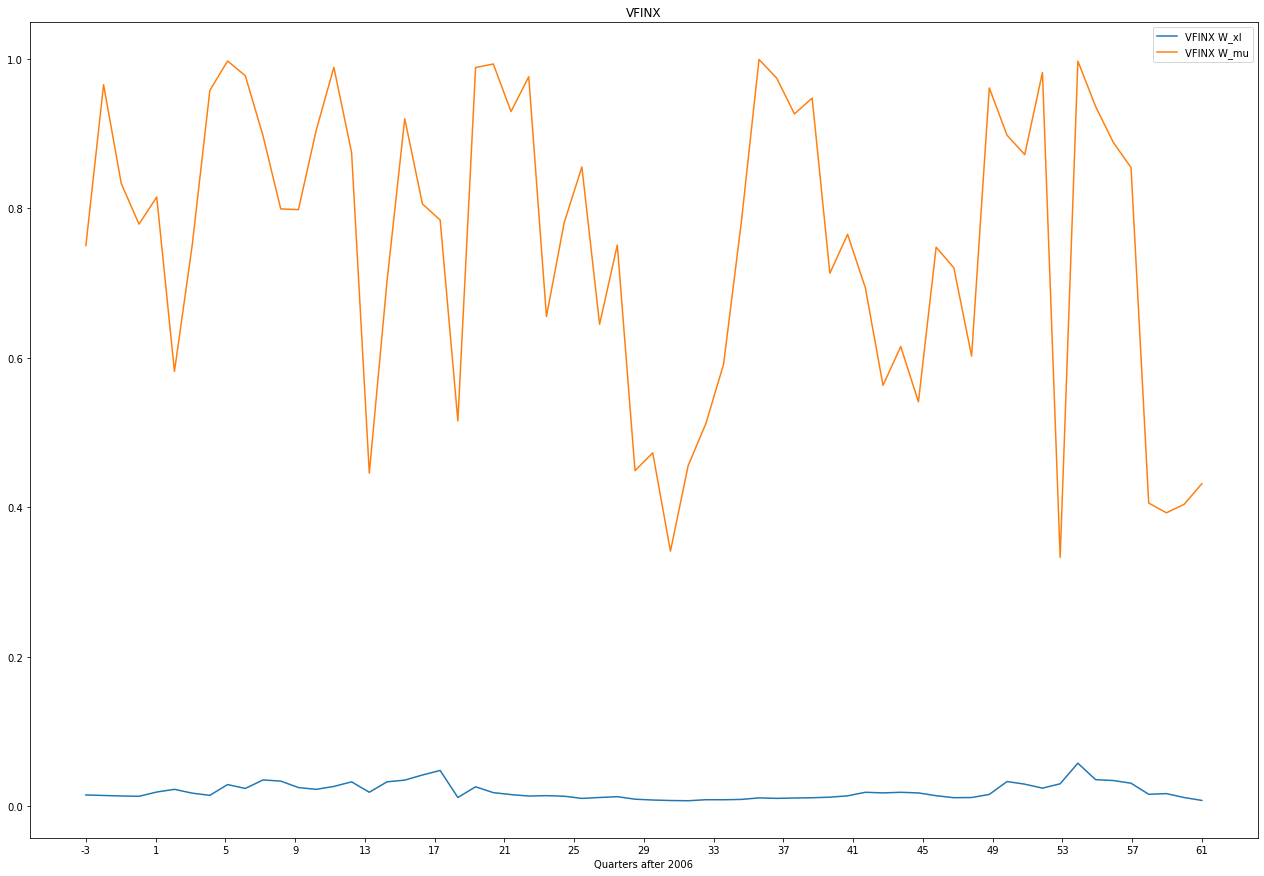

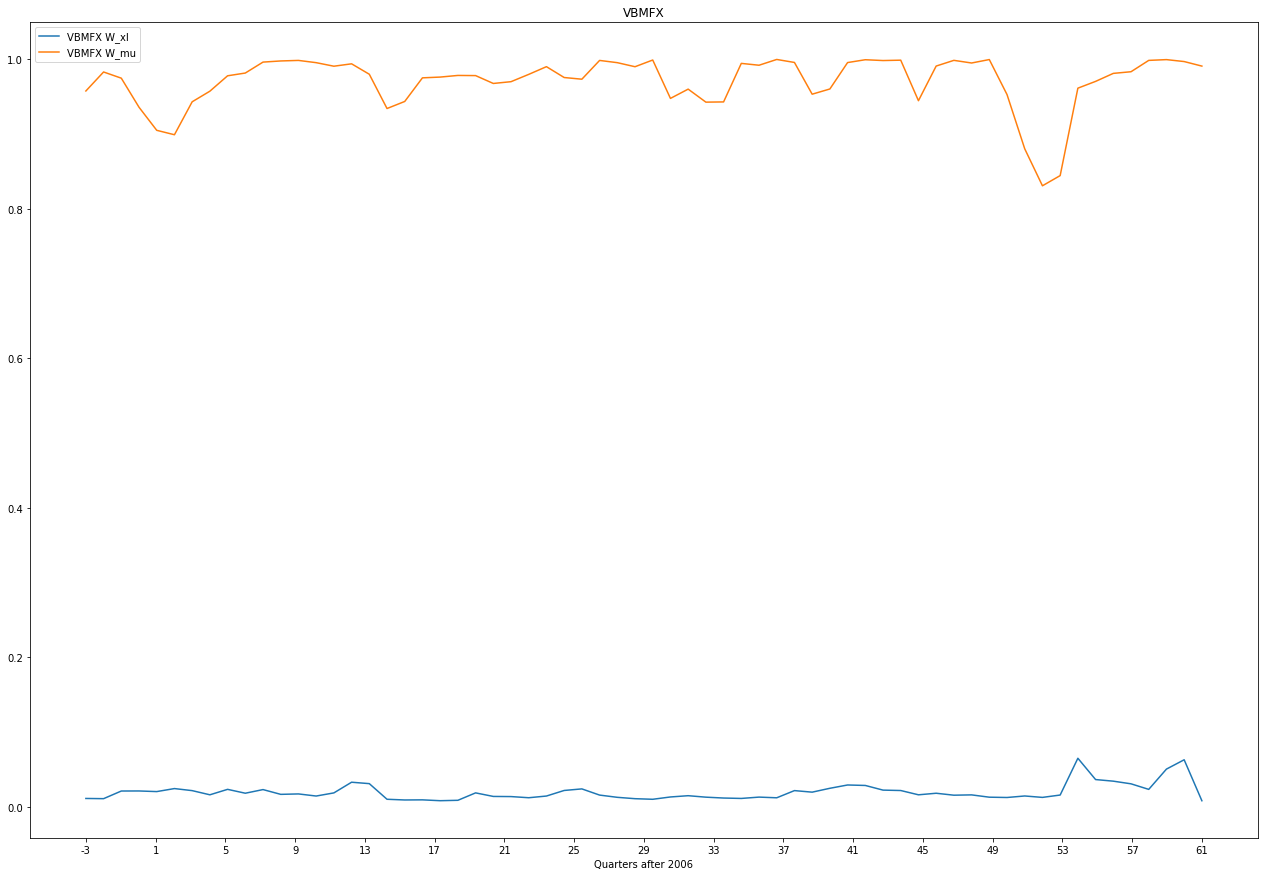

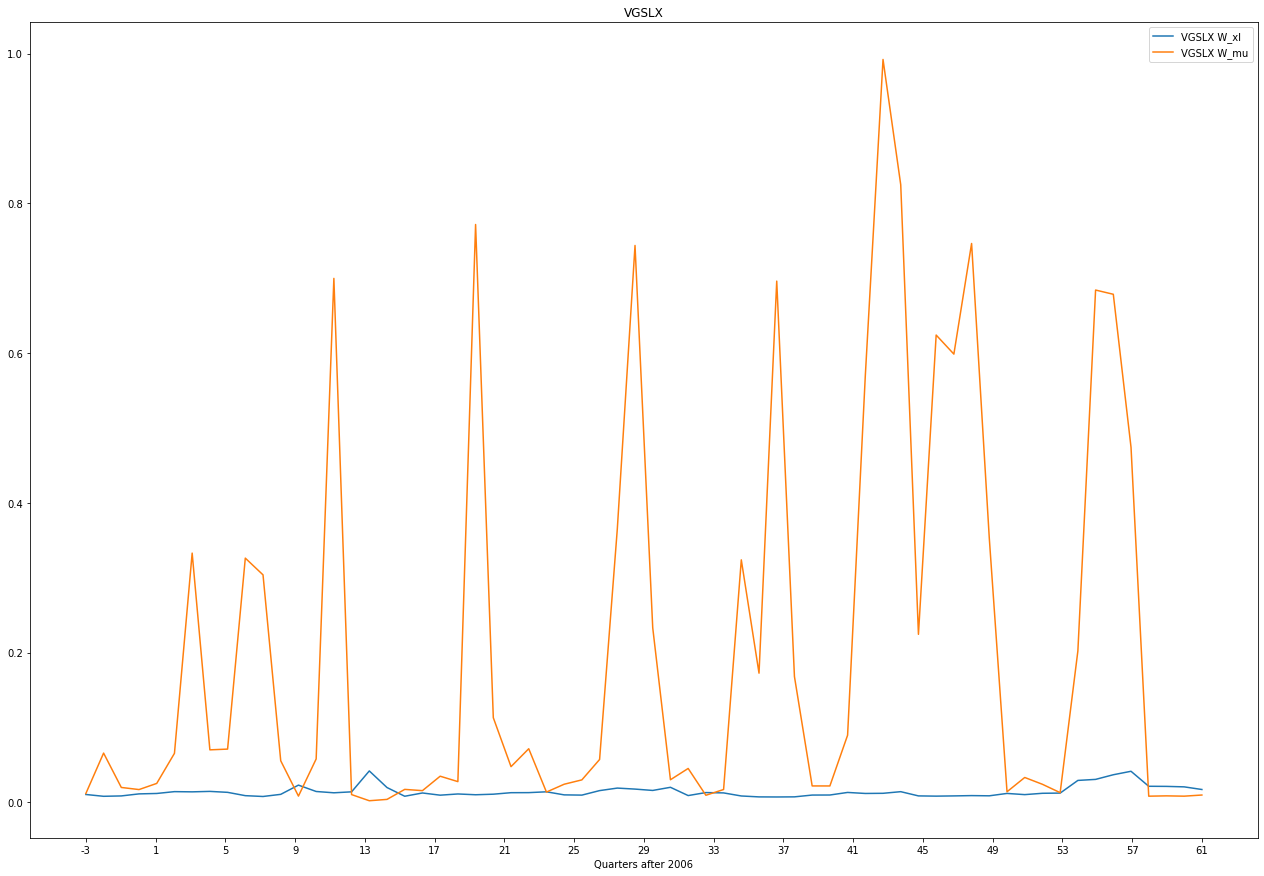

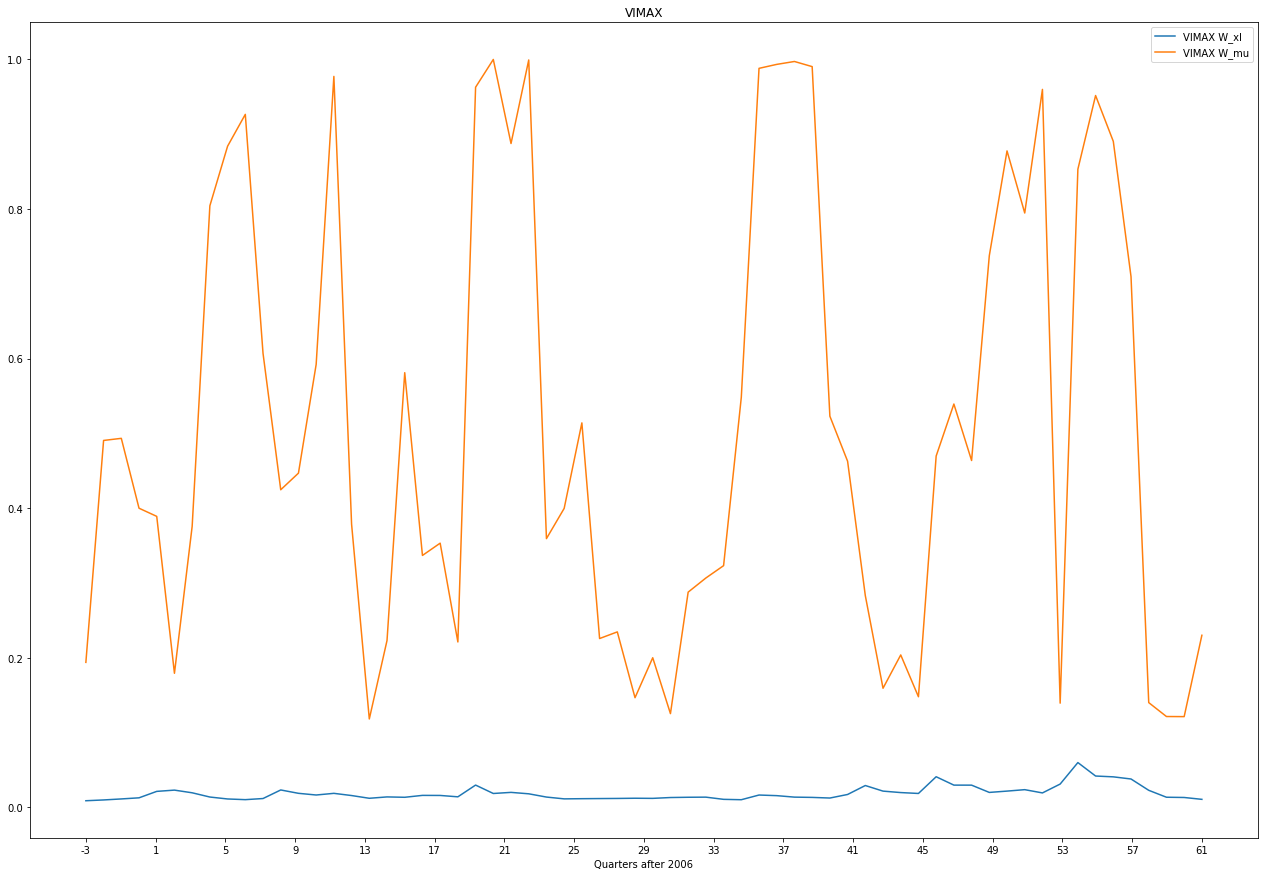

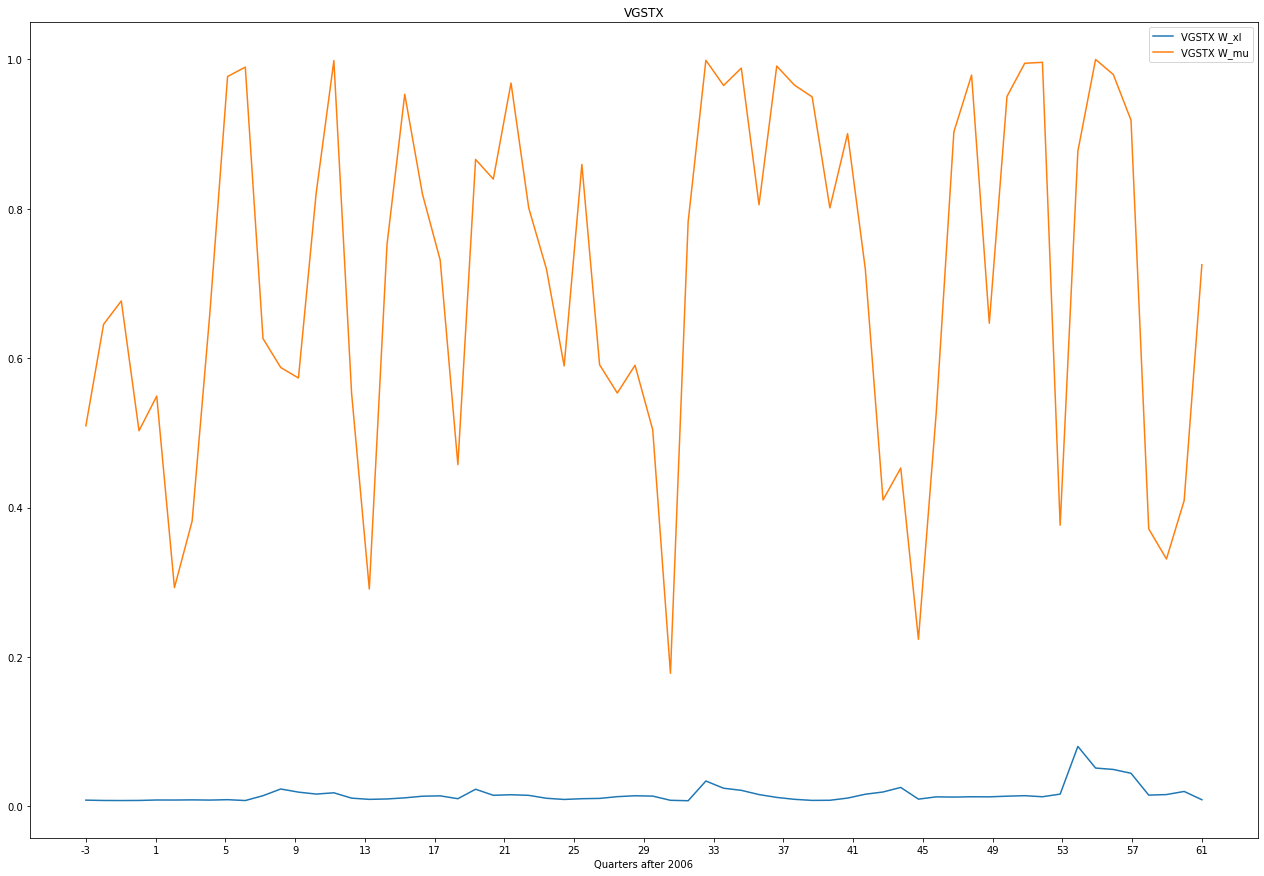

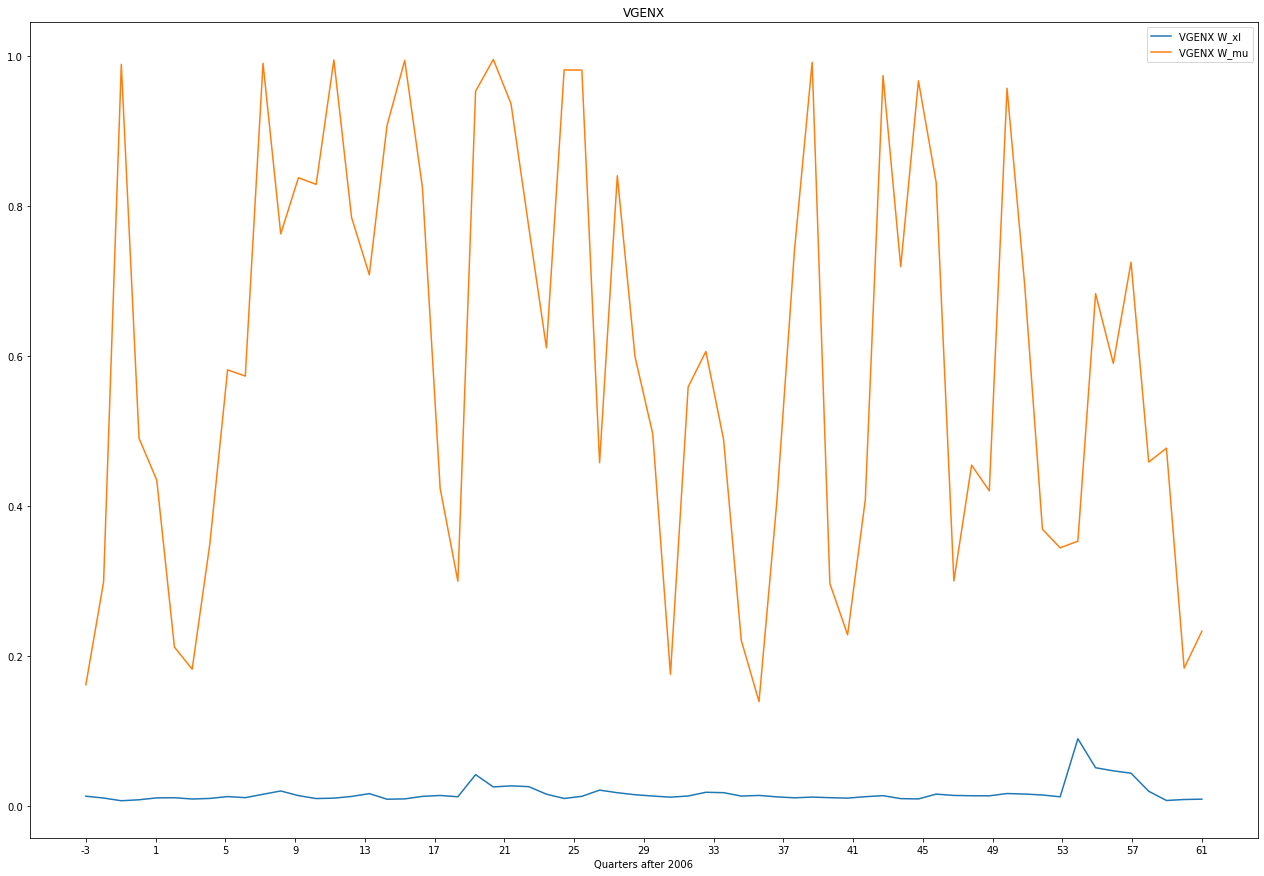

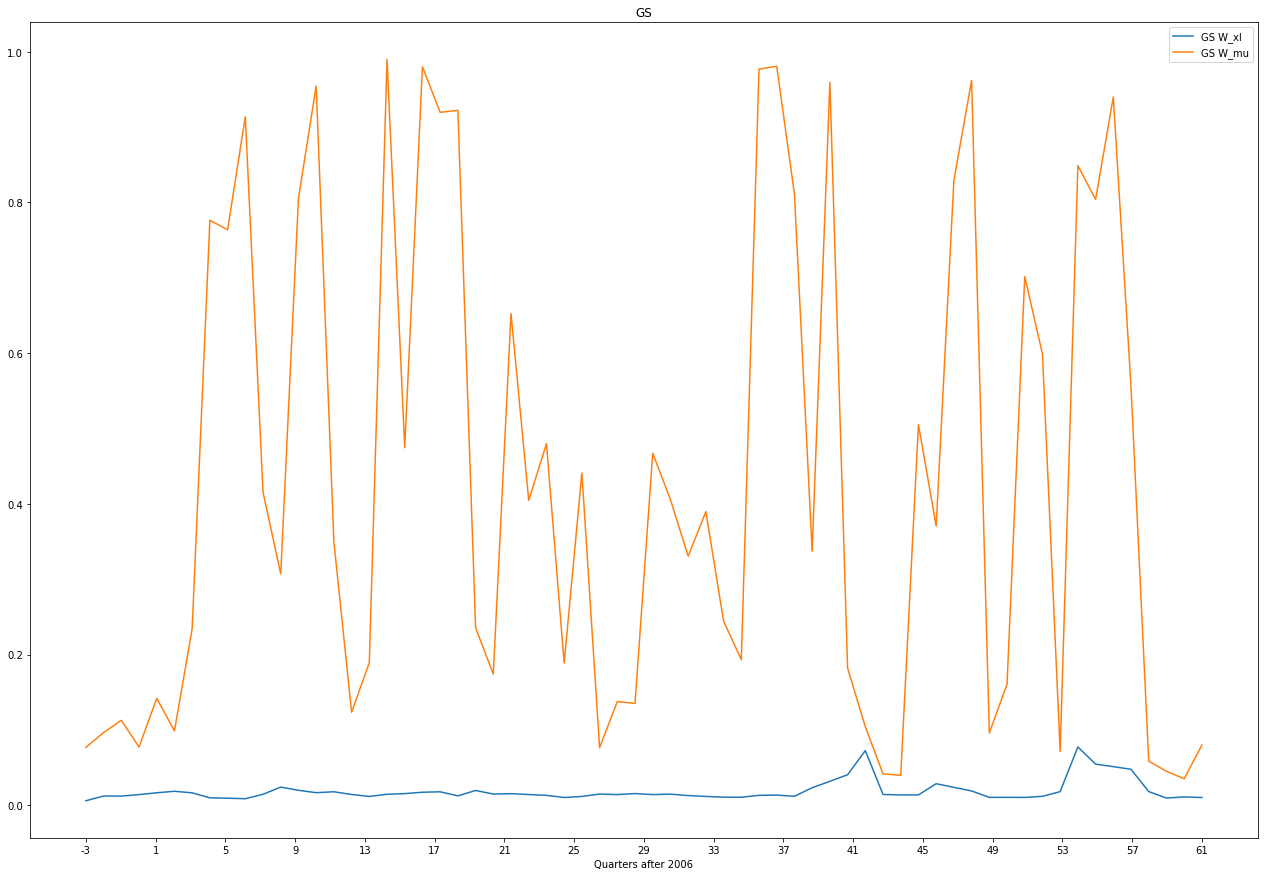

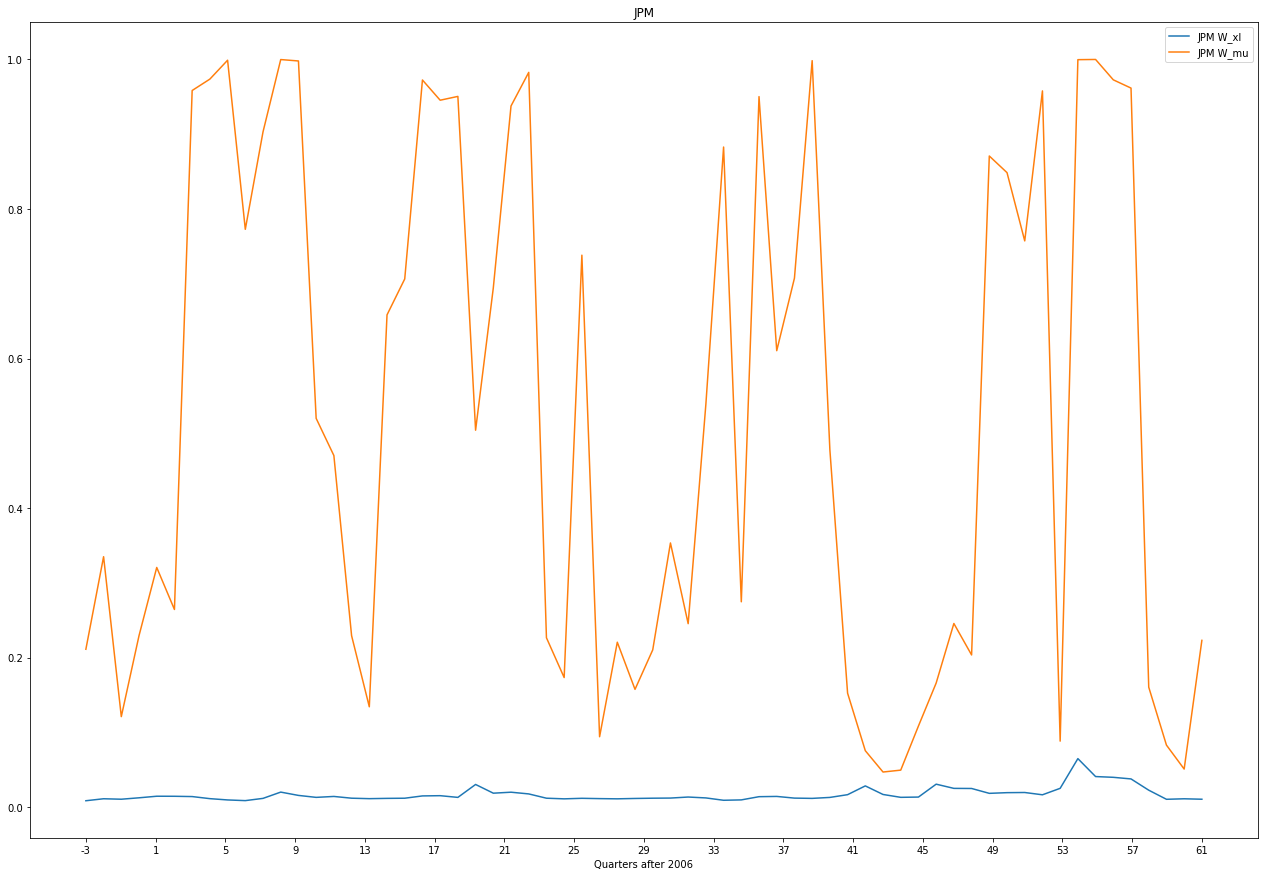

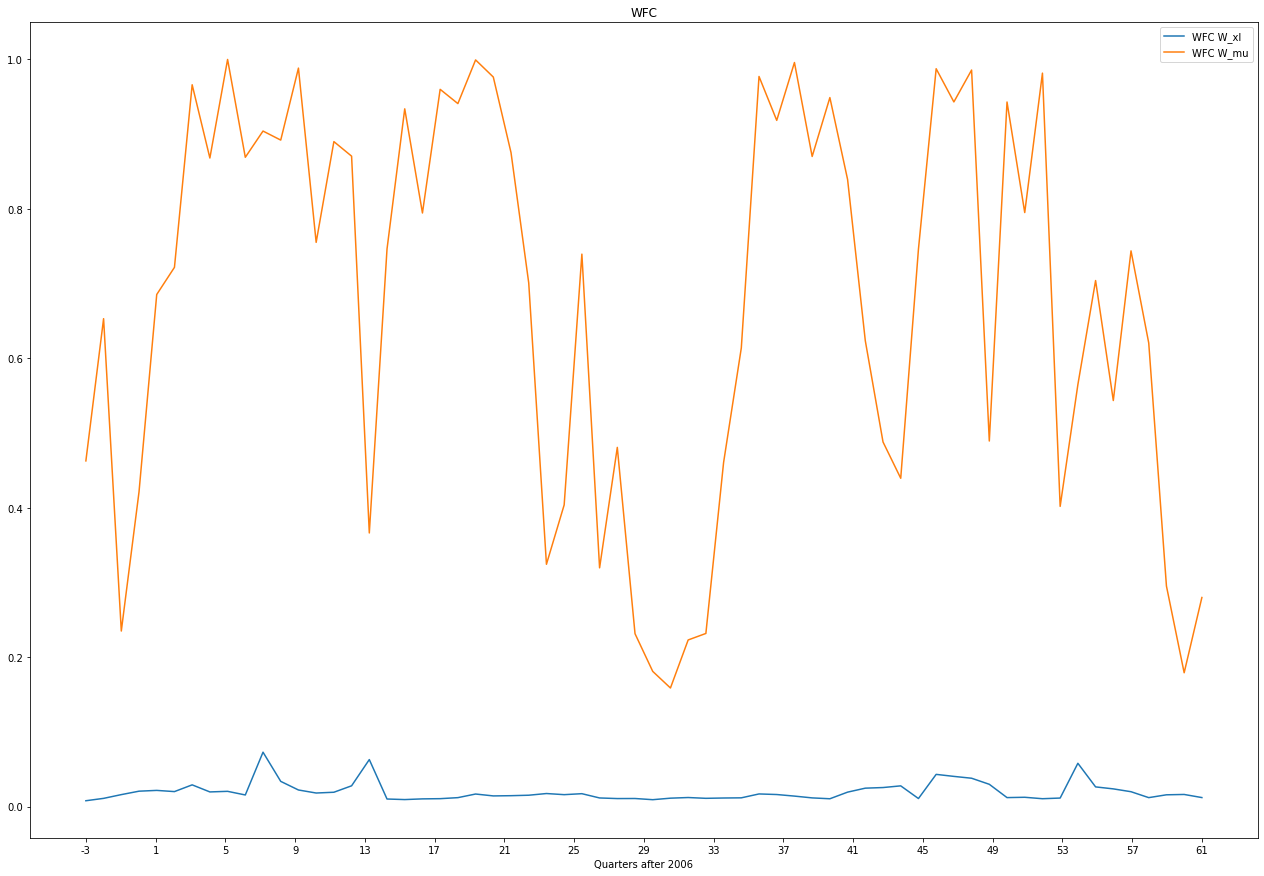

<Figure size 1584x1080 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,15)
xllabel = ["VFINX W_xl","VBMFX W_xl","VGSLX W_xl","VIMAX W_xl","VGSTX W_xl","VGENX W_xl","GS W_xl","JPM W_xl","WFC W_xl"]
mulabel = ["VFINX W_mu","VBMFX W_mu","VGSLX W_mu","VIMAX W_mu","VGSTX W_mu","VGENX W_mu","GS W_mu","JPM W_mu","WFC W_mu"]
tlabel = ["VFINX","VBMFX","VGSLX","VIMAX","VGSTX","VGENX","GS","JPM","WFC"]

xe = np.linspace(0,64,64)
ax = plt.axes()


  
for p in range(9):
  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qwe[p][::-1],label = xllabel[p])
  plt.plot(xe,qwu[p][::-1],label = mulabel[p])
  plt.title(tlabel[p])
  plt.legend()
  plt.figure()






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


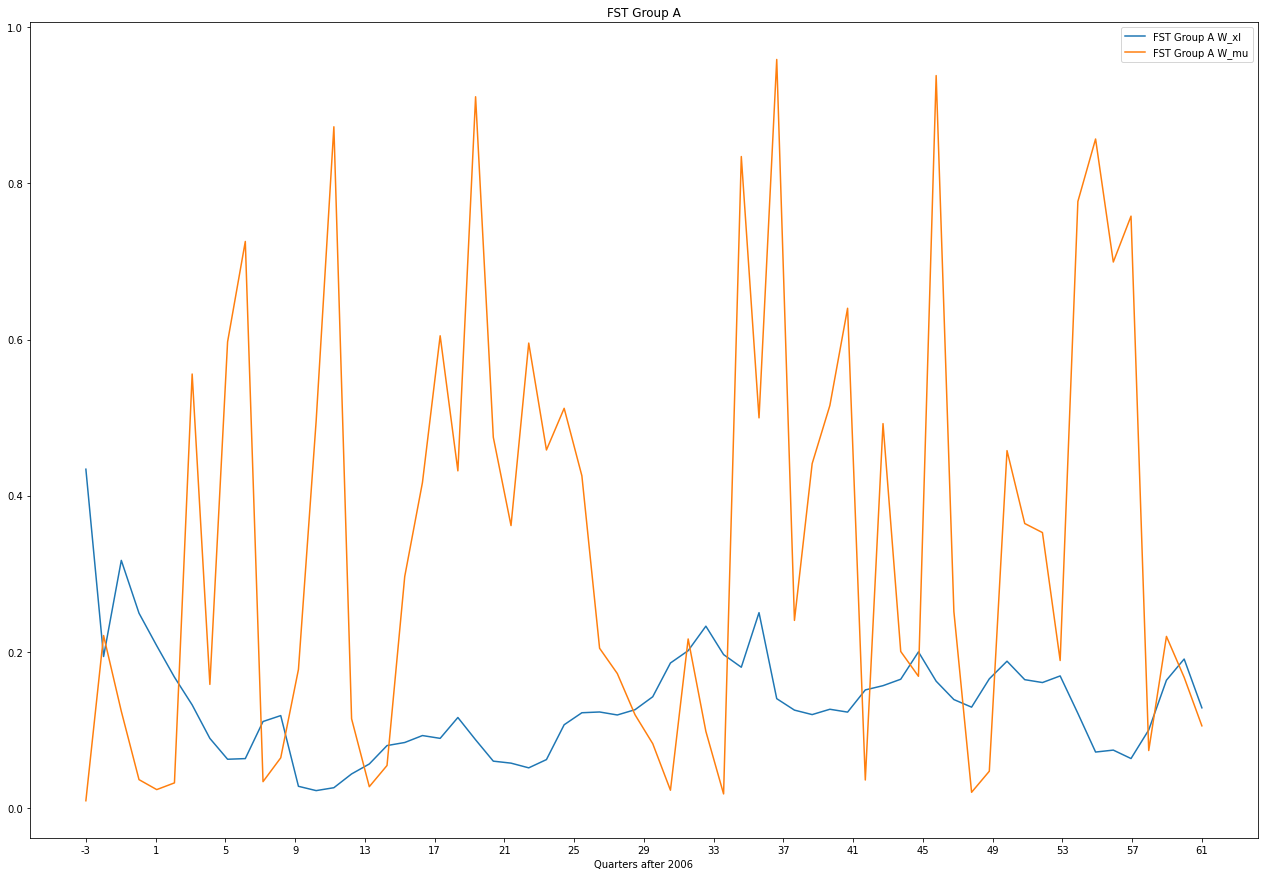

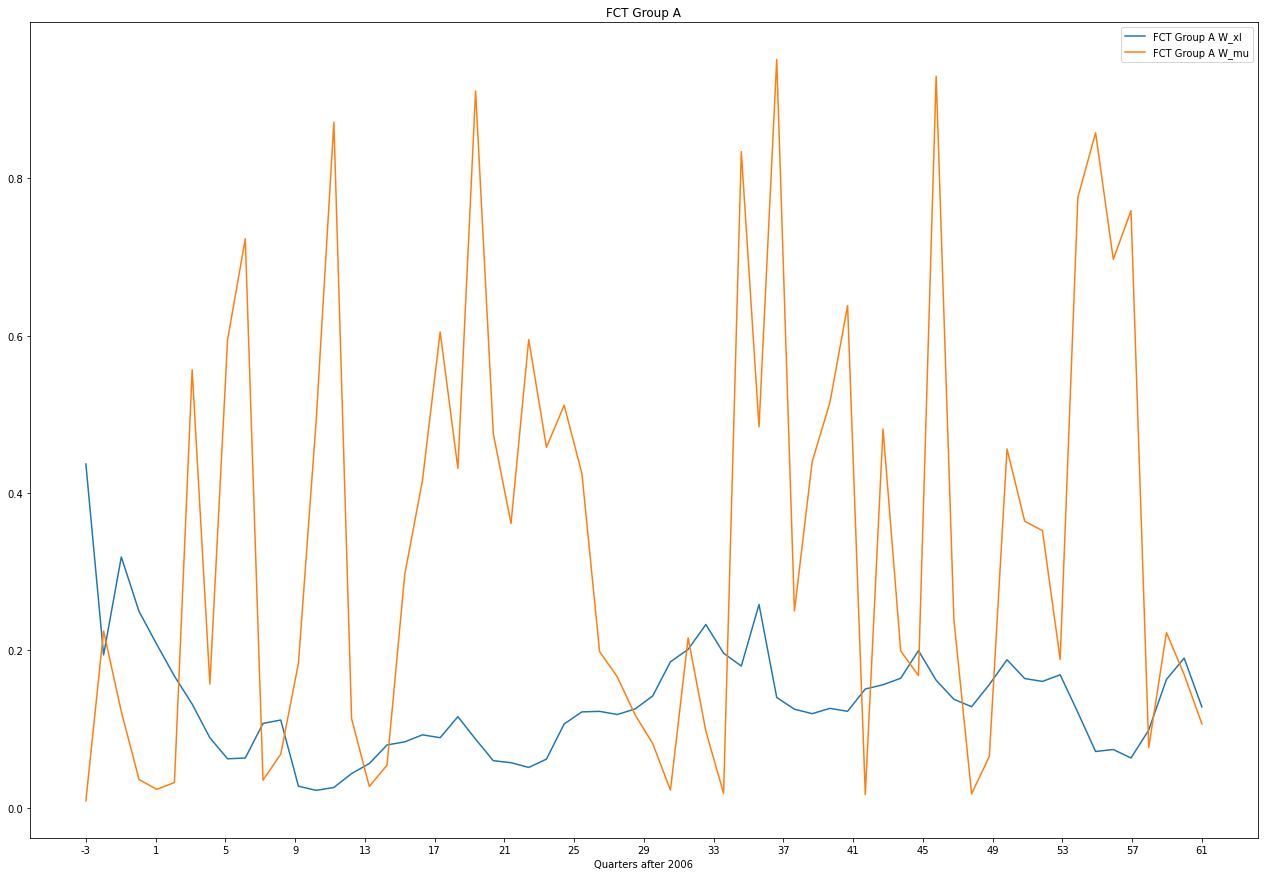

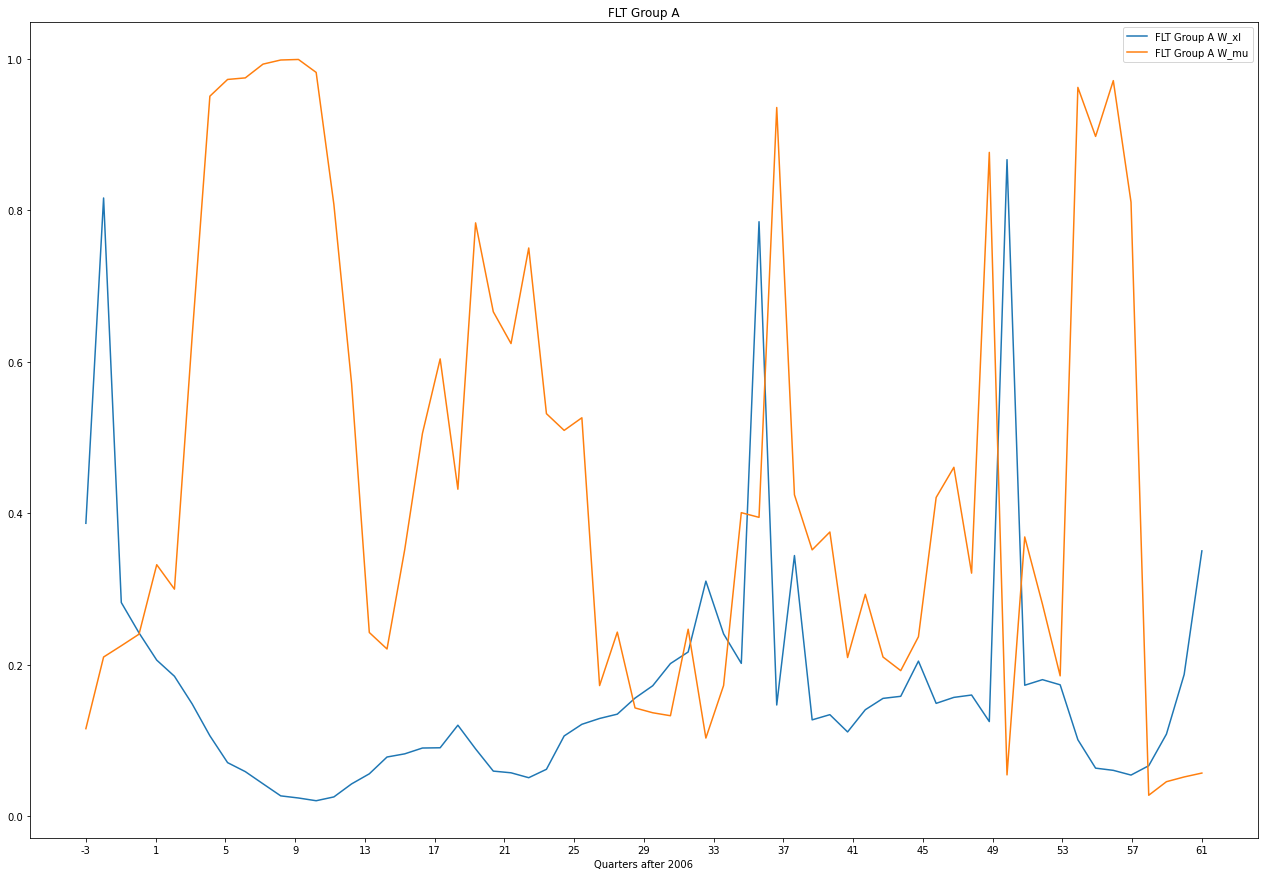

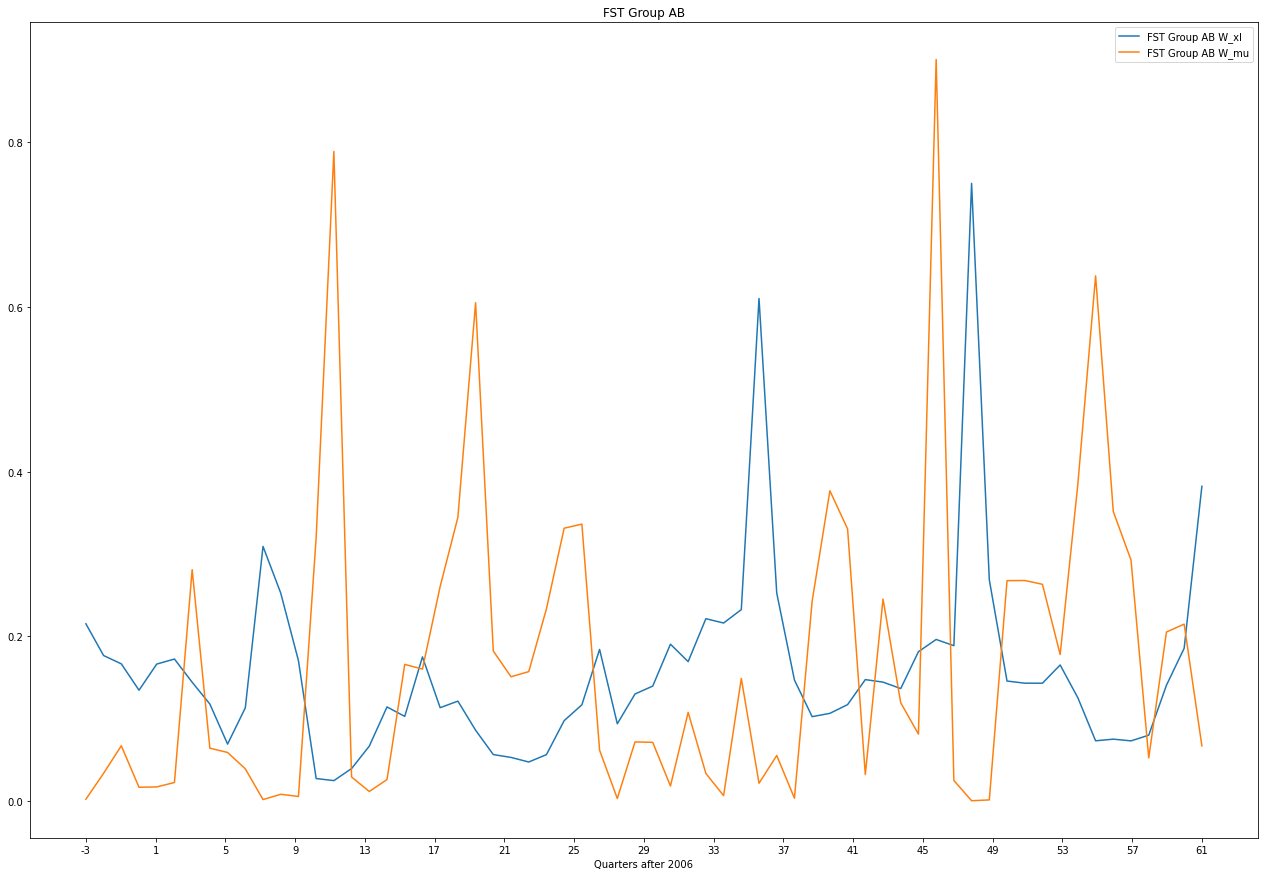

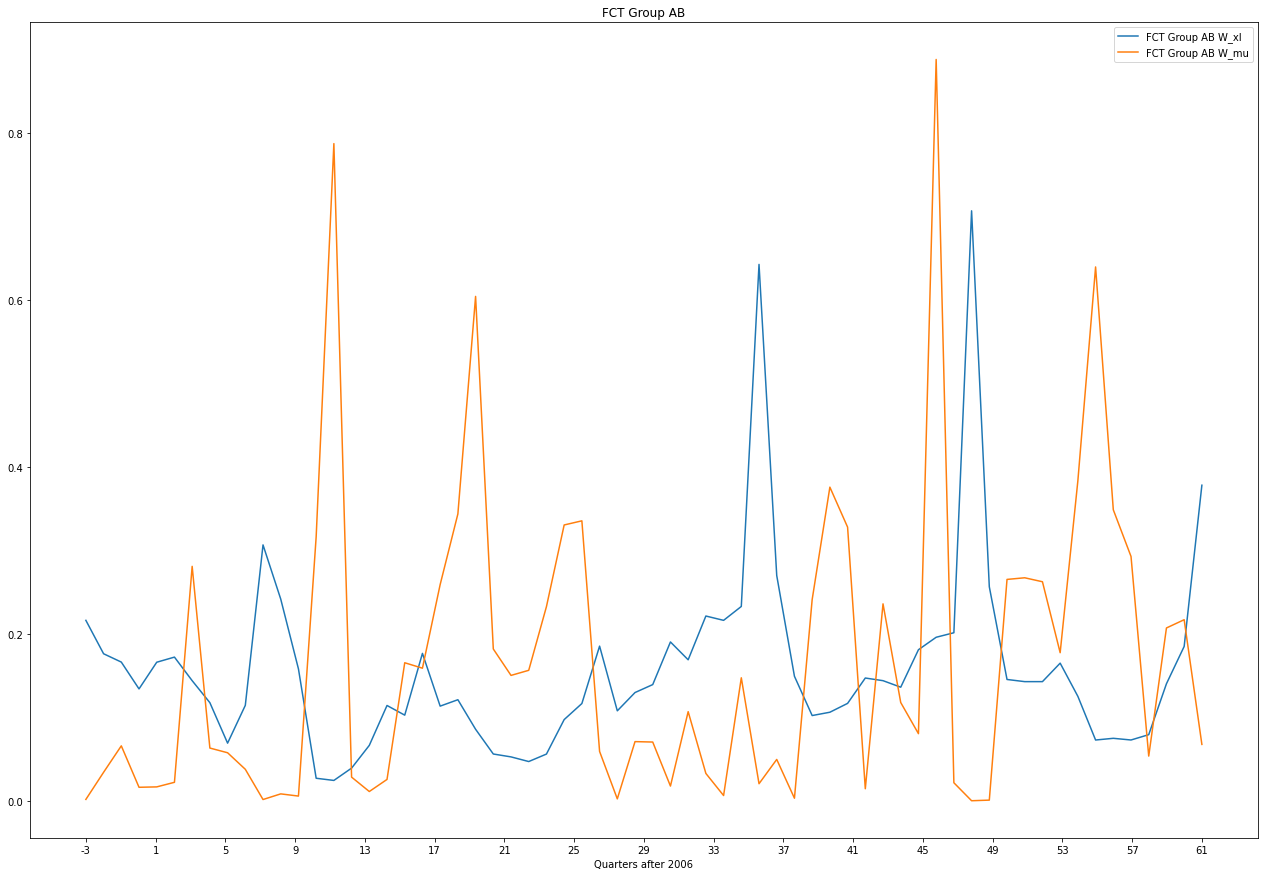

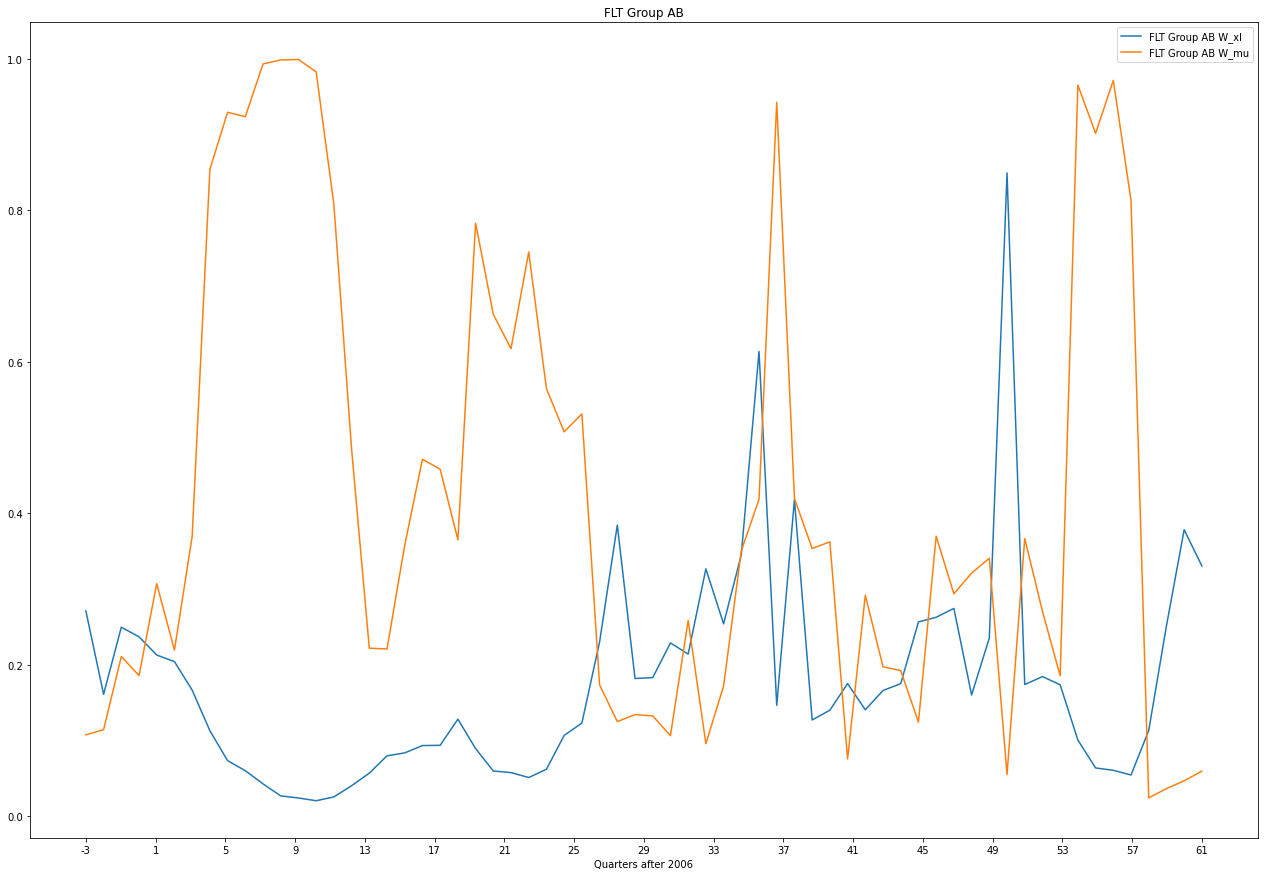

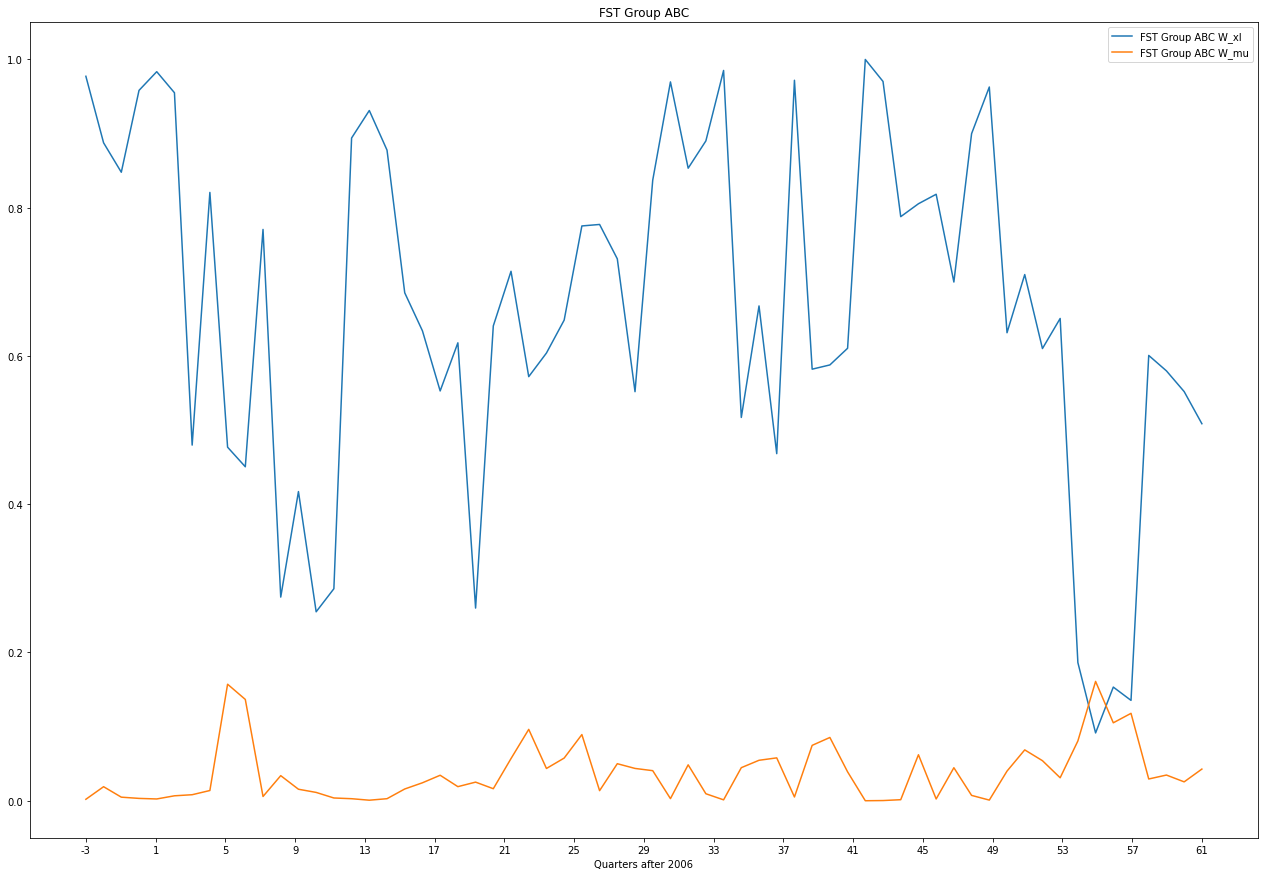

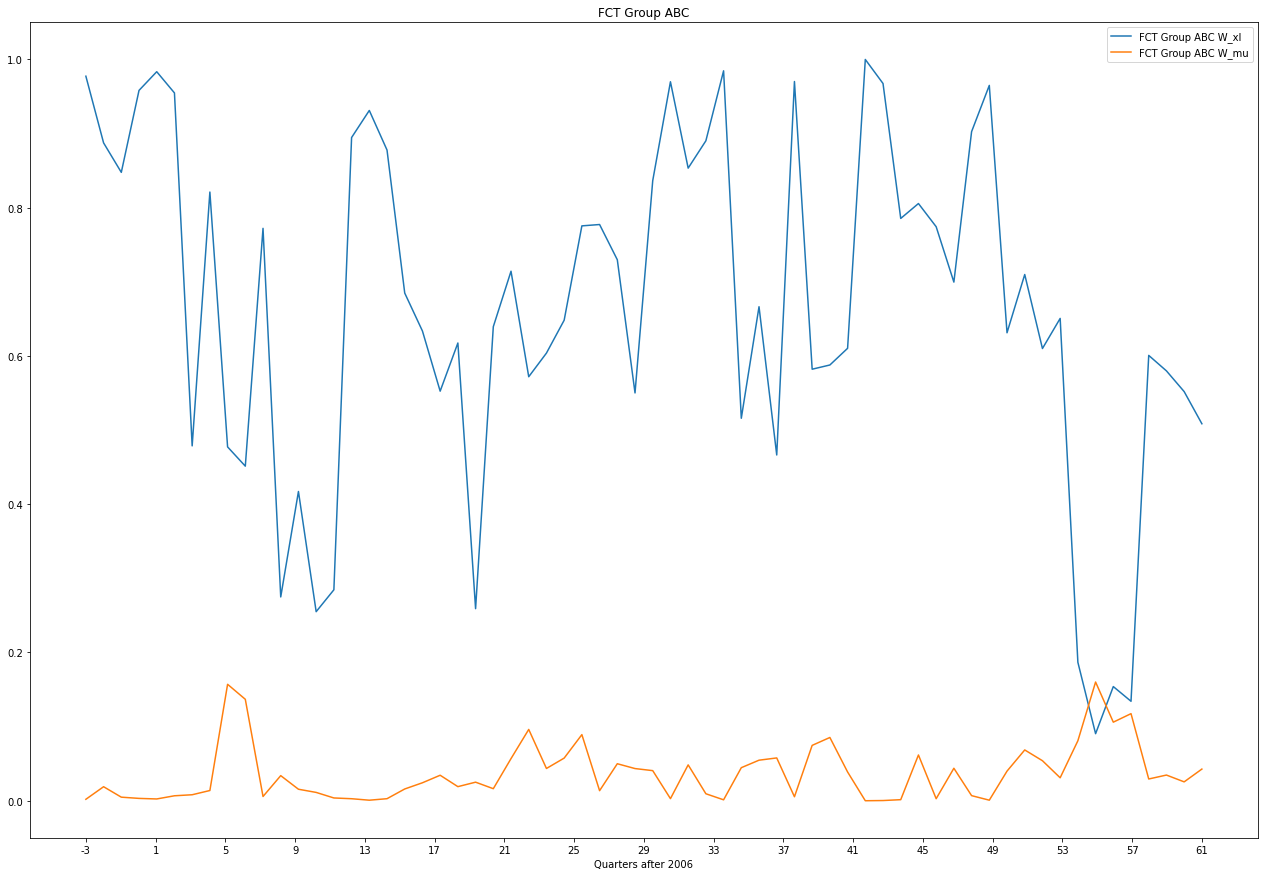

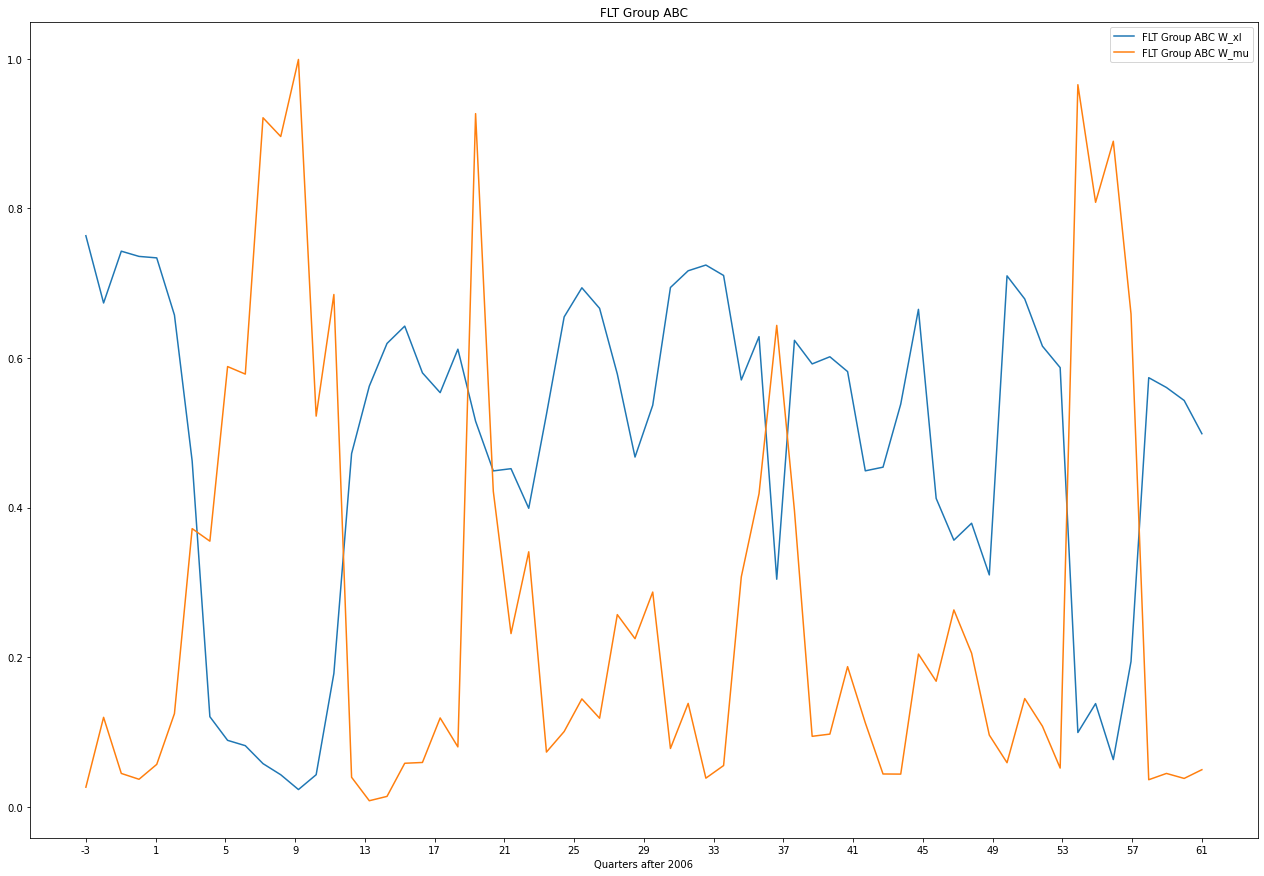

<Figure size 1584x1080 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,15)
xllabelfst = ["FST Group A W_xl","FST Group AB W_xl","FST Group ABC W_xl"]
mulabelfst = ["FST Group A W_mu","FST Group AB W_mu","FST Group ABC W_mu"]
xllabelfct = ["FCT Group A W_xl","FCT Group AB W_xl","FCT Group ABC W_xl"]
mulabelfct = ["FCT Group A W_mu","FCT Group AB W_mu","FCT Group ABC W_mu"]
xllabelflt = ["FLT Group A W_xl","FLT Group AB W_xl","FLT Group ABC W_xl"]
mulabelflt = ["FLT Group A W_mu","FLT Group AB W_mu","FLT Group ABC W_mu"]

tlabelfst = ["FST Group A","FST Group AB","FST Group ABC"]
tlabelfct = ["FCT Group A","FCT Group AB","FCT Group ABC"]
tlabelflt = ["FLT Group A","FLT Group AB","FLT Group ABC"]

xe = np.linspace(0,64,64)
ax = plt.axes()

y = [0,.2,.4,.6,.8,1]

ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])

for p in range(3):
  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qwefst[p][::-1],label = xllabelfst[p])
  plt.plot(xe,qwufst[p][::-1],label = mulabelfst[p])
  plt.title(tlabelfst[p])
  plt.legend()
  plt.figure()
  ax = plt.axes()

  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qwefct[p][::-1],label = xllabelfct[p])
  plt.plot(xe,qwufct[p][::-1],label = mulabelfct[p])
  plt.title(tlabelfct[p])
  plt.legend()
  plt.figure()

  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qweflt[p][::-1],label = xllabelflt[p])
  plt.plot(xe,qwuflt[p][::-1],label = mulabelflt[p])
  plt.title(tlabelflt[p])
  plt.legend()
  plt.figure()

In [ ]:

qvar = []
qmean = []
qret = np.zeros((64,9,252))
qmfst = []
qvfst = []
qmfct = []
qvfct = []
qmflt = []
qvflt = []
qrflt = []
qrfst = []
qrfct = []

count = 0
for i in range(16):
  for j in range(4):
    qvar.append(roll_var[i][2][j])
    qmean.append(roll_means[i][2][j])
    for l in range(9):
      for d in range(252):
        qret[count][l][d] = roll_ret[i][j][d][l]
    count = count + 1
for k in range(3):
  for i in range(16):
    for j in range(4):
      qmfst.append(mfst[i][k][j])
      qvfst.append(vfst[i][k][j])
      qmfct.append(mfct[i][k][j])
      qvfct.append(vfct[i][k][j])
      qmflt.append(mflt[i][k][j])
      qvflt.append(vflt[i][k][j])
      qrflt.append(rflt[i][k][j])
      qrfst.append(rfst[i][k][j])        
      qrfct.append(rfct[i][k][j])


In [ ]:
print(qmfst[4])

0.0004861562552597925


In [ ]:
print(mfst[1][0][0])

0.0004861562552597925


In [ ]:
wm = np.zeros((16,4,9))
wmflt = np.zeros((16,3,4))
wmfst = np.zeros((16,3,4))
wmfct = np.zeros((16,3,4))
wv = np.zeros((16,4,9))
wvflt = np.zeros((16,3,4))
wvfst = np.zeros((16,3,4))
wvfct = np.zeros((16,3,4))
wq = np.zeros((16,4,9))
wqflt = np.zeros((16,3,4))
wqfst = np.zeros((16,3,4))
wqfct = np.zeros((16,3,4))

count = 0;
cur = -100000
for i in range(16):
  for j in range(4):
    if(count == 61):
      break

    D = 252
    for l in range(9):
      cur = -100000
      curv = -100000
      curq = -1000000
      for n in range(3): 
        for m in range(n,3):
          Dt = 252
          cur = max(cur,((qmean[count + n][l] - qmean[count + 1 + m][l])**2)/(1/D * qvar[count + n][l][l] + 1/Dt * qvar[count + 1 + m][l][l] + (qmean[count + n][l] - qmean[count + 1 + m][l])**2))
          wm[i][j][l] = cur

          curv = max(curv,((qvar[count + n][l][l] - qvar[count + 1 + m][l][l])**2)/((qvar[count + n][l][l] + qvar[count + 1 + m][l][l])**2))
          wv[i][j][l] = curv
          curq = max(curq,stats.ks_2samp(qret[count + n][l],qret[count + m + 1][l]).statistic)
          wq[i][j][l] = curq

    count = count + 1

count = 0
tcount = 0
curfct = -1000
curflt = -1000
for k in range(3):
  tcount = 0
  for i in range(16):
    for j in range(4):
      if(tcount == 61):
        break
      D = 252
      cur = -1000
      curv = -100000
      curq = -100000
      curfct = -1000
      curvfct = -100000
      curqfct = -100000
      curflt = -1000
      curvflt = -1000
      curqflt = -1000000
      for n in range(3):
        for m in range(n,3):
          Dt = 252
          
          cur = max(cur,((qmfst[count + n] - qmfst[count + 1 + m])**2)/(1/D * qvfst[count + n] + 1/Dt * qvfst[count + 1 + m] + (qmfst[count + n] - qmfst[count + 1 + m])**2))
          wmfst[i][k][j] = cur
          curv = max(curv,((qvfst[count + n] - qvfst[count + 1 + m])**2)/((qvfst[count + n] + qvfst[count + 1 + m])**2))
          wvfst[i][k][j] = curv
          curq = max(curq,stats.ks_2samp(qrfst[count + n],qrfst[count + 1 + m]).statistic)
          wqfst[i][k][j] = curq        

          curfct = max(curfct,((qmfct[count + n] - qmfct[count + 1 + m])**2)/(1/D * qvfct[count + n] + 1/Dt * qvfct[count + 1 + m] + (qmfct[count + n] - qmfct[count + 1 + m])**2))
          wmfct[i][k][j] = curfct
          curvfct = max(curvfct,((qvfct[count + n] - qvfct[count + 1 + m])**2)/((qvfct[count + n] + qvfct[count + 1 + m])**2))
          wvfct[i][k][j] = curvfct
          curqfct = max(curqfct,stats.ks_2samp(qrfct[count + n],qrfct[count + 1 + m]).statistic)
          wqfct[i][k][j] = curqfct


          curflt = max(curflt,((qmflt[count + n] - qmflt[count + 1 + m])**2)/(1/D * qvflt[count + n] + 1/Dt * qvflt[count + 1 + m] + (qmflt[count + n] - qmflt[count + 1 + m])**2))
          wmflt[i][k][j] = curflt 
          curvflt = max(curvflt,((qvflt[count + n] - qvflt[count + 1 + m])**2)/((qvflt[count + n] + qvflt[count + 1 + m])**2))
          wvflt[i][k][j] = curvflt
          curqflt = max(curqflt,stats.ks_2samp(qrflt[count + n],qrflt[count + 1 + m]).statistic)
          wqflt[i][k][j] = curqflt


      tcount = tcount + 1
      count = count + 1

In [ ]:
qwm = [[],[],[],[],[],[],[],[],[]]
qwq = [[],[],[],[],[],[],[],[],[]]
qwv = [[],[],[],[],[],[],[],[],[]]

qwmflt = [[],[],[]]
qwqflt = [[],[],[]]
qwvflt =[[],[],[]]

qwmfst = [[],[],[]]
qwqfst = [[],[],[]]
qwvfst =[[],[],[]]

qwmfct = [[],[],[]]
qwqfct = [[],[],[]]
qwvfct =[[],[],[]]


for i in range(16):
  for j in range(4):
    for l in range(9):
      qwm[l].append(wm[i][j][l])
      qwq[l].append(wq[i][j][l])
      qwv[l].append(wv[i][j][l])
    for k in range(3):
      qwmflt[k].append(wmflt[i][k][j])
      qwqflt[k].append(wqflt[i][k][j])
      qwvflt[k].append(wvflt[i][k][j])

      qwmfst[k].append(wmfst[i][k][j])
      qwqfst[k].append(wqfst[i][k][j])
      qwvfst[k].append(wvfst[i][k][j])

      qwmfct[k].append(wmfct[i][k][j])
      qwqfct[k].append(wqfct[i][k][j])
      qwvfct[k].append(wvfct[i][k][j])

   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


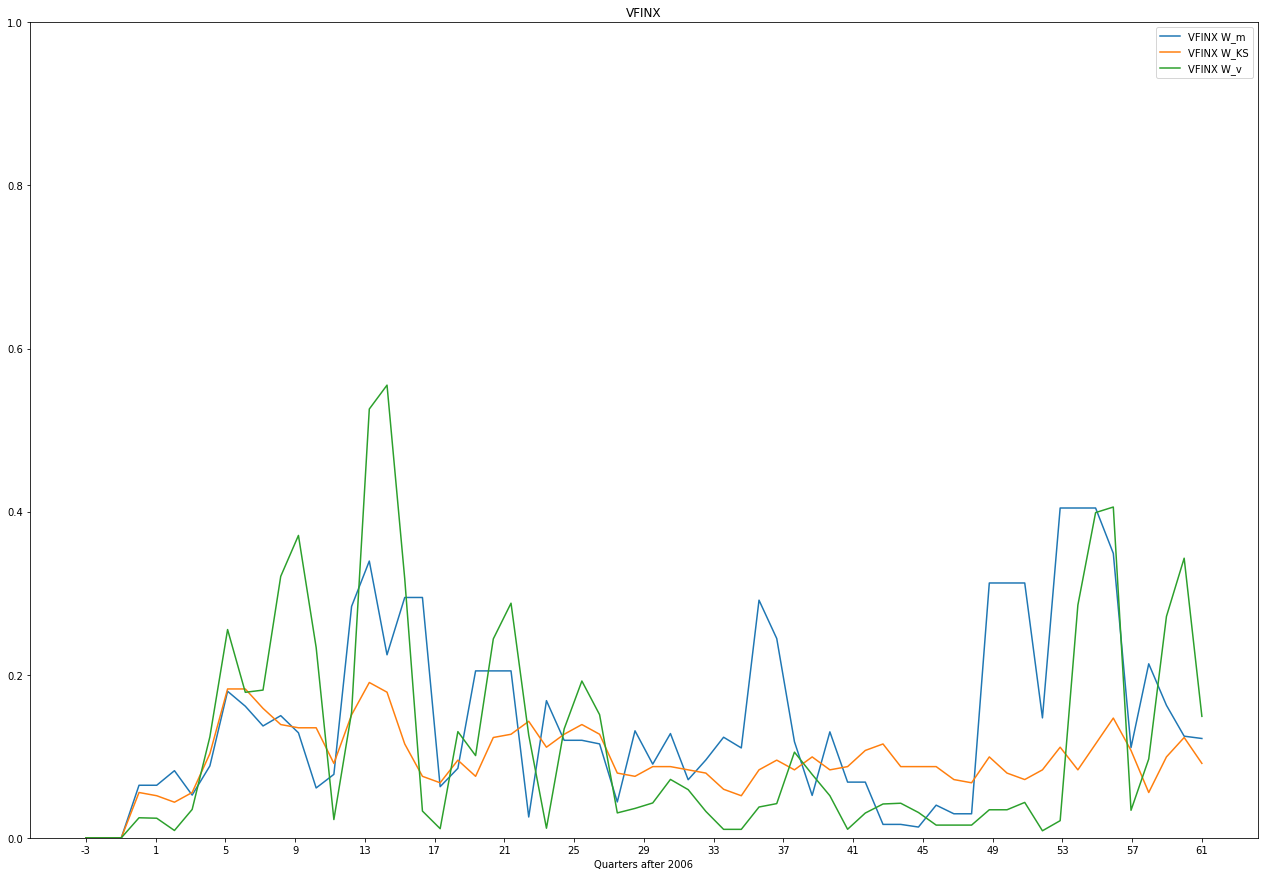

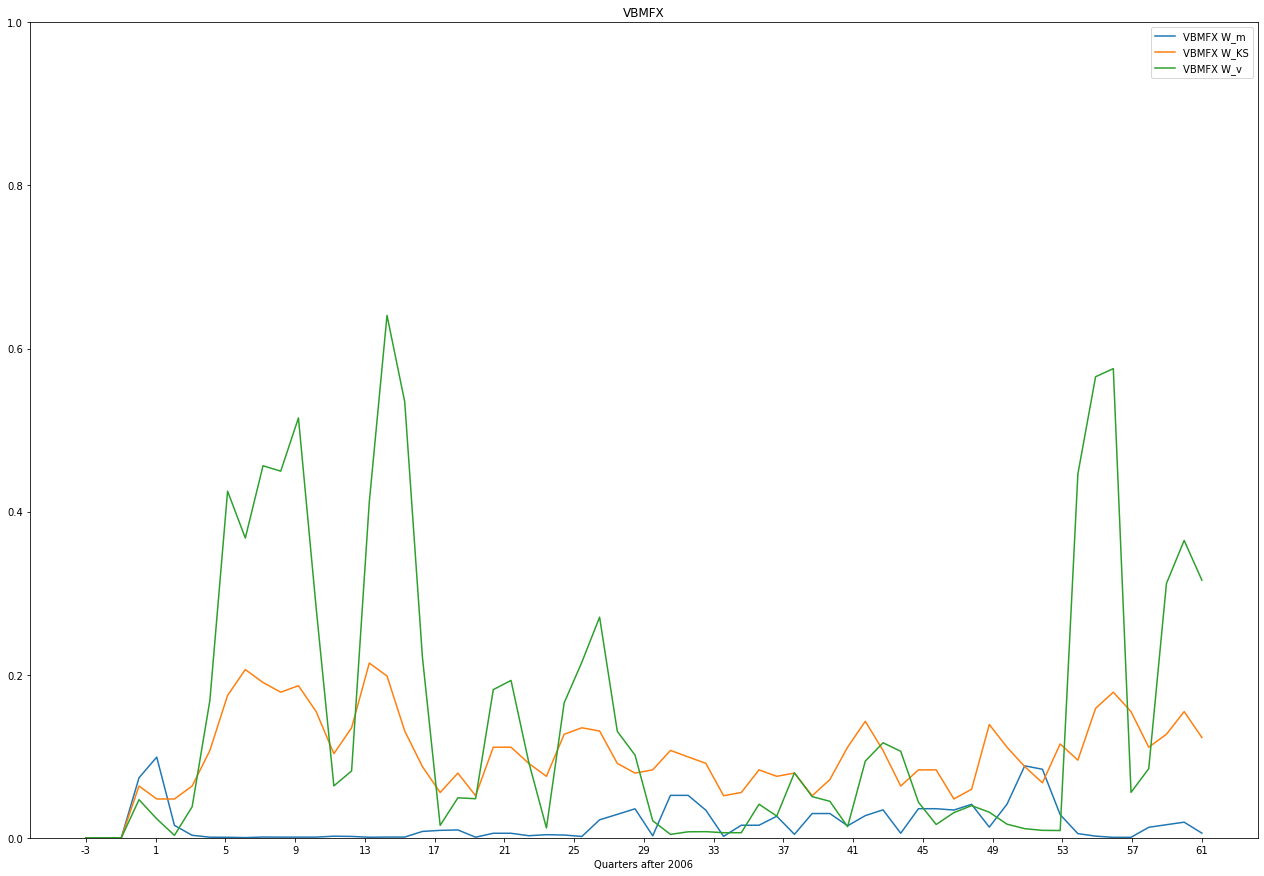

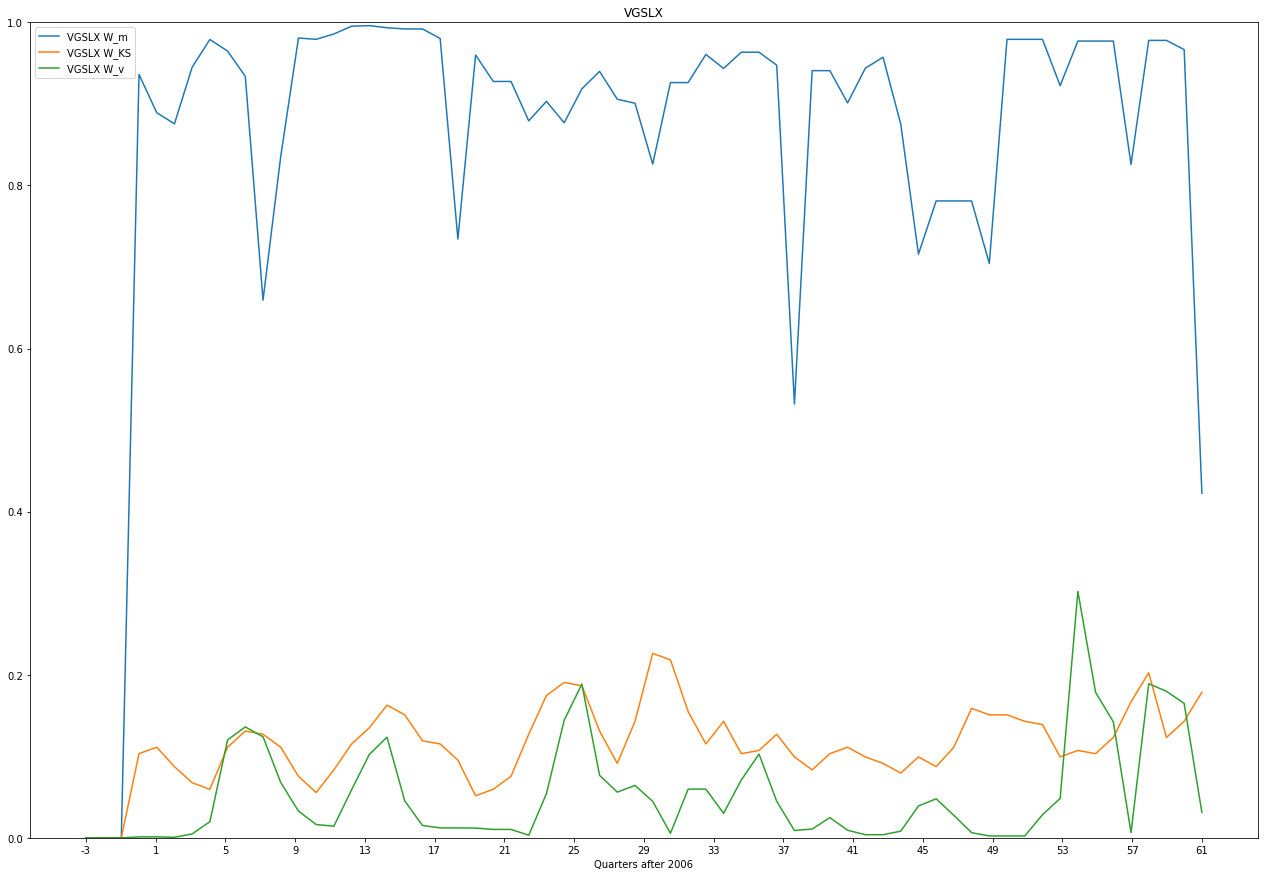

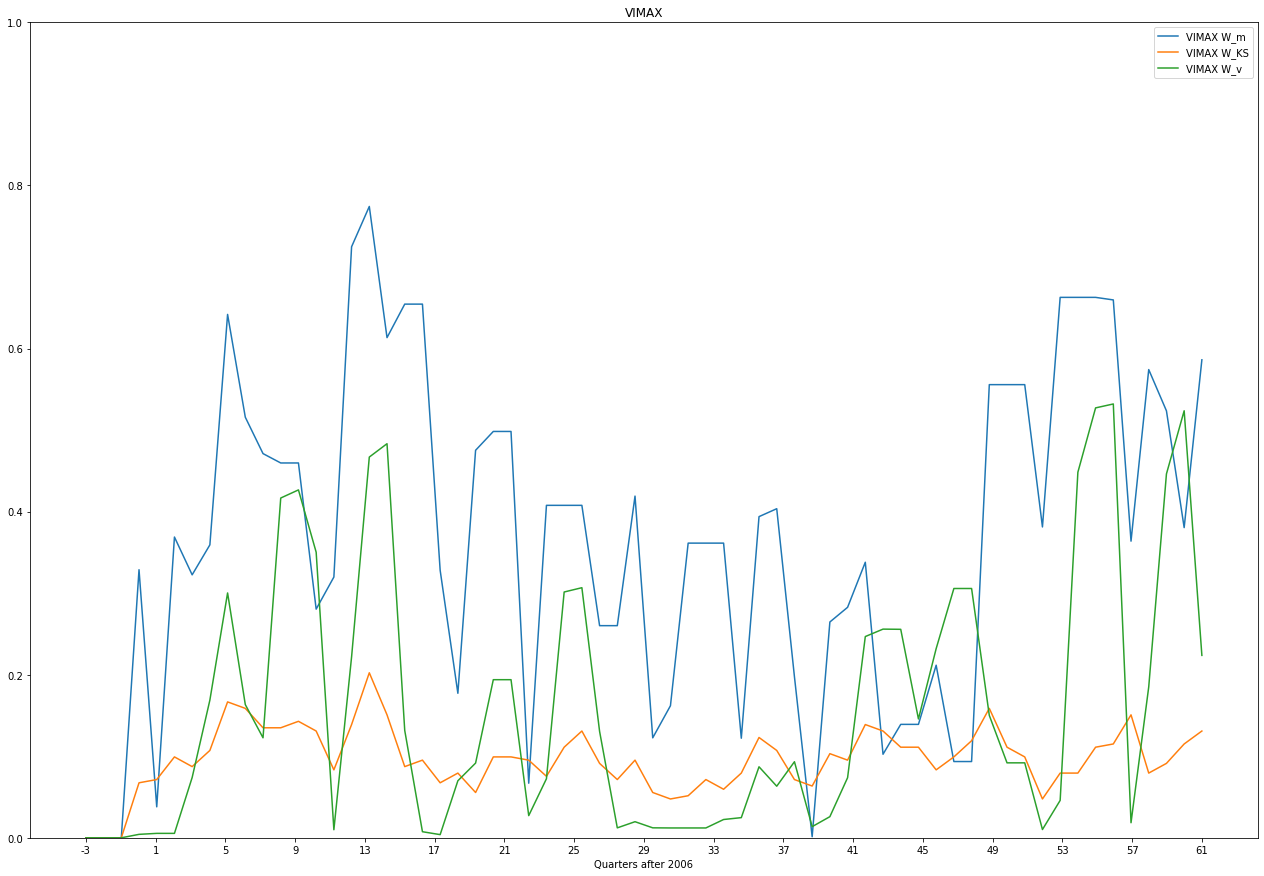

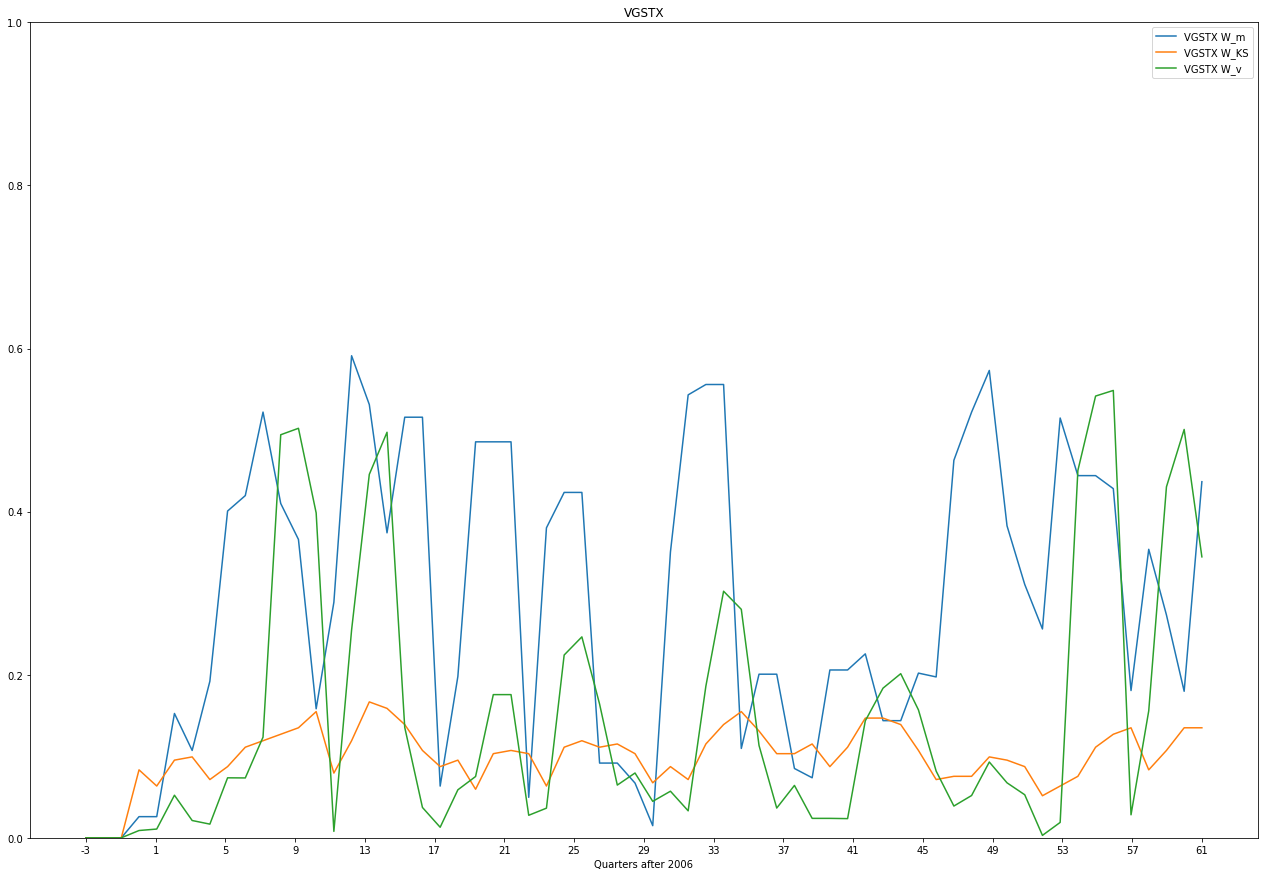

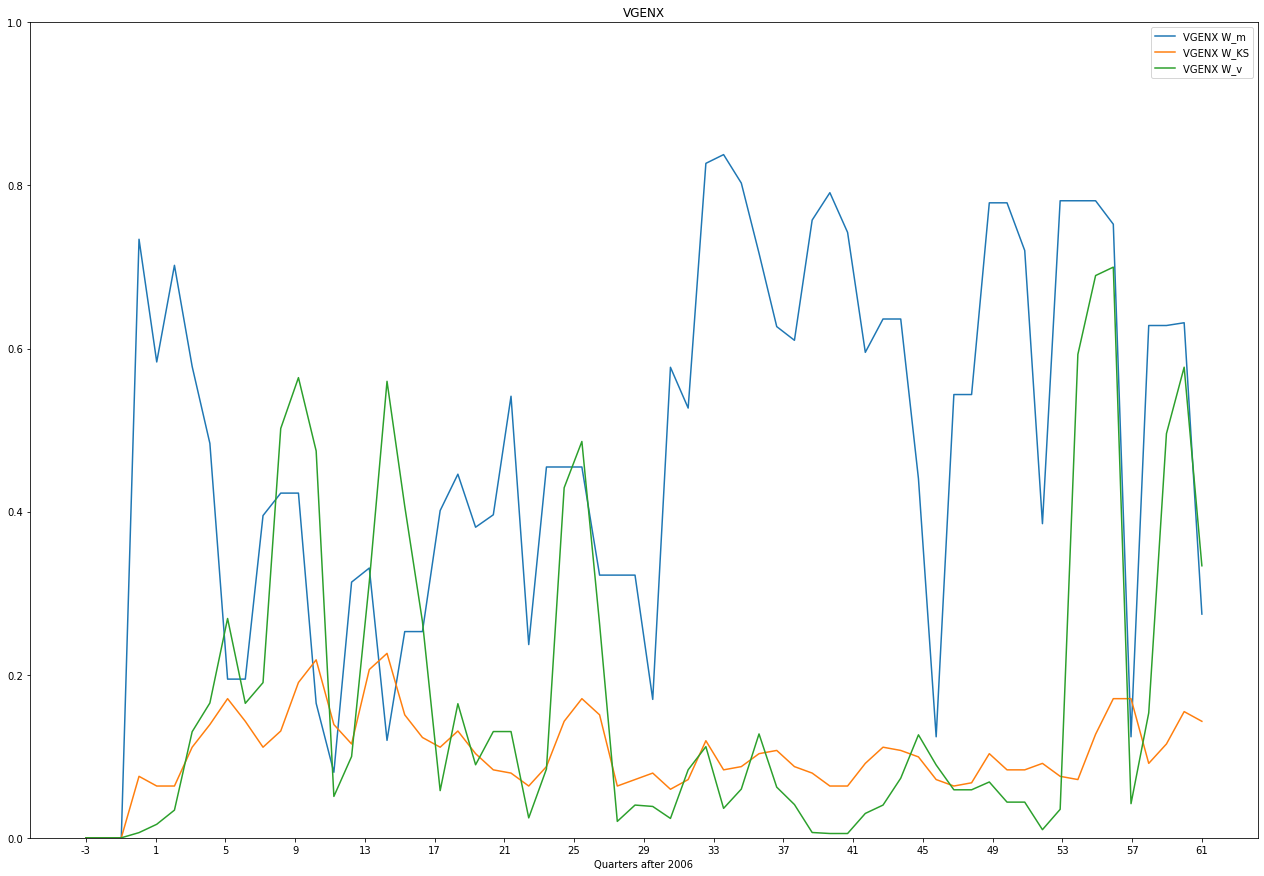

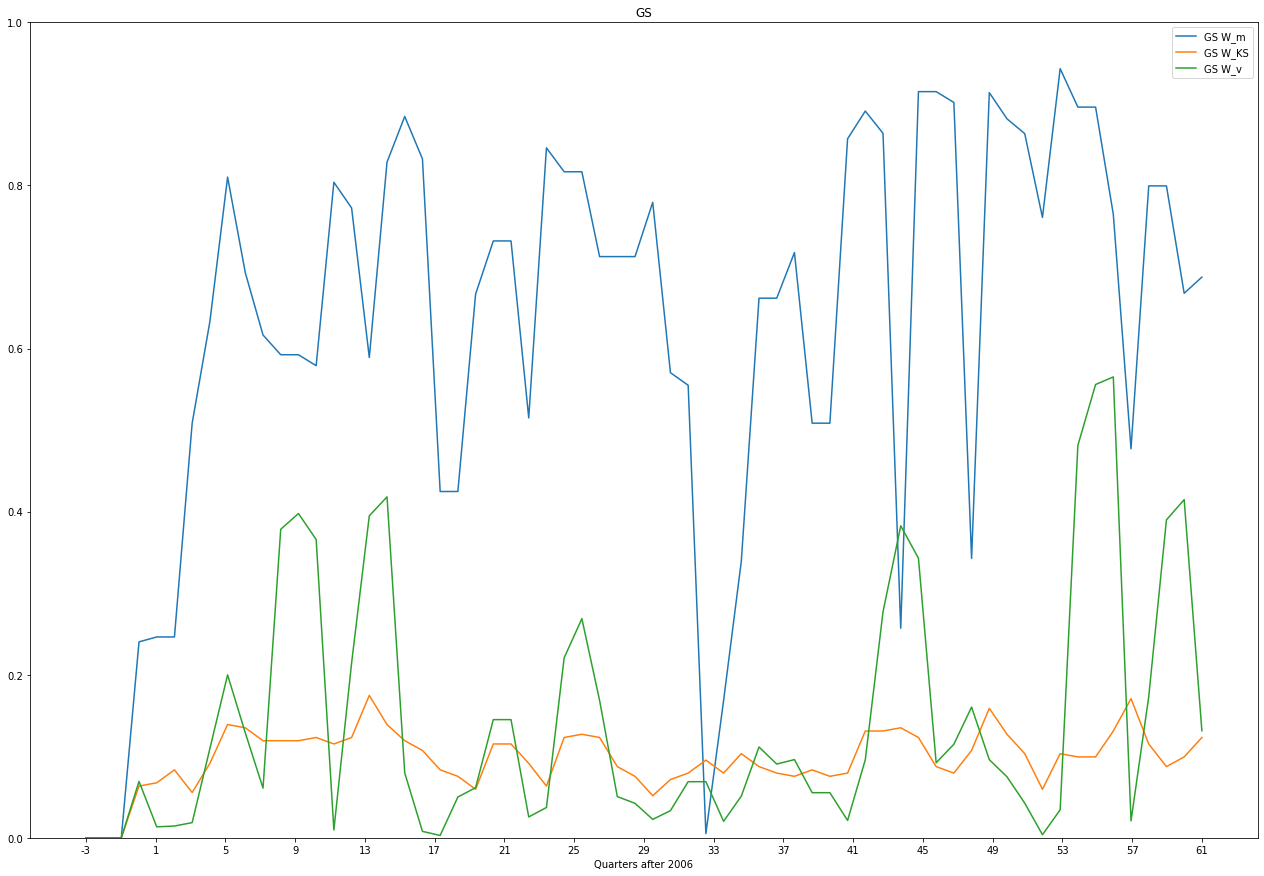

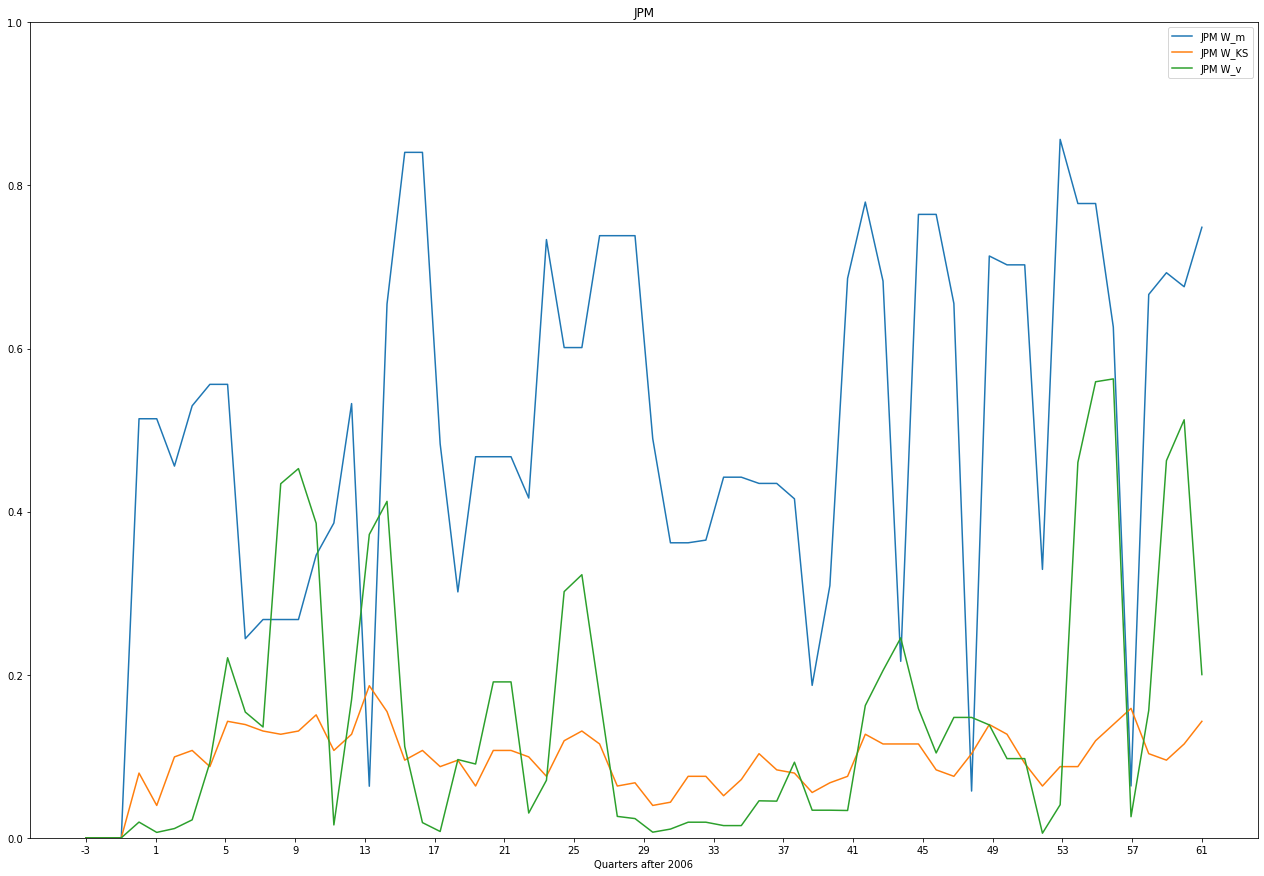

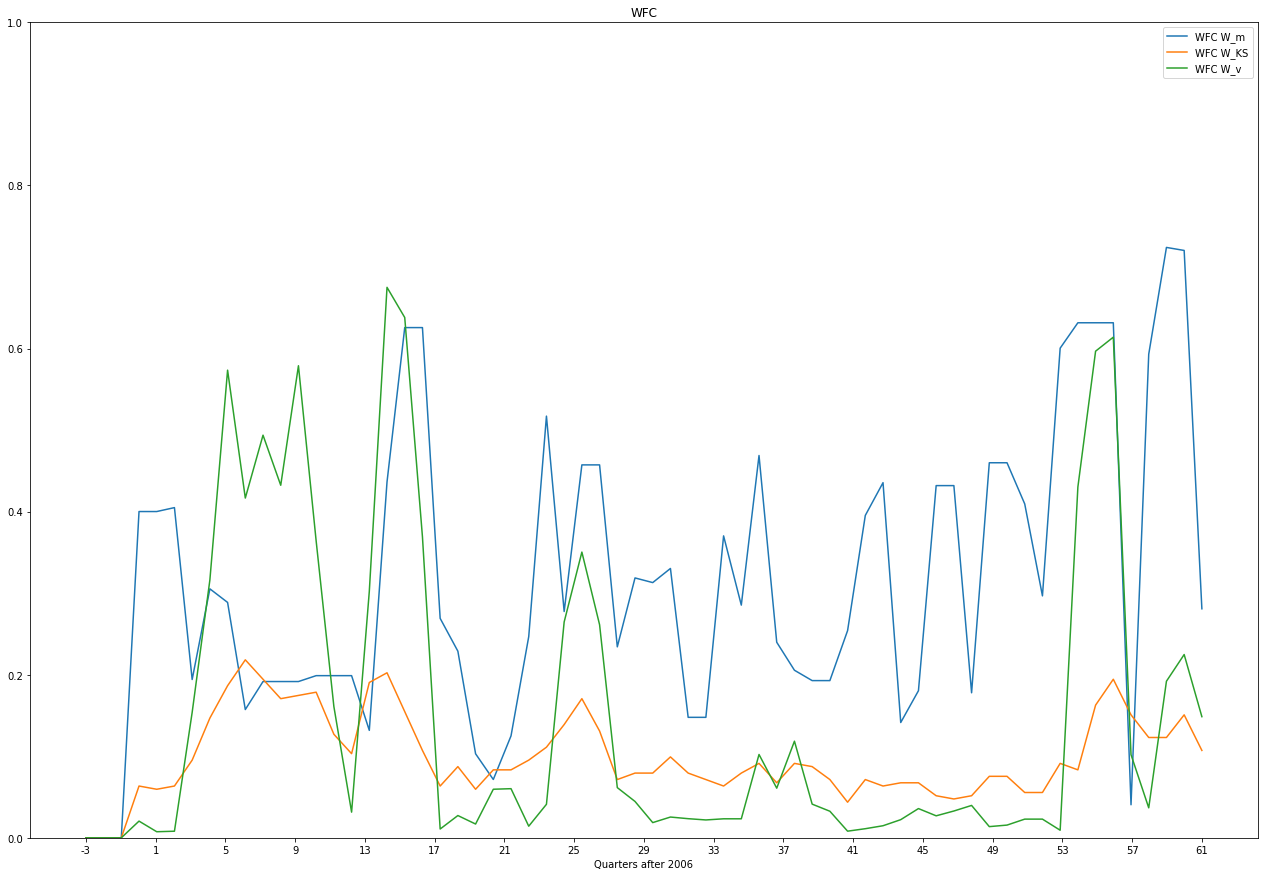

<Figure size 1584x1080 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,15)
mlabel = ["VFINX W_m","VBMFX W_m","VGSLX W_m","VIMAX W_m","VGSTX W_m","VGENX W_m","GS W_m","JPM W_m","WFC W_m"]
KSlabel = ["VFINX W_KS","VBMFX W_KS","VGSLX W_KS","VIMAX W_KS","VGSTX W_KS","VGENX W_KS","GS W_KS","JPM W_KS","WFC W_KS"]
vlabel = ["VFINX W_v","VBMFX W_v","VGSLX W_v","VIMAX W_v","VGSTX W_v","VGENX W_v","GS W_v","JPM W_v","WFC W_v"]
tlabel = ["VFINX","VBMFX","VGSLX","VIMAX","VGSTX","VGENX","GS","JPM","WFC"]

xe = np.linspace(0,64,64)
ax = plt.axes()


  
for p in range(9):

  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  ax.set_yticks([0,.2,.4,.6,.8,1])
  plt.ylim(0,1)
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qwm[p][::-1],label = mlabel[p])
  plt.plot(xe,qwq[p][::-1],label = KSlabel[p])
  plt.plot(xe,qwv[p][::-1],label = vlabel[p]) 
  plt.title(tlabel[p])
  plt.legend()
  plt.figure()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


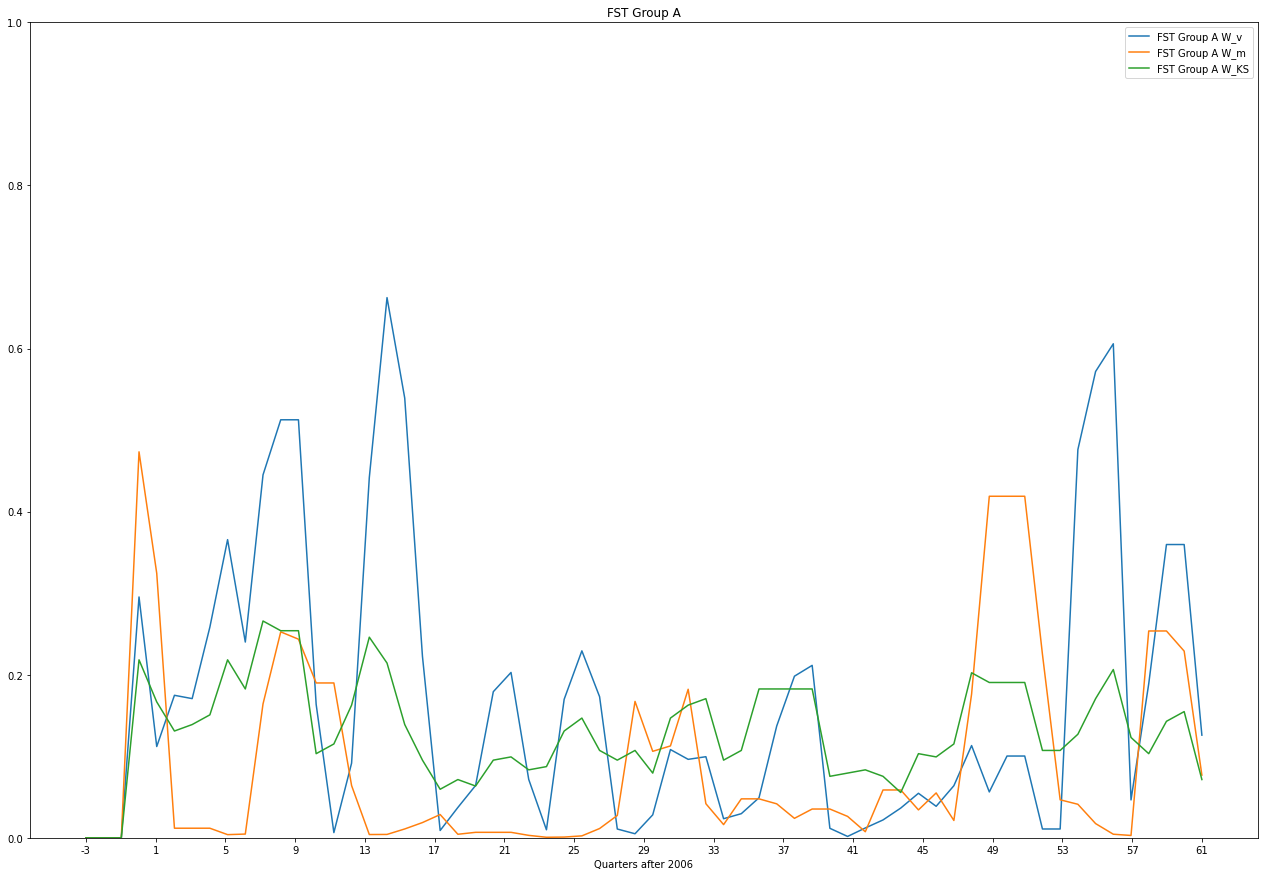

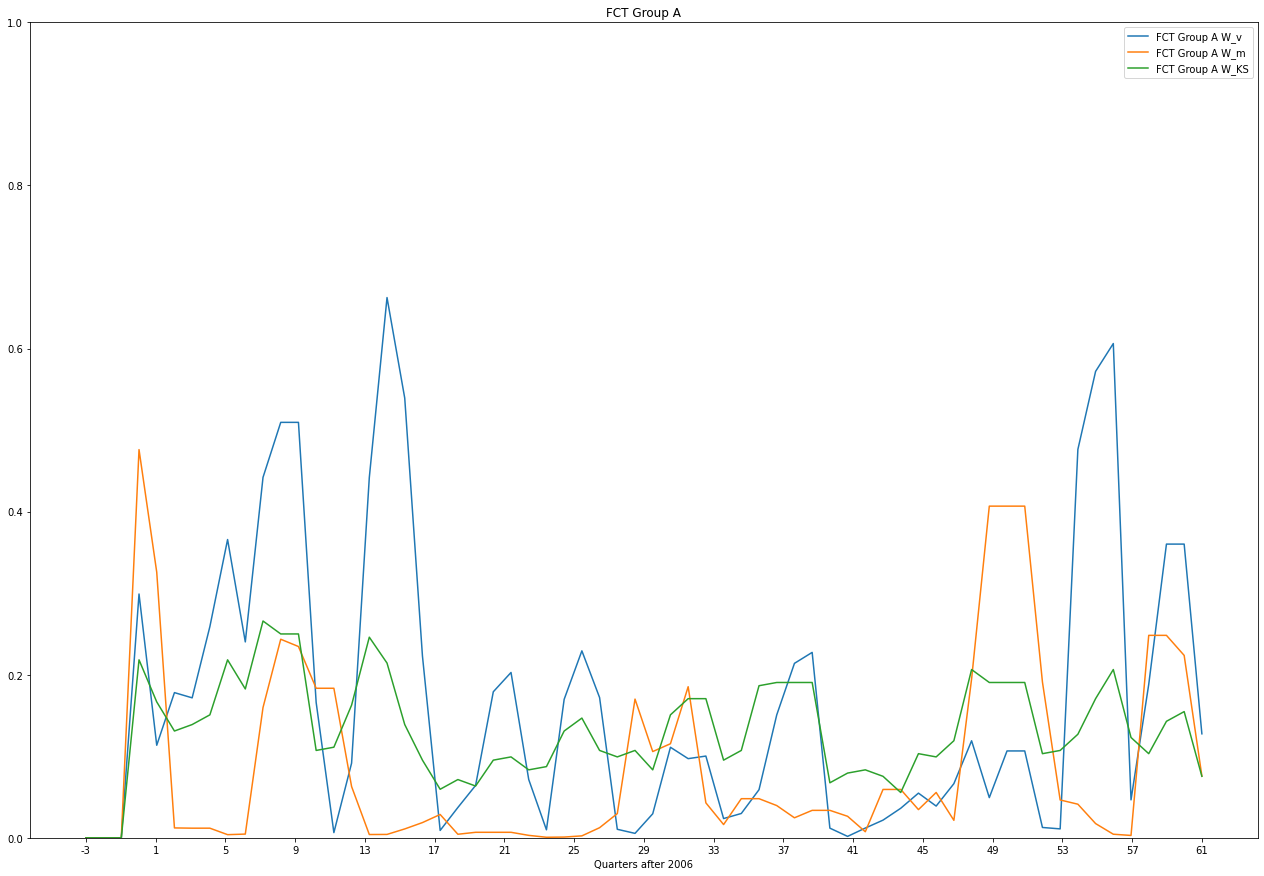

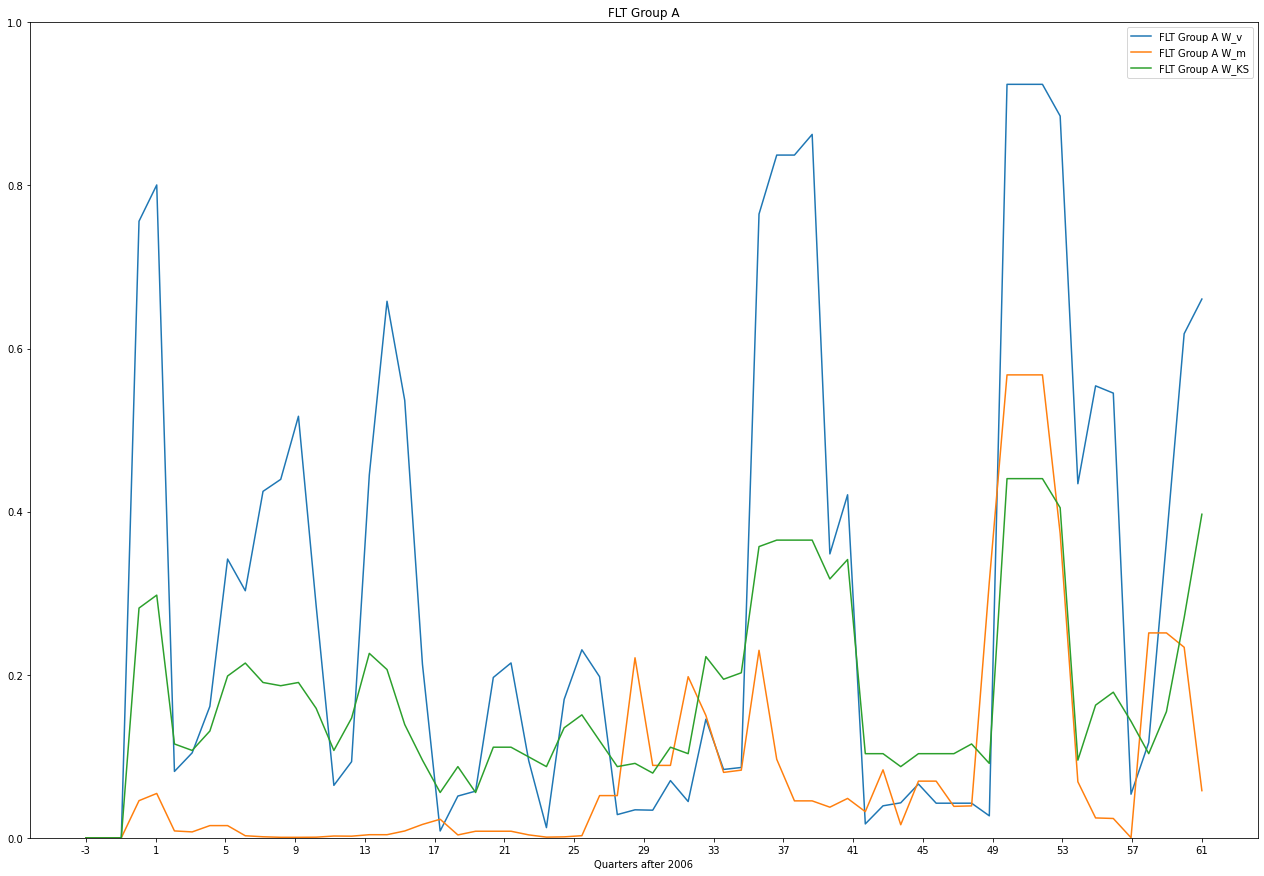

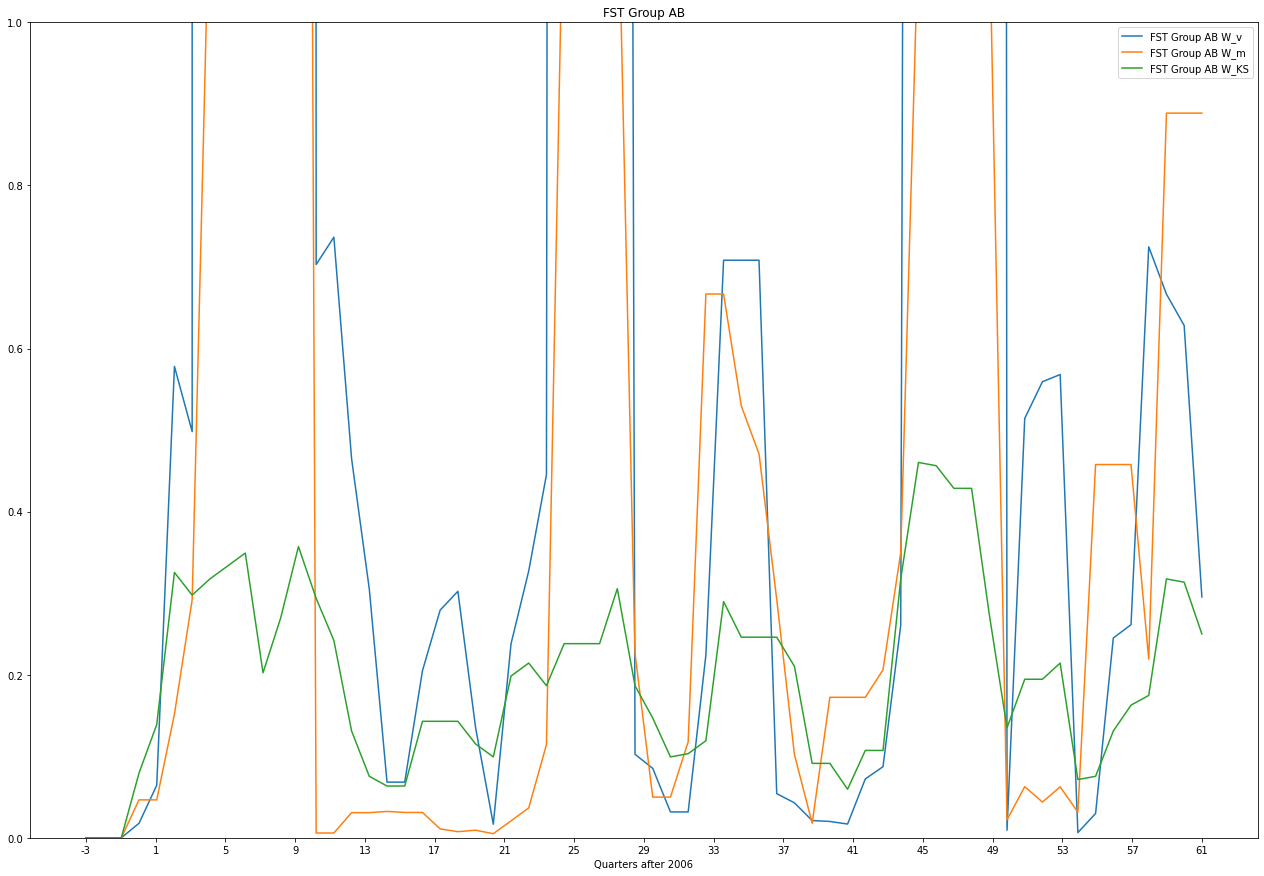

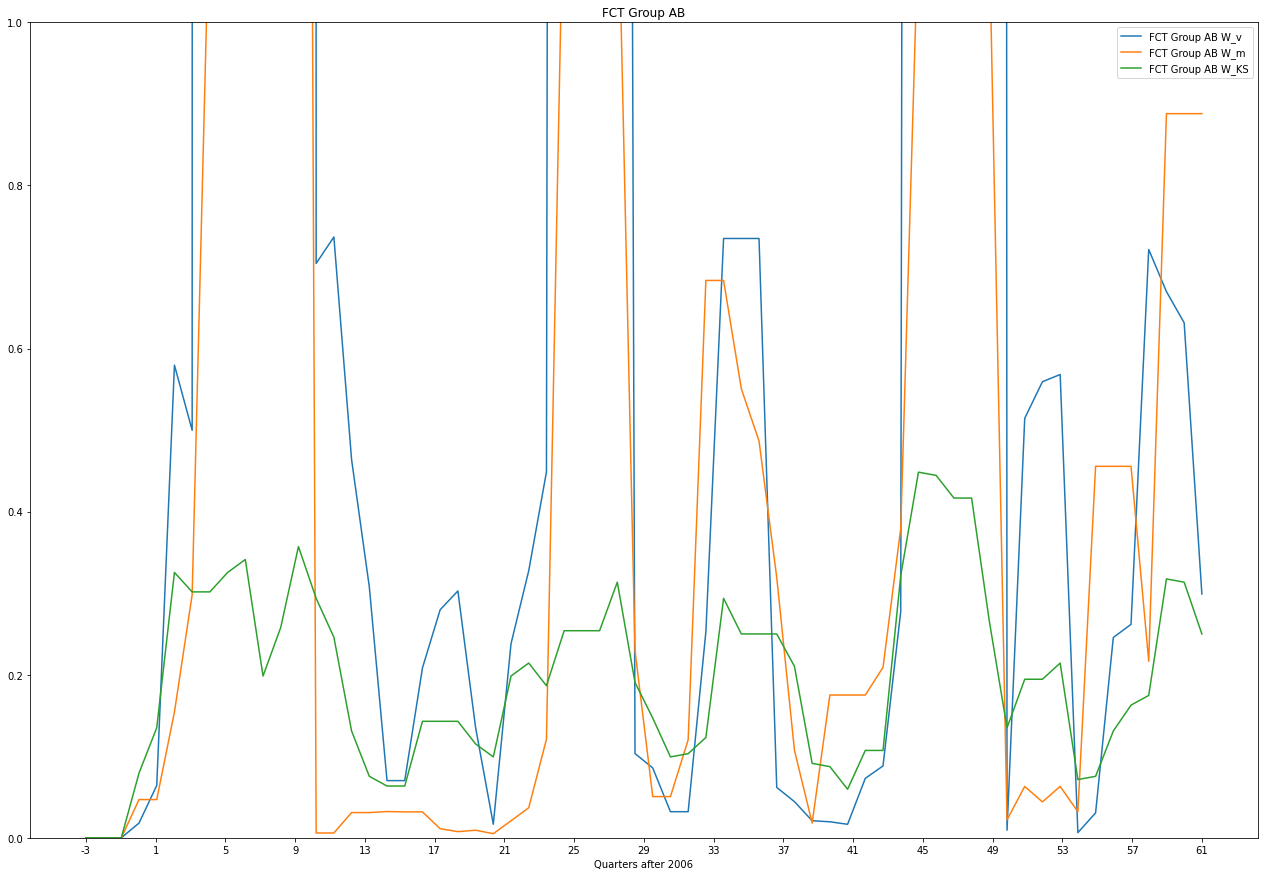

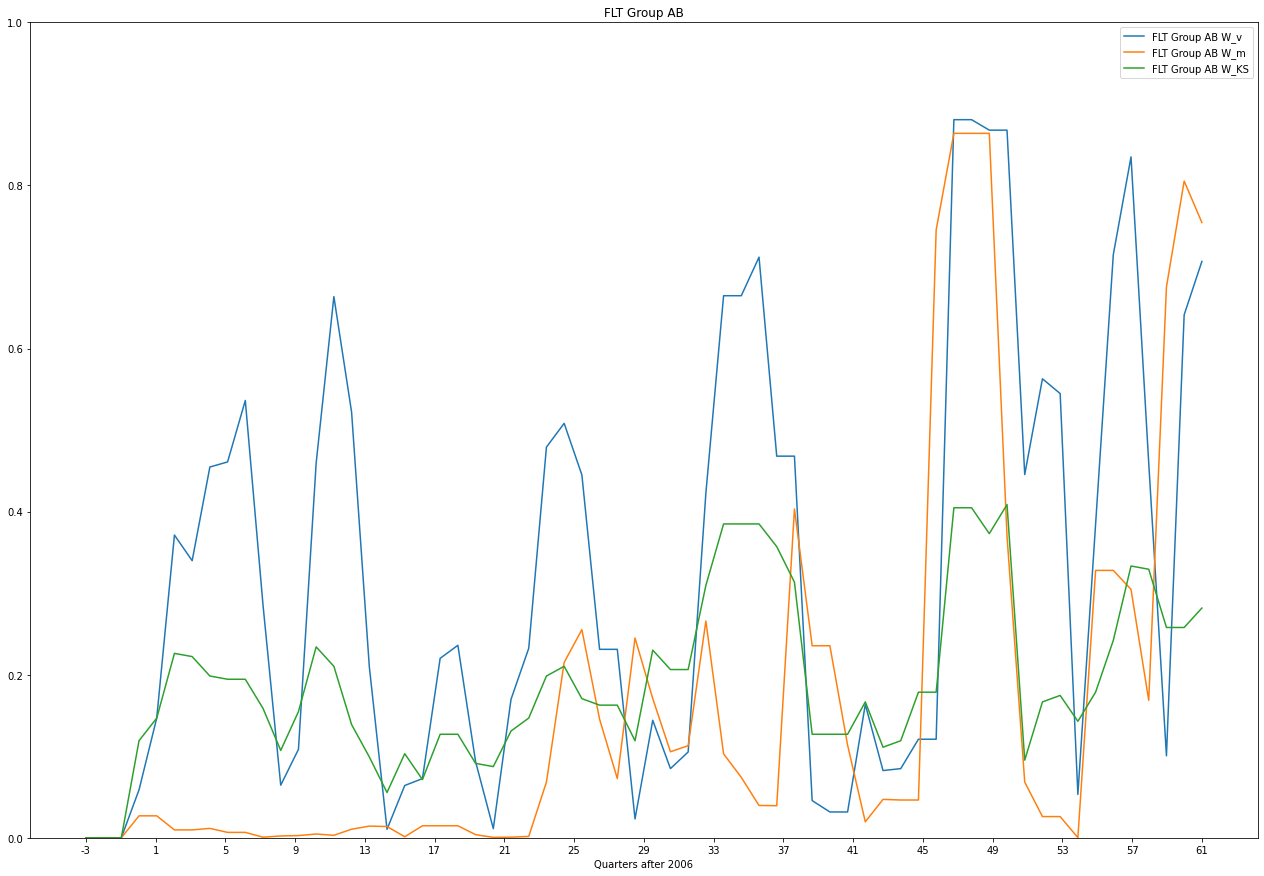

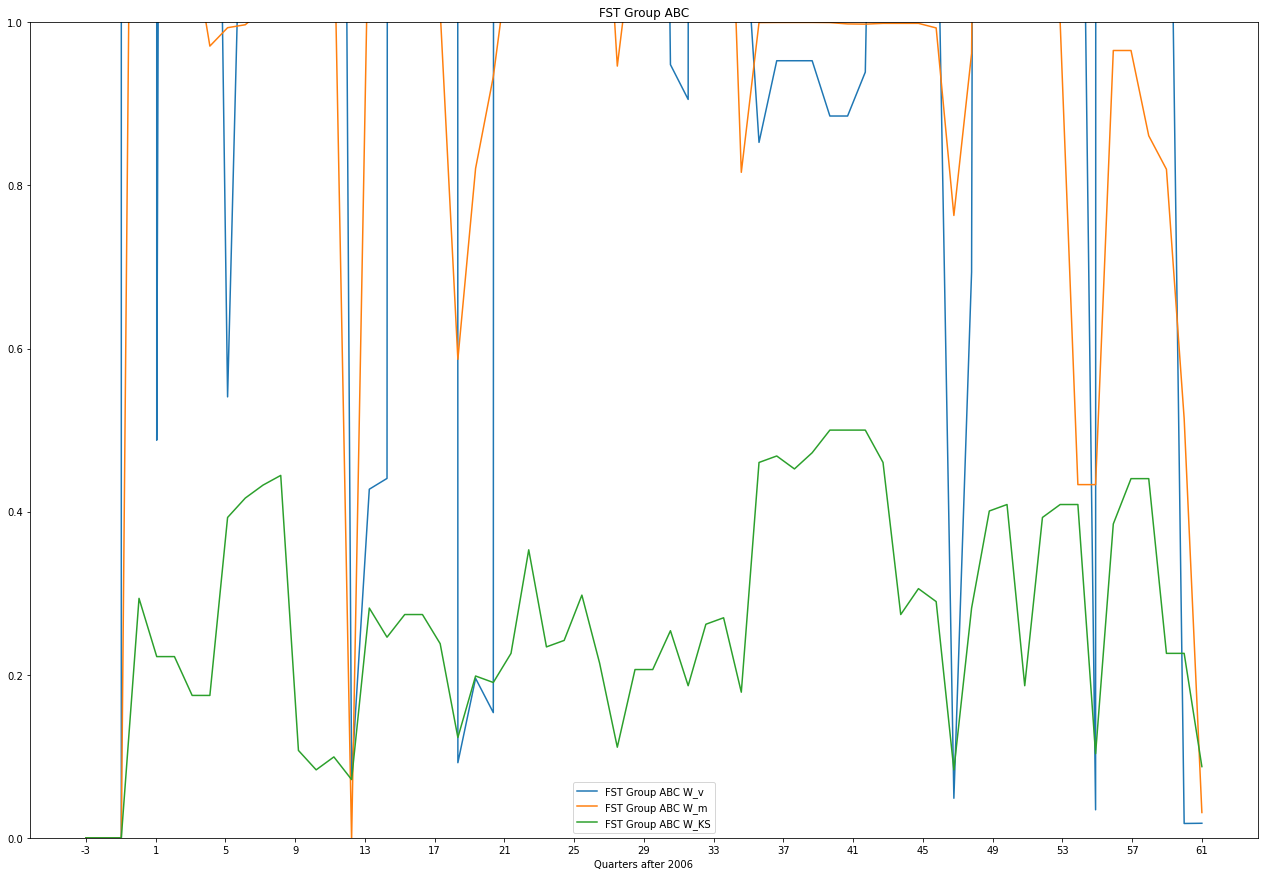

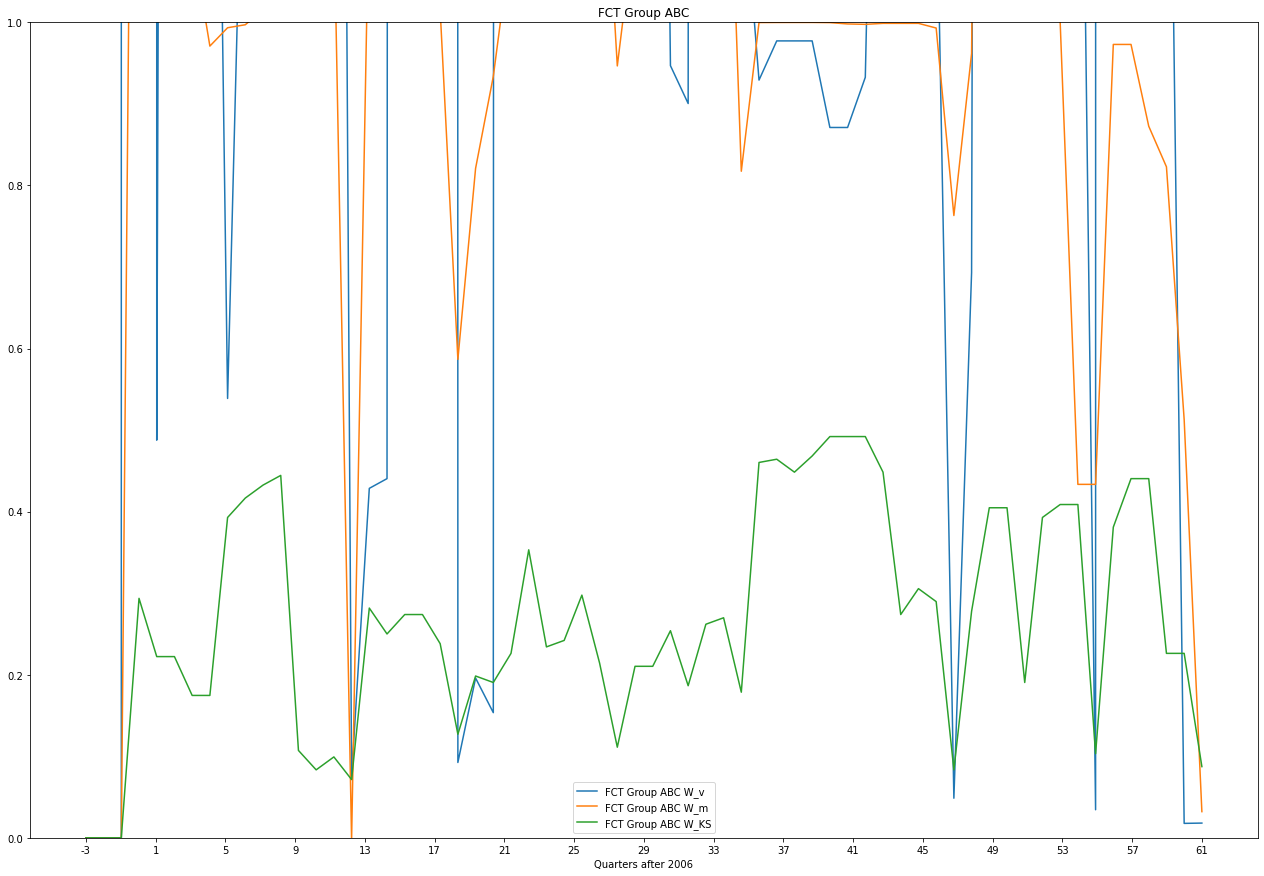

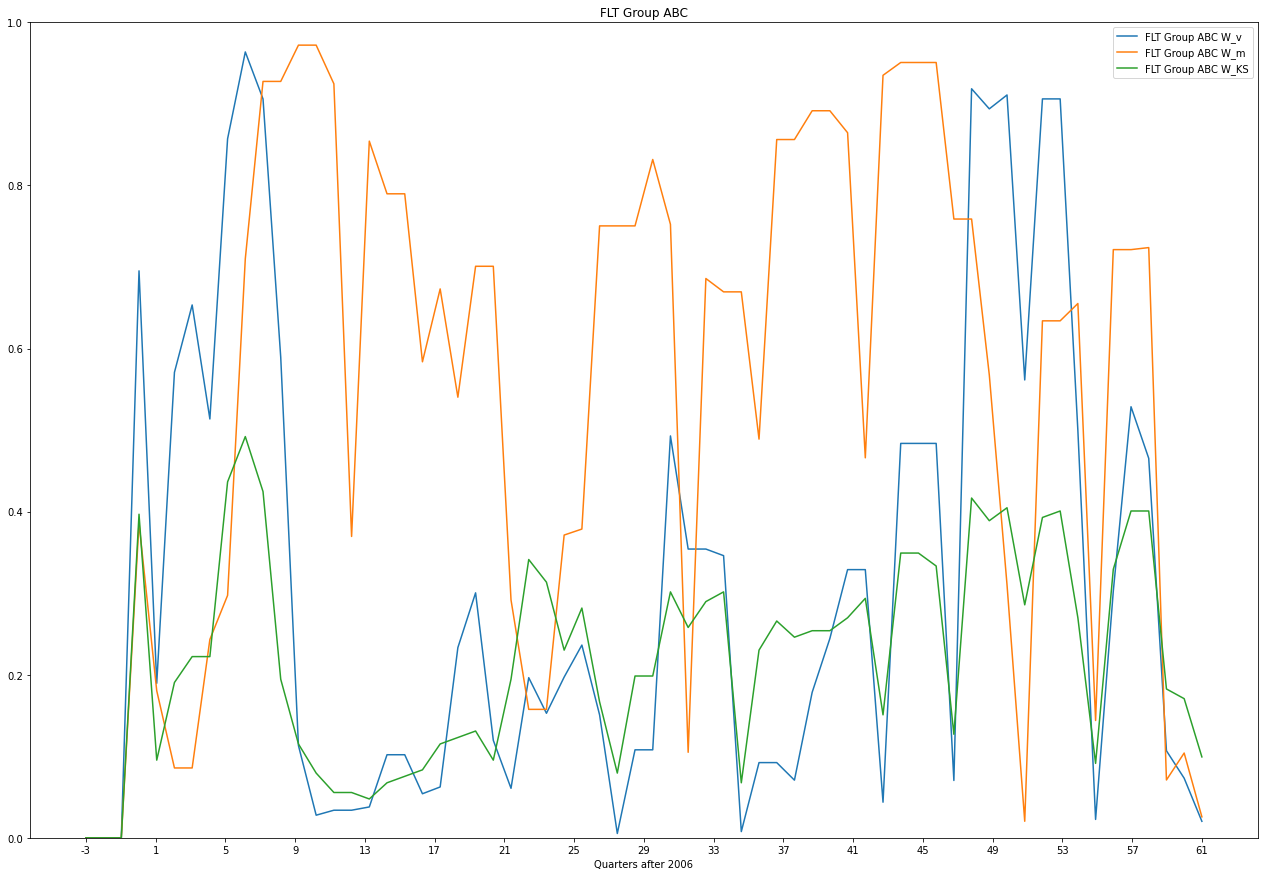

<Figure size 1584x1080 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,15)
vlabelfst = ["FST Group A W_v","FST Group AB W_v","FST Group ABC W_v"]
mlabelfst = ["FST Group A W_m","FST Group AB W_m","FST Group ABC W_m"]
kslabelfst = ["FST Group A W_KS","FST Group AB W_KS","FST Group ABC W_KS"]
vlabelfct = ["FCT Group A W_v","FCT Group AB W_v","FCT Group ABC W_v"]
mlabelfct = ["FCT Group A W_m","FCT Group AB W_m","FCT Group ABC W_m"]
kslabelfct = ["FCT Group A W_KS","FCT Group AB W_KS","FCT Group ABC W_KS"]
vlabelflt = ["FLT Group A W_v","FLT Group AB W_v","FLT Group ABC W_v"]
mlabelflt = ["FLT Group A W_m","FLT Group AB W_m","FLT Group ABC W_m"]
kslabelflt = ["FLT Group A W_KS","FLT Group AB W_KS","FLT Group ABC W_KS"]


tlabelfst = ["FST Group A","FST Group AB","FST Group ABC"]
tlabelfct = ["FCT Group A","FCT Group AB","FCT Group ABC"]
tlabelflt = ["FLT Group A","FLT Group AB","FLT Group ABC"]


xe = np.linspace(0,64,64)
ax = plt.axes()

  
for p in range(3):
  
  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  ax.set_yticks([0,.2,.4,.6,.8,1])
  plt.ylim(0,1)
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qwvfst[p][::-1],label = vlabelfst[p])
  plt.plot(xe,qwmfst[p][::-1],label = mlabelfst[p])
  plt.plot(xe,qwqfst[p][::-1],label = kslabelfst[p])

  plt.title(tlabelfst[p])
  plt.legend()
  plt.figure()

  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  ax.set_yticks([0,.2,.4,.6,.8,1])
  plt.ylim(0,1)
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qwvfct[p][::-1],label = vlabelfct[p])
  plt.plot(xe,qwmfct[p][::-1],label = mlabelfct[p])
  plt.plot(xe,qwqfct[p][::-1],label = kslabelfct[p])

  plt.title(tlabelfct[p])
  plt.legend()
  plt.figure()

  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  ax.set_yticks([0,.2,.4,.6,.8,1])
  plt.ylim(0,1)
  plt.xlabel("Quarters after 2006")
  plt.plot(xe,qwvflt[p][::-1],label = vlabelflt[p])
  plt.plot(xe,qwmflt[p][::-1],label = mlabelflt[p])
  plt.plot(xe,qwqflt[p][::-1],label = kslabelflt[p])

  plt.title(tlabelflt[p])
  plt.legend()
  plt.figure()

In [ ]:
war = np.zeros((16,4,9))
warfst = np.zeros((16,3,4))
warfct = np.zeros((16,3,4))
warflt = np.zeros((16,3,4))

wac = np.zeros((16,4,9))
wacfst = np.zeros((16,3,4))
wacfct = np.zeros((16,3,4))
wacflt = np.zeros((16,3,4))

voz = np.zeros((16,4,9))
vozfst = np.zeros((16,3,4))
vozfct = np.zeros((16,3,4))
vozflt = np.zeros((16,3,4))

vzz = np.zeros((16,4,9))
vzzfst = np.zeros((16,3,4))
vzzfct = np.zeros((16,3,4))
vzzflt = np.zeros((16,3,4))

voo = np.zeros((16,4,9))
voofst = np.zeros((16,3,4))
voofct = np.zeros((16,3,4))
vooflt = np.zeros((16,3,4))


cphi = np.zeros((16,4,9))
cphifst = np.zeros((16,3,4))
cphifct = np.zeros((16,3,4))
cphiflt = np.zeros((16,3,4))

lb = np.zeros((16,4,9))
lbfst = np.zeros((16,3,4))
lbfct = np.zeros((16,3,4))
lbflt = np.zeros((16,3,4))

w = 1/252
wo =(252 - 1)/(252**2)



count = 1

for i in range(16):
  for j in range(4):
    for l in range(9):
      if(count== 64):
        break
      for d in range(251):
        voo[i][j][l] = voo[i][j][l] + (roll_ret[i][j][d+1][l] - roll_means[i][2][j][l])**2 
        vzz[i][j][l] = vzz[i][j][l] + (roll_ret[i][j][d][l] - roll_means[i][2][j][l])**2 
        voz[i][j][l] = voz[i][j][l] + (roll_ret[i][j][d + 1][l] - roll_means[i][2][j][l]) * (roll_ret[i][j][d][l] - roll_means[i][2][j][l])
      voo[i][j][l] = voo[i][j][l]/251
      vzz[i][j][l]  = vzz[i][j][l]/251
      voz[i][j][l]  = voz[i][j][l]/251

      war[i][j][l] = voz[i][j][l]**2/(vzz[i][j][l] * voo[i][j][l])
      lb[i][j][l] = (((vzz[i][j][l] - voo[i][j][l]) **2)/(((vzz[i][j][l] - voo[i][j][l]) **2) + ((vzz[i][j][l] + voo[i][j][l]) **2) + 4*voz[i][j][l]**2))
      cphi[i][j][l] = ((2*(1-w)*voz[i][j][l] + wo*((vzz[i][j][l] + voo[i][j][l])))**2/(((1 - w)**2 + wo**2)*(((vzz[i][j][l] + voo[i][j][l]) **2) + 4*voz[i][j][l]**2)))
      wac[i][j][l] = lb[i][j][l] + (1 - lb[i][j][l])*cphi[i][j][l]


    count = count + 1

count = 1

for i in range(16):
  for j in range(4):
    for k in range(3):

      if(count == 192):
        break

      for d in range(251):
        voofst[i][k][j] = voo[i][k][j] + (qrfst[count][d+1] - qmfst[count])**2 
        vzzfst[i][k][j] = vzz[i][k][j] + (qrfst[count][d] - qmfst[count])**2 
        vozfst[i][k][j] = voz[i][k][j] + (qrfst[count][d + 1] - qmfst[count]) * (qrfst[count][d] - qmfst[count])  
        voofct[i][k][j] = voo[i][k][j] + (qrfct[count][d+1] - qmfct[count])**2 
        vzzfct[i][k][j] = vzz[i][k][j] + (qrfct[count][d] - qmfct[count])**2 
        vozfct[i][k][j] = voz[i][k][j] + (qrfct[count][d + 1] - qmfct[count]) * (qrfct[count][d] - qmfct[count])  
        vooflt[i][k][j] = voo[i][k][j] + (qrflt[count][d+1] - qmflt[count])**2 
        vzzflt[i][k][j] = vzz[i][k][j] + (qrflt[count][d] - qmflt[count])**2 
        vozflt[i][k][j] = voz[i][k][j] + (qrflt[count][d + 1] - qmflt[count]) * (qrflt[count][d] - qmflt[count])  


      warfst[i][k][j] = vozfst[i][k][j]**2/(vzzfst[i][k][j] * voofst[i][k][j])
      warfct[i][k][j] = vozfct[i][k][j]**2/(vzzfct[i][k][j] * voofct[i][k][j])
      warflt[i][k][j] = vozflt[i][k][j]**2/(vzzflt[i][k][j] * vooflt[i][k][j])

      lbfst[i][k][j] = (((vzzfst[i][k][j] - voofst[i][k][j]) **2)/(((vzzfst[i][k][j] - voofst[i][k][j]) **2) + ((vzzfst[i][k][j] + voofst[i][k][j]) **2) + 4*vozfst[i][k][j]**2))
      cphifst[i][k][j] = ((2*(1-w)*vozfst[i][k][j] + wo*((vzzfst[i][k][j] - voofst[i][k][j])))**2/(((1 - w)**2 + wo**2)*(((vzzfst[i][k][j] - voofst[i][k][j]) **2) + 4*vozfst[i][k][j]**2)))
      wacfst[i][k][j] = lbfst[i][k][j] + (1 - lbfst[i][k][j])*cphifst[i][k][j]

      lbfct[i][k][j] = (((vzzfct[i][k][j] - voofct[i][k][j]) **2)/(((vzzfct[i][k][j] - voofct[i][k][j]) **2) + ((vzzfct[i][k][j] + voofct[i][k][j]) **2) + 4*vozfct[i][k][j]**2))
      cphifct[i][k][j] = ((2*(1-w)*vozfct[i][k][j] + wo*((vzzfct[i][k][j] - voofct[i][k][j])))**2/(((1 - w)**2 + wo**2)*(((vzzfct[i][k][j] - voofct[i][k][j]) **2) + 4*vozfct[i][k][j]**2)))
      wacfct[i][k][j] = lbfct[i][k][j] + (1 - lbfct[i][k][j])*cphifct[i][k][j]

      lbflt[i][k][j] = (((vzzflt[i][k][j] - vooflt[i][k][j]) **2)/(((vzzflt[i][k][j] - vooflt[i][k][j]) **2) + ((vzzflt[i][k][j] + vooflt[i][k][j]) **2) + 4*vozflt[i][k][j]**2))
      cphiflt[i][k][j] = ((2*(1-w)*vozflt[i][k][j] + wo*((vzzflt[i][k][j] - vooflt[i][k][j])))**2/(((1 - w)**2 + wo**2)*(((vzzflt[i][k][j] - vooflt[i][k][j]) **2) + 4*vozflt[i][k][j]**2)))
      wacflt[i][k][j] = lbflt[i][k][j] + (1 - lbflt[i][k][j])*cphiflt[i][k][j]    

      count = count + 1
 

In [ ]:
qwar = [[],[],[],[],[],[],[],[],[]]
qwac = [[],[],[],[],[],[],[],[],[]]

qwarflt = [[],[],[]]
qwacflt = [[],[],[]]

qwarfst = [[],[],[]]
qwacfst = [[],[],[]]


qwarfct = [[],[],[]]
qwacfct = [[],[],[]]



for i in range(16):
  for j in range(4):
    for l in range(9):
      qwar[l].append(war[i][j][l])
      qwac[l].append(wac[i][j][l])

    for k in range(3):
      qwarflt[k].append(warflt[i][k][j])
      qwacflt[k].append(wacflt[i][k][j])

      qwarfst[k].append(warfst[i][k][j])
      qwacfst[k].append(wacfst[i][k][j])

      qwarfct[k].append(warfct[i][k][j])
      qwacfct[k].append(wacfct[i][k][j])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


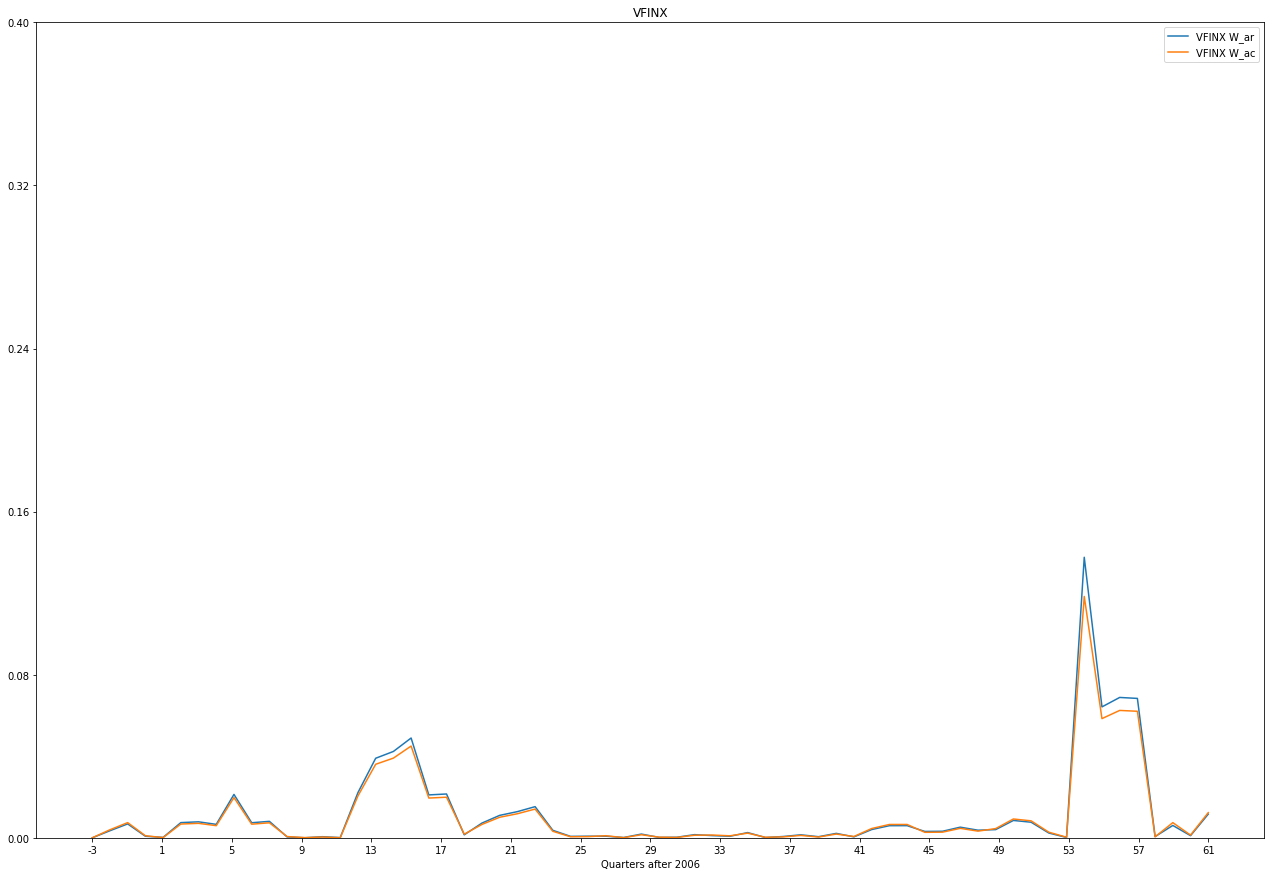

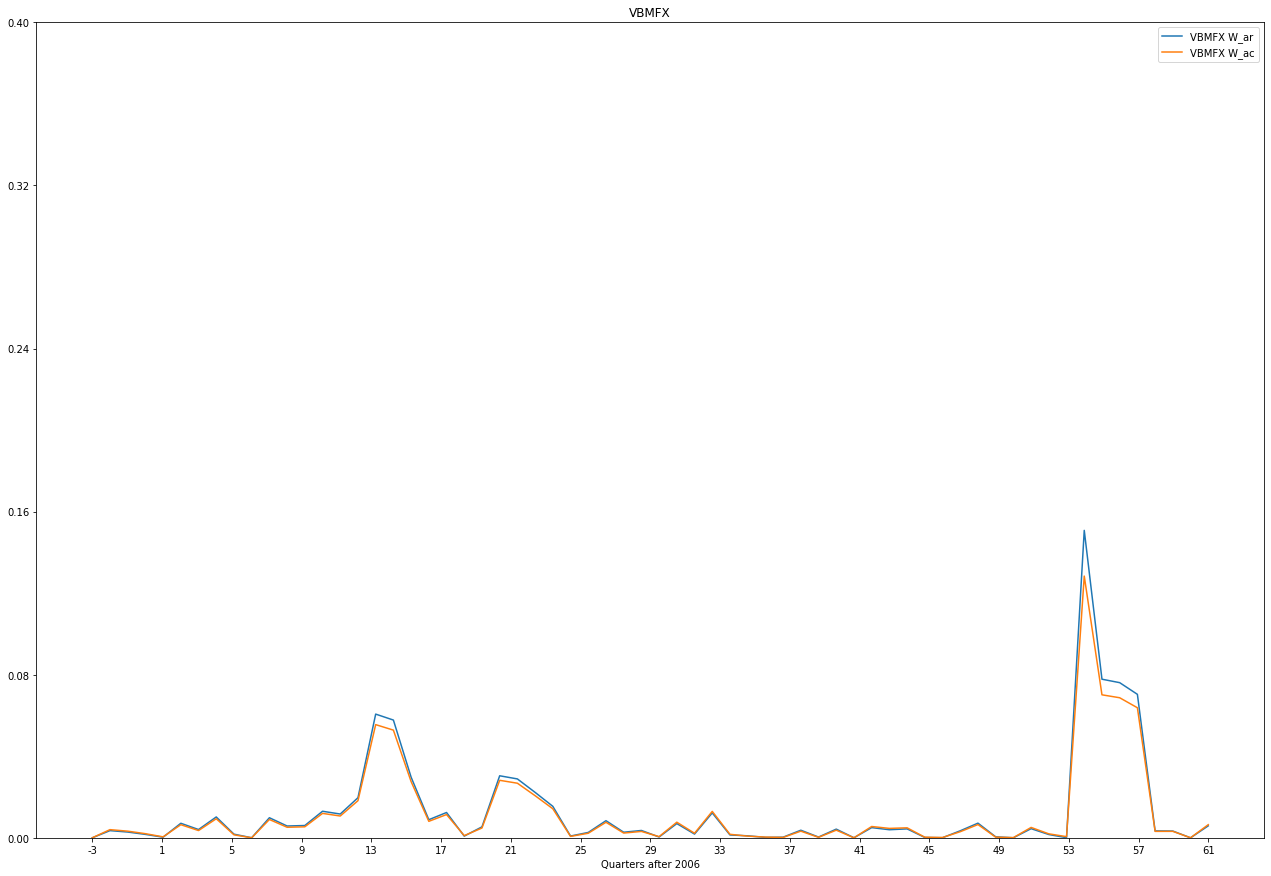

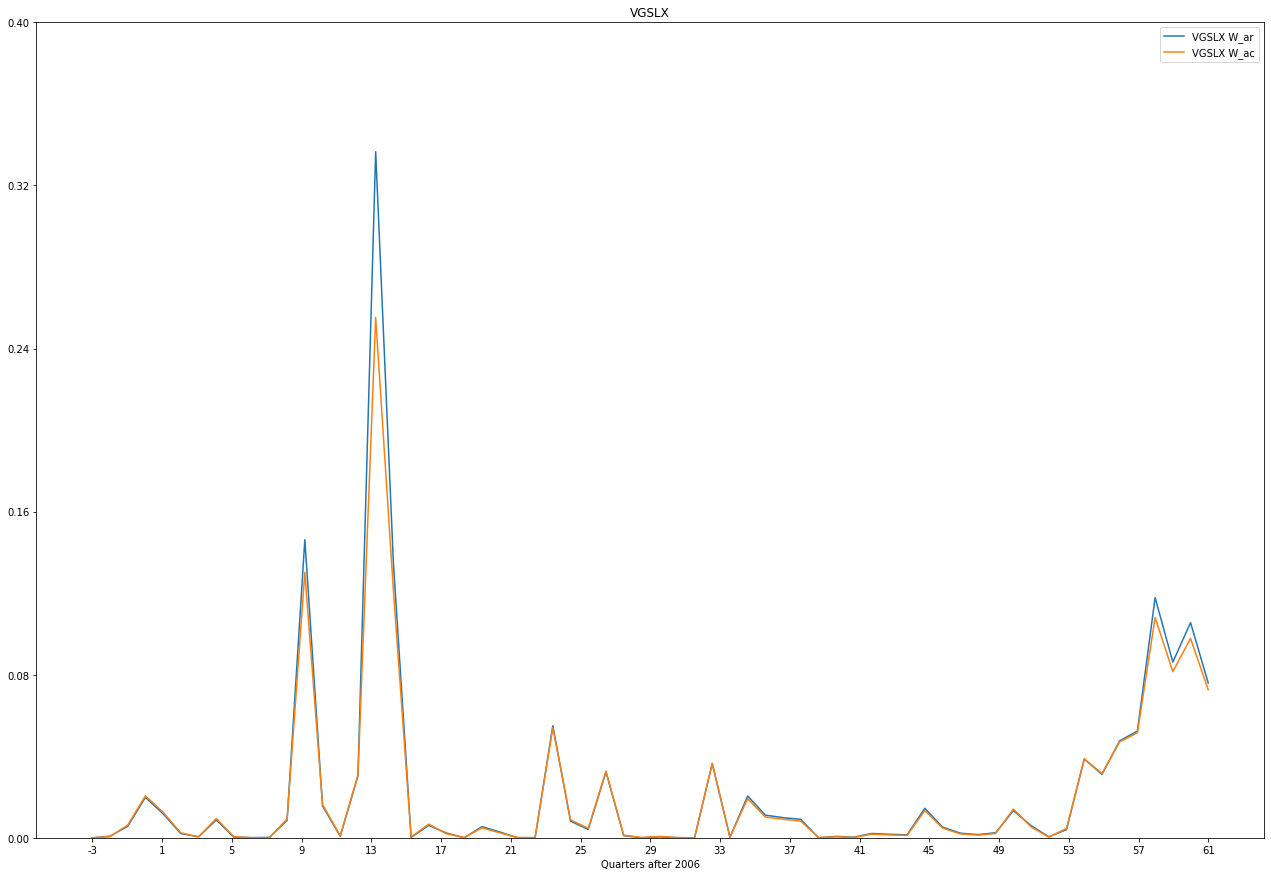

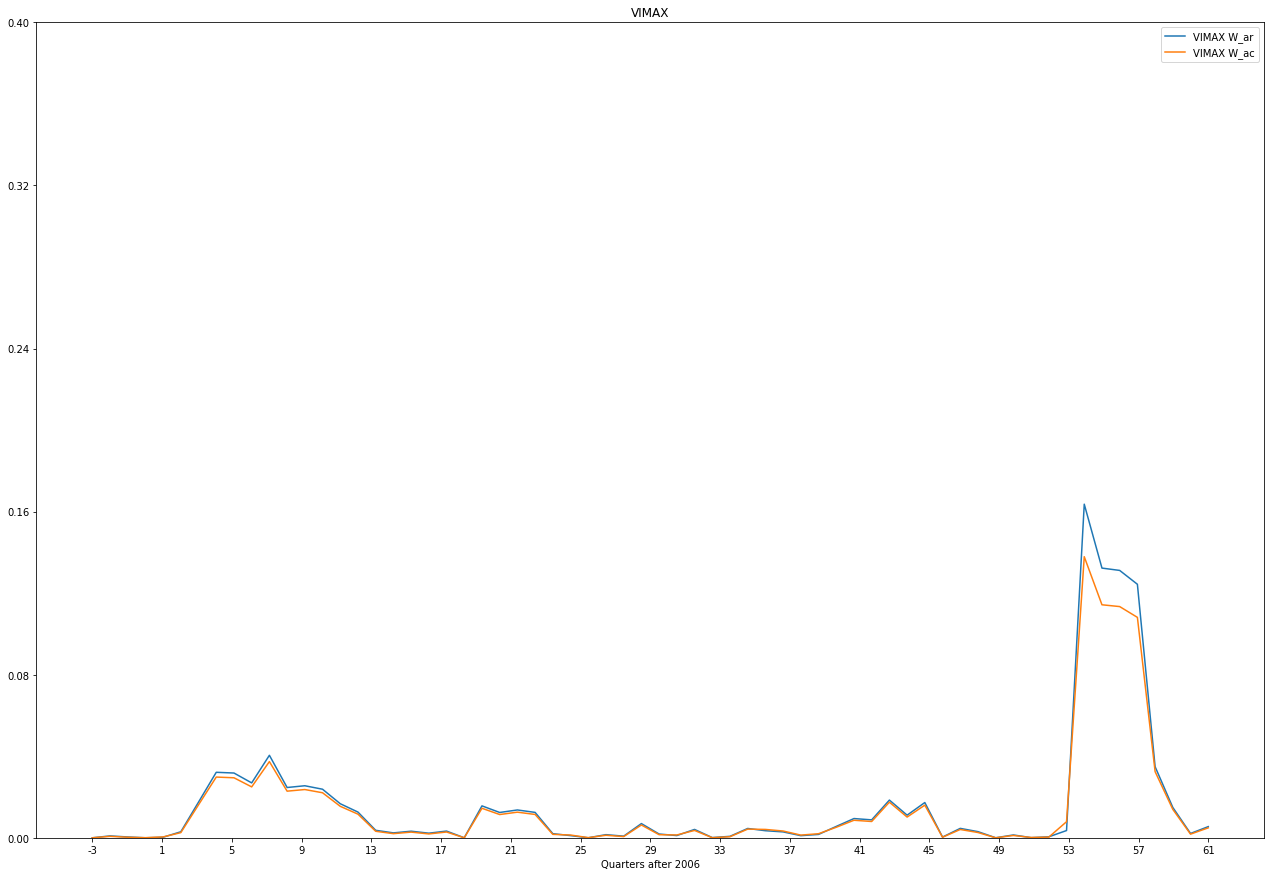

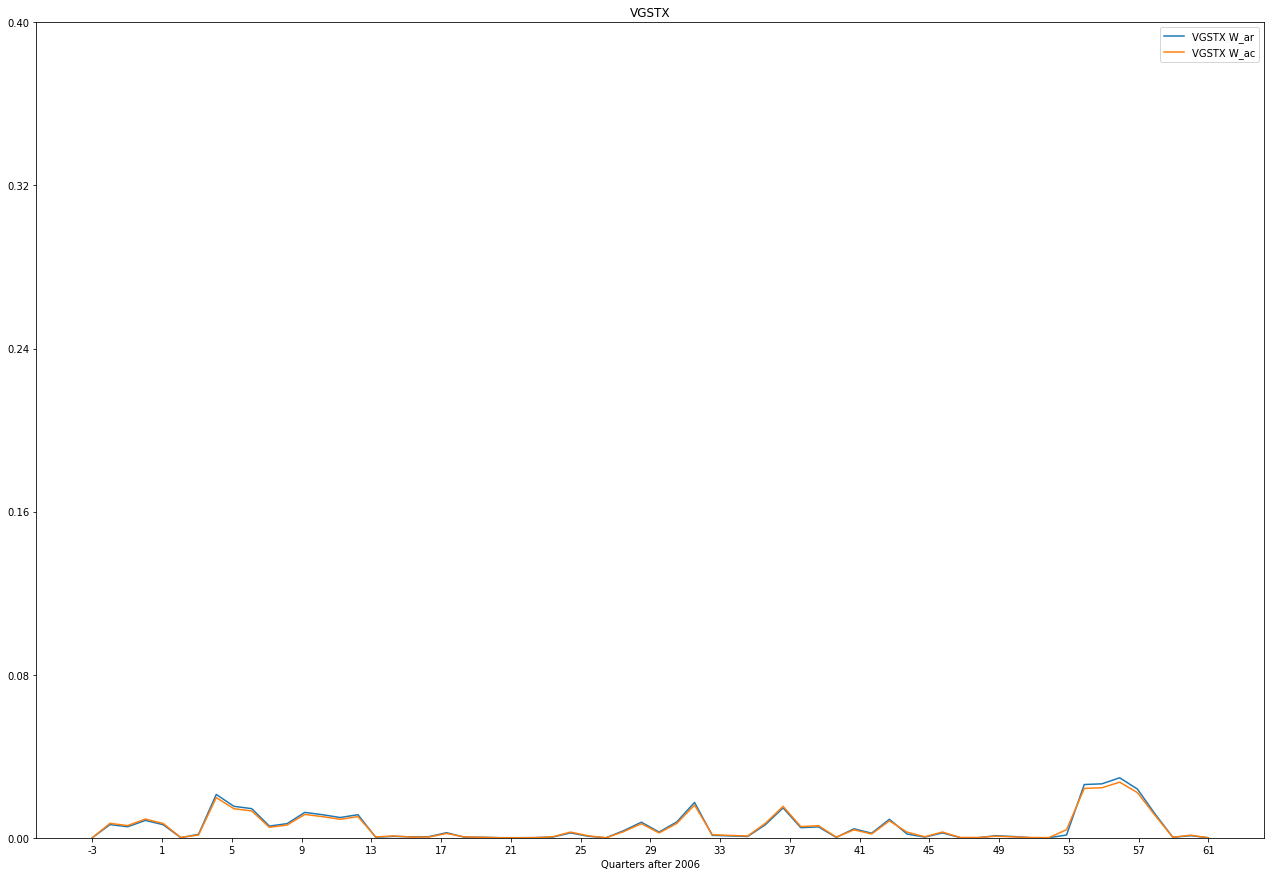

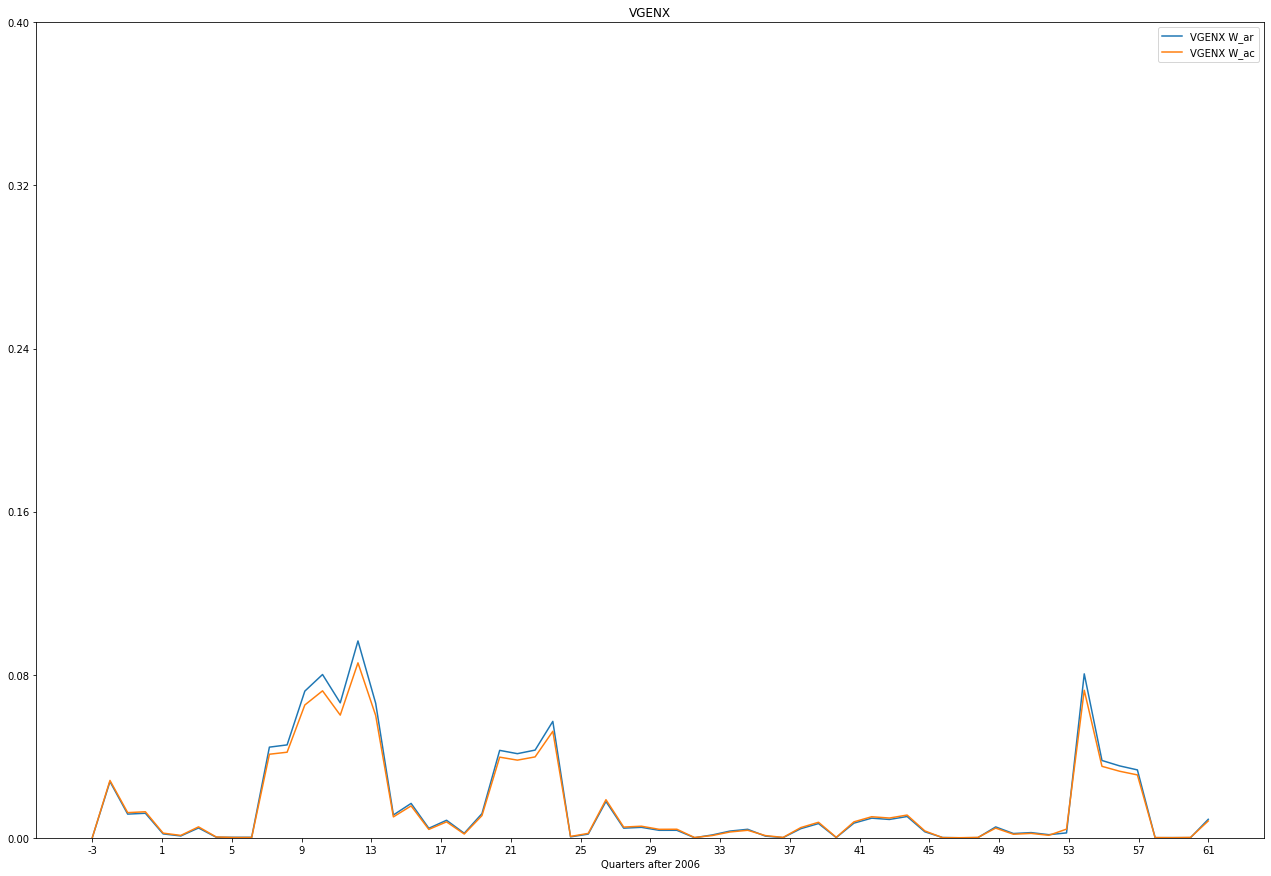

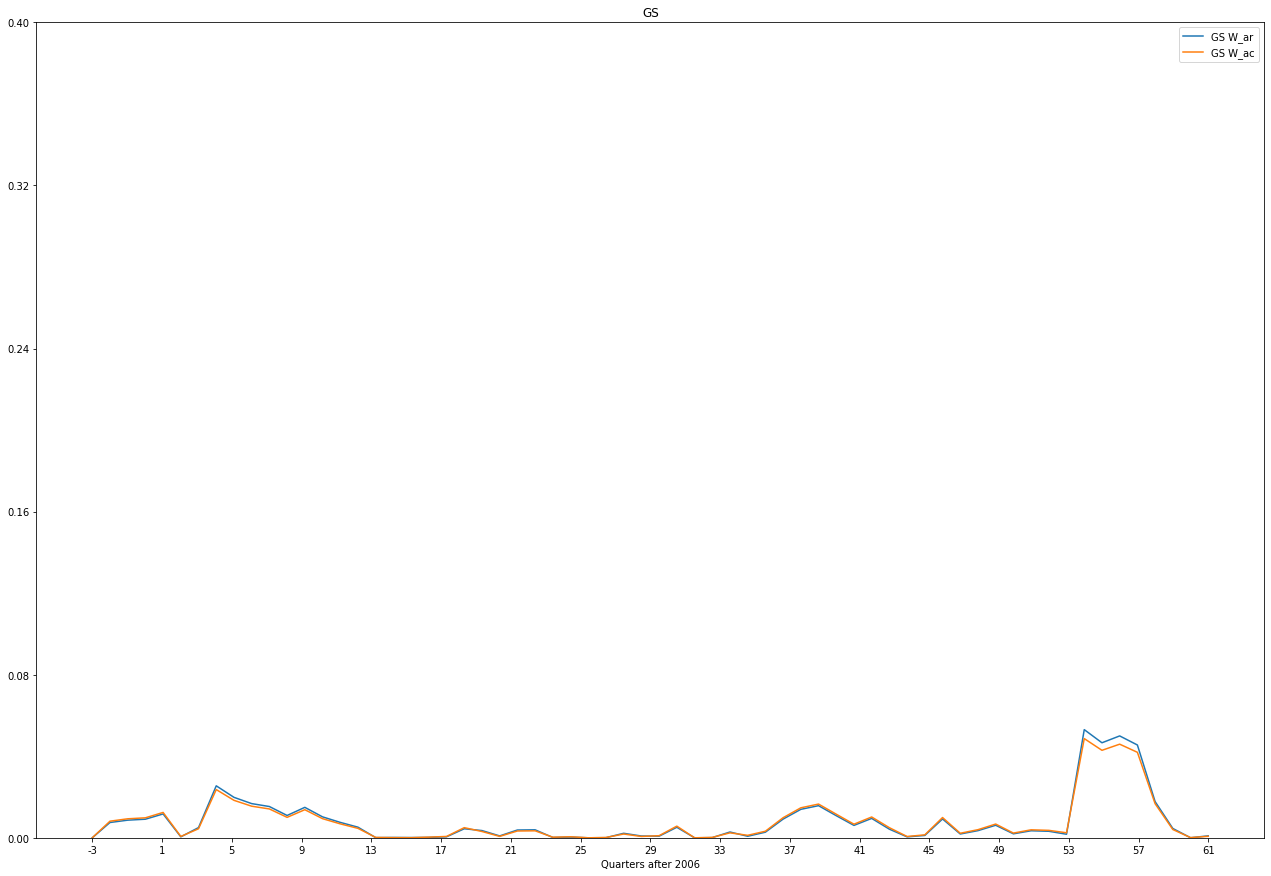

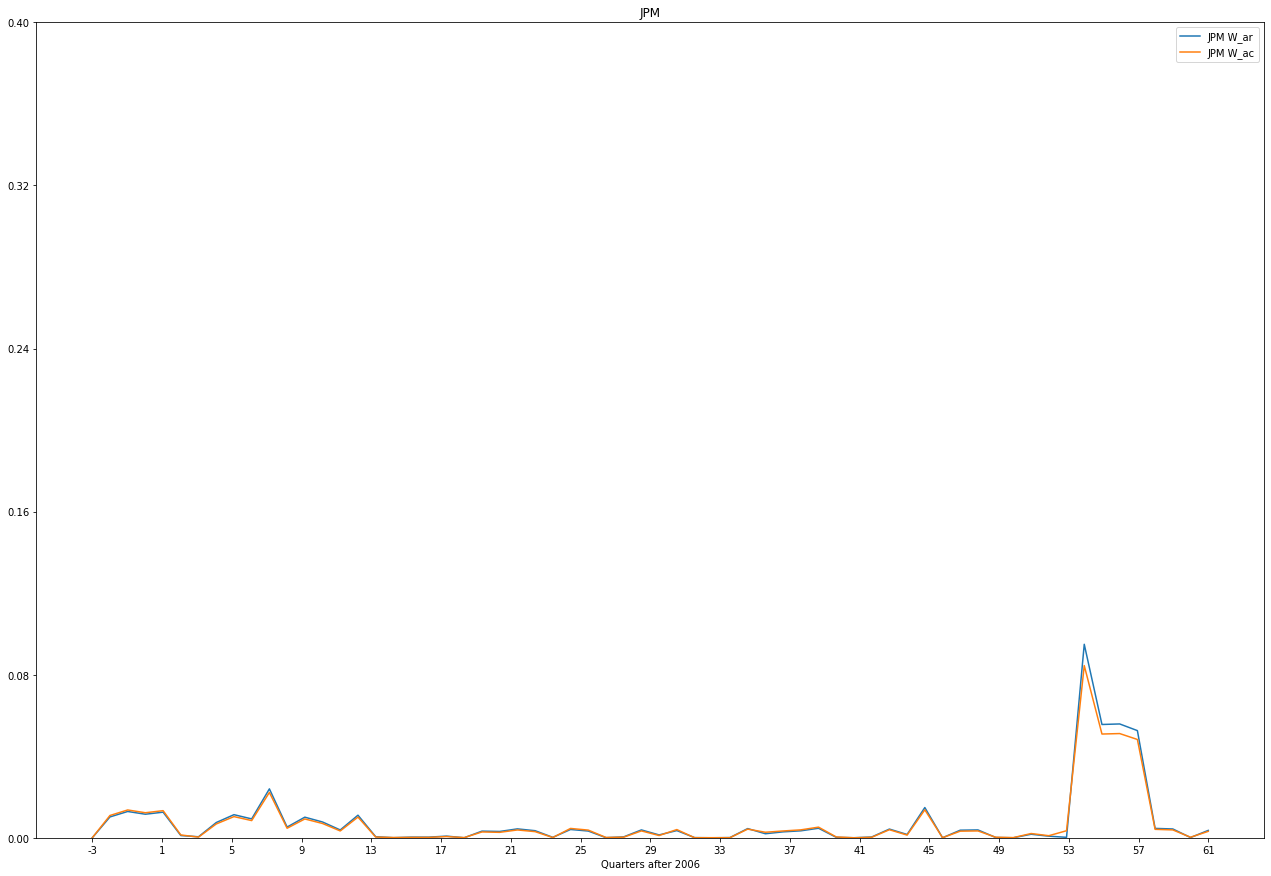

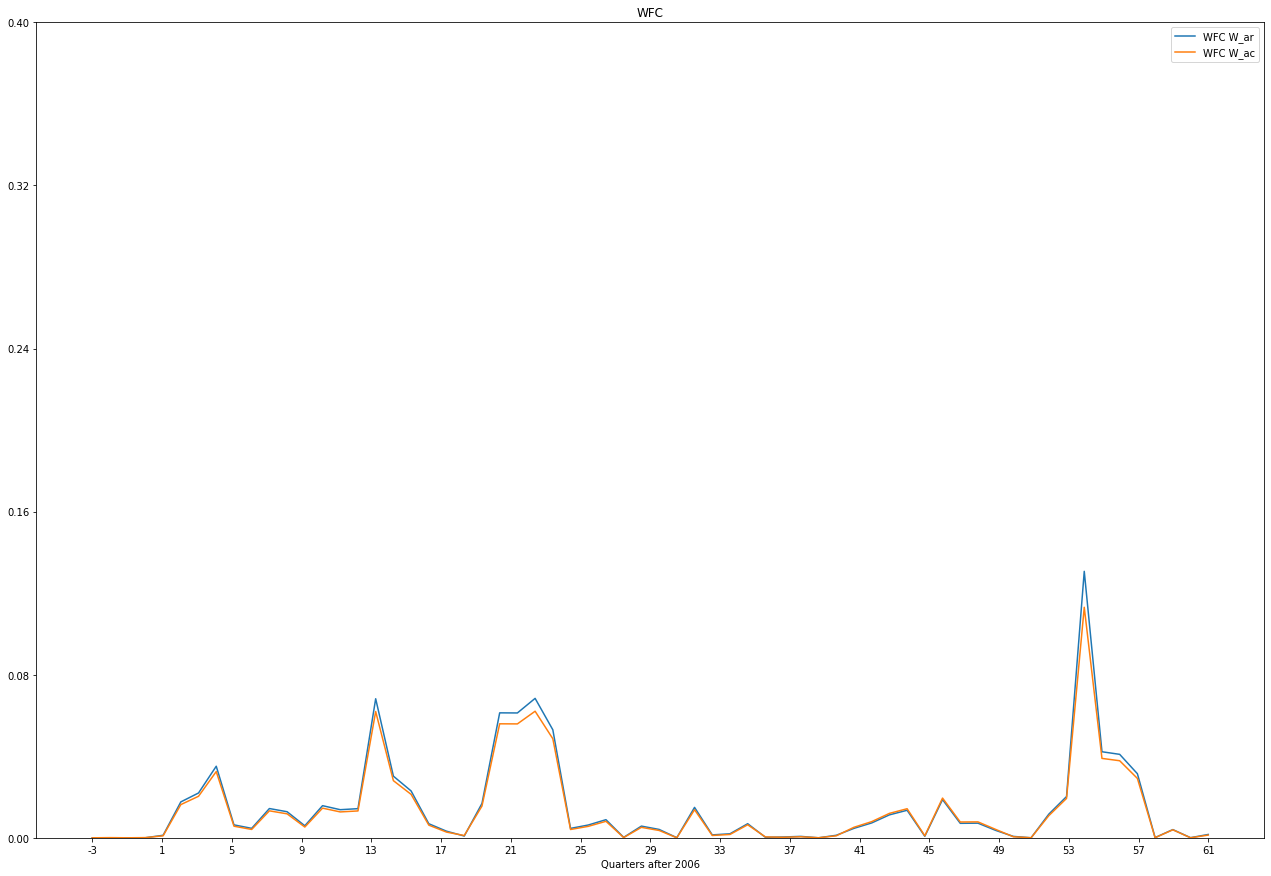

<Figure size 1584x1080 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,15)
arlabel = ["VFINX W_ar","VBMFX W_ar","VGSLX W_ar","VIMAX W_ar","VGSTX W_ar","VGENX W_ar","GS W_ar","JPM W_ar","WFC W_ar"]
aclabel = ["VFINX W_ac","VBMFX W_ac","VGSLX W_ac","VIMAX W_ac","VGSTX W_ac","VGENX W_ac","GS W_ac","JPM W_ac","WFC W_ac"]
tlabel = ["VFINX","VBMFX","VGSLX","VIMAX","VGSTX","VGENX","GS","JPM","WFC"]

xe = np.linspace(0,64,64)
ax = plt.axes()


  
for p in range(9):
  
  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  ax.set_yticks([0,.08,.16,.24,.32,.4])
  plt.ylim(0,0.4)
  plt.xlabel("Quarters after 2006")

  plt.plot(xe,qwar[p][::-1],label = arlabel[p])
  plt.plot(xe,qwac[p][::-1],label = aclabel[p])
  plt.title(tlabel[p])
  plt.legend()
  plt.figure()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


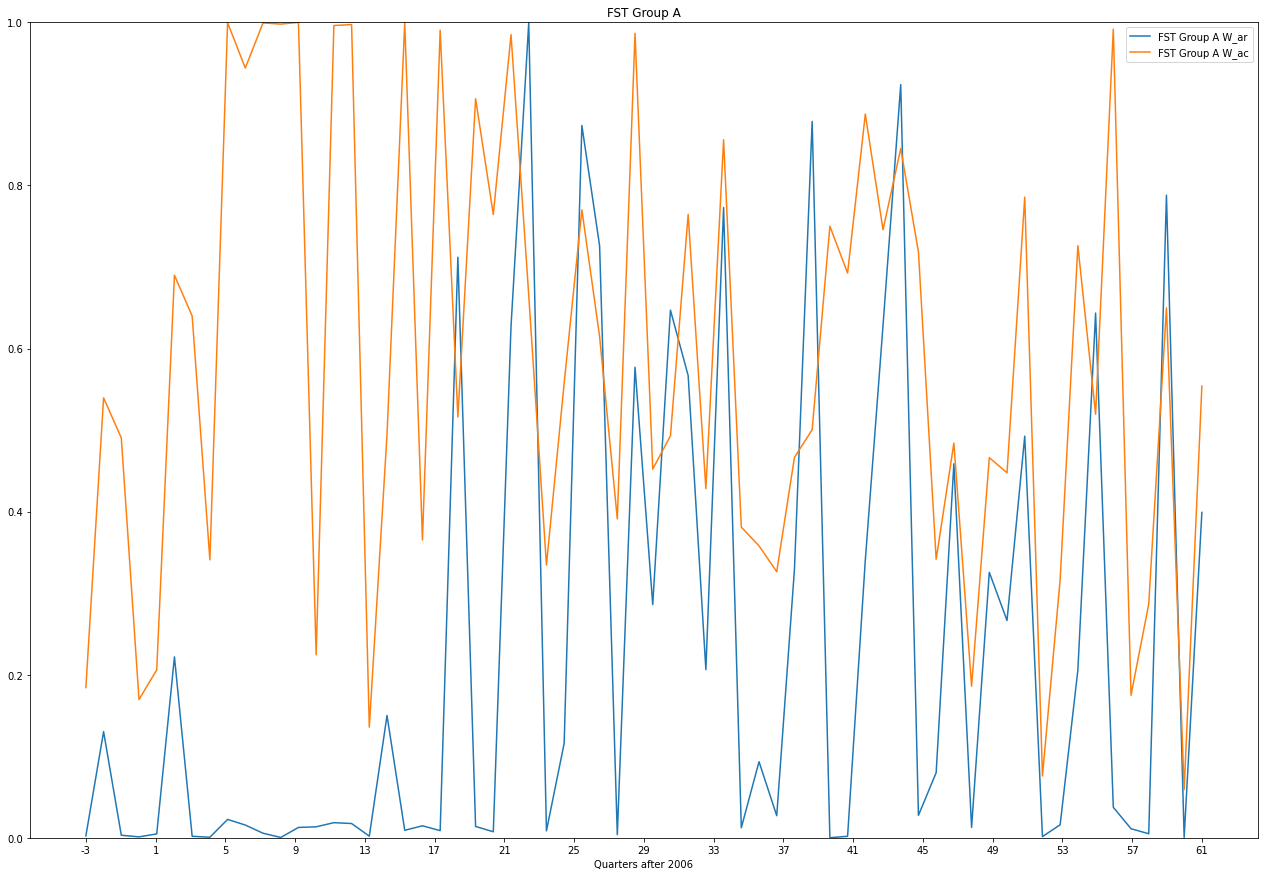

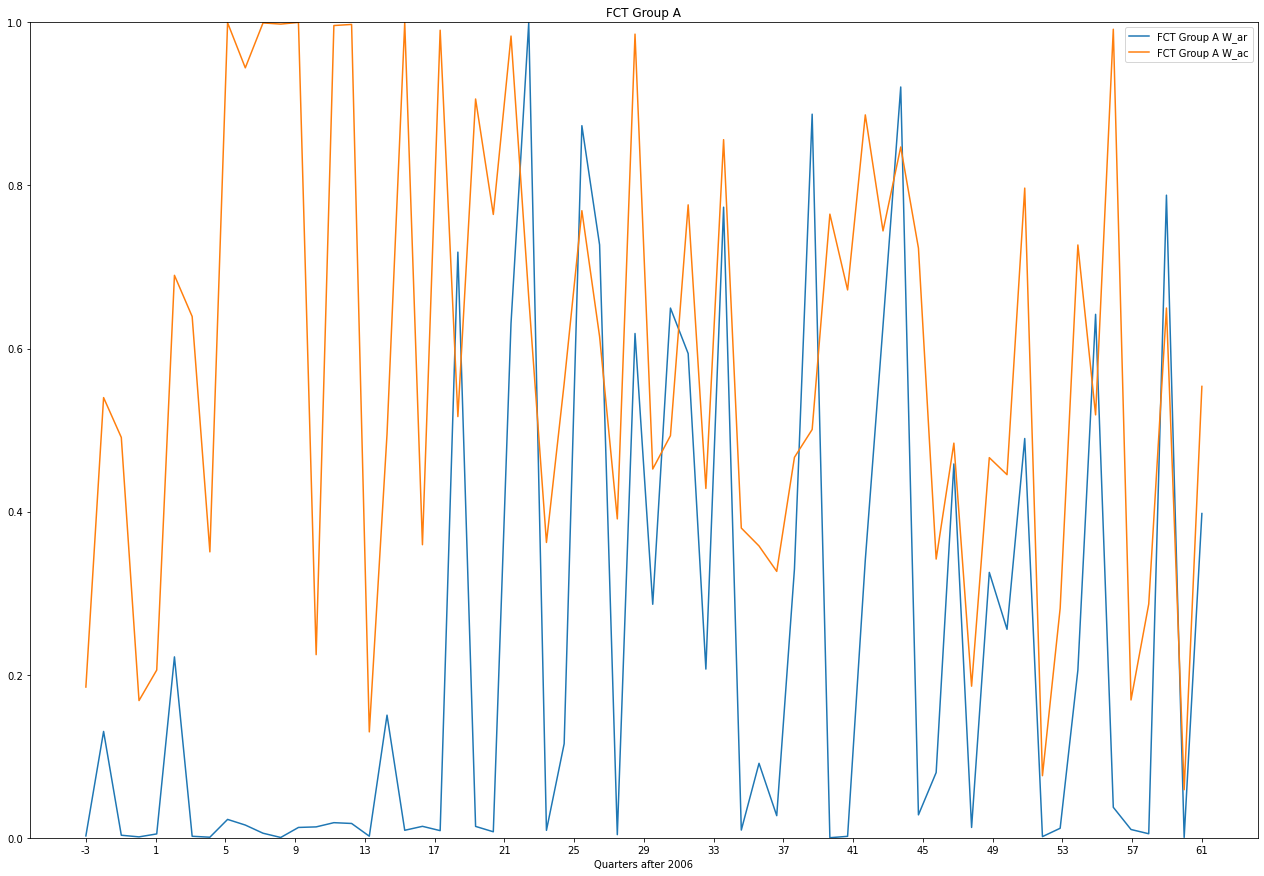

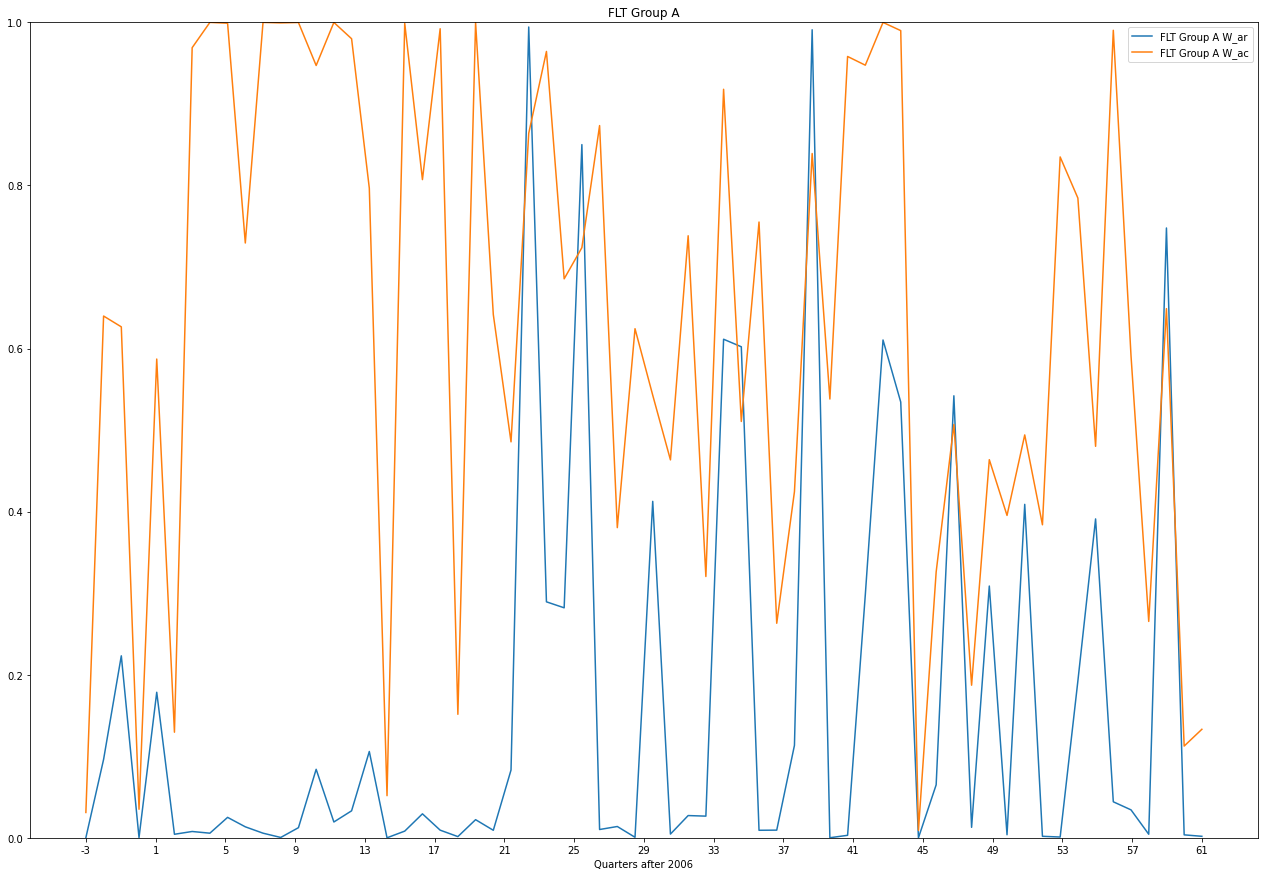

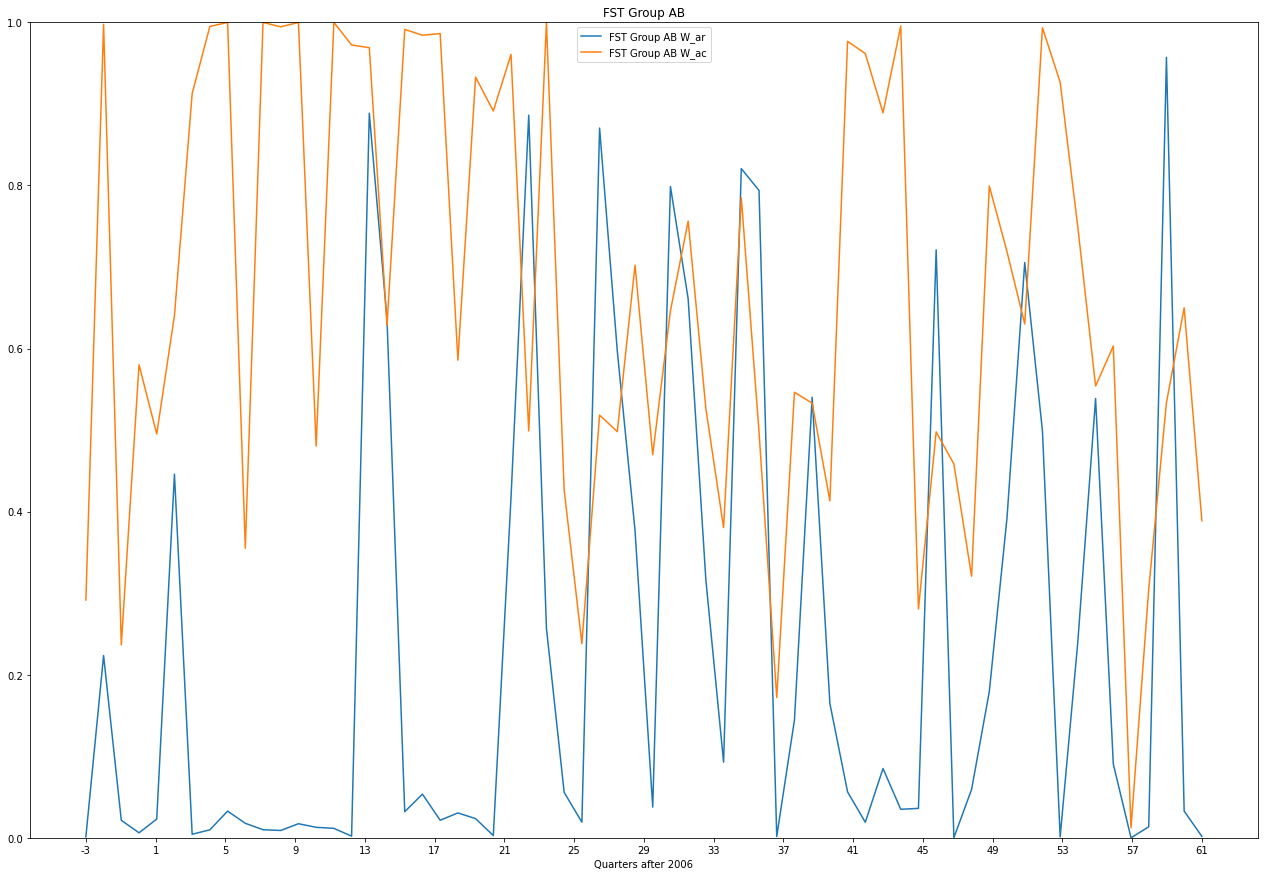

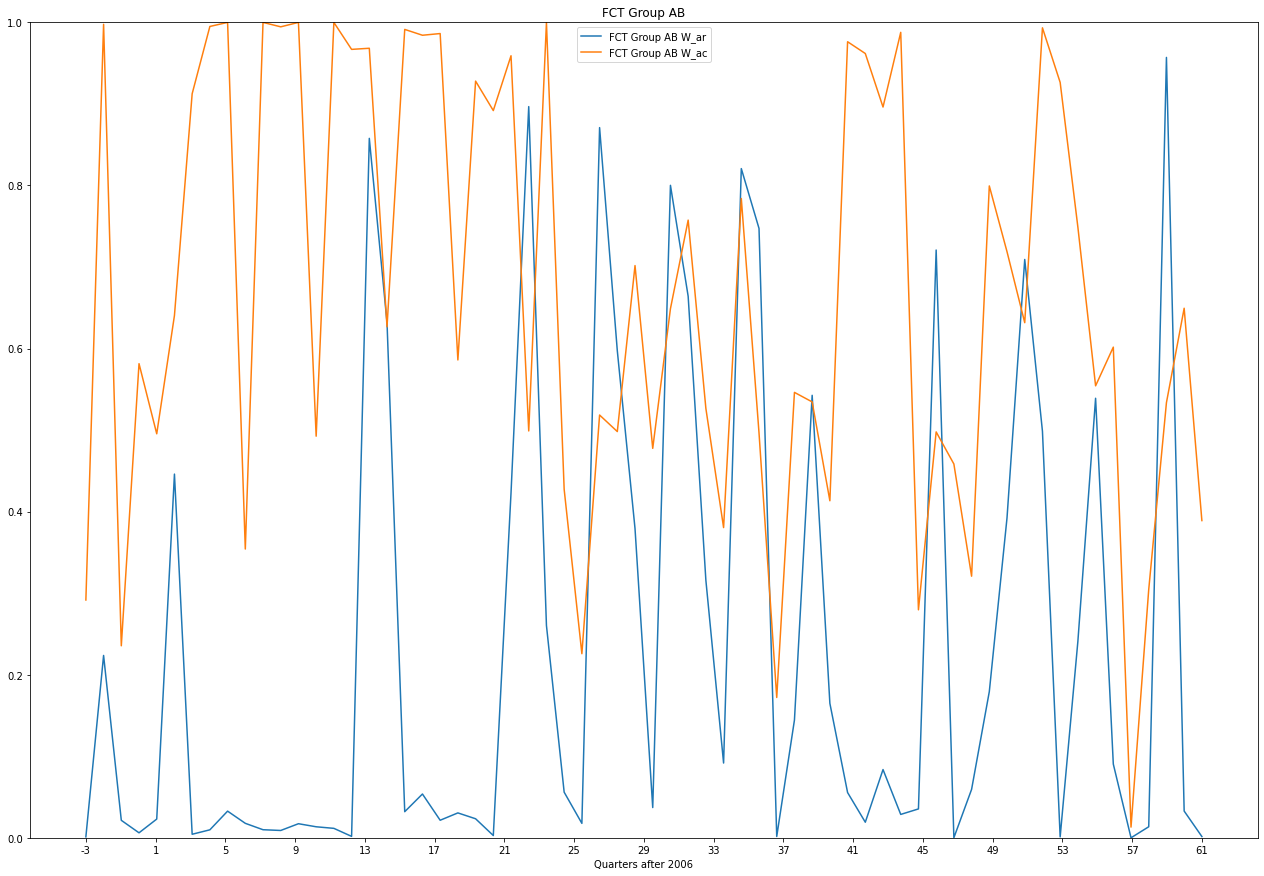

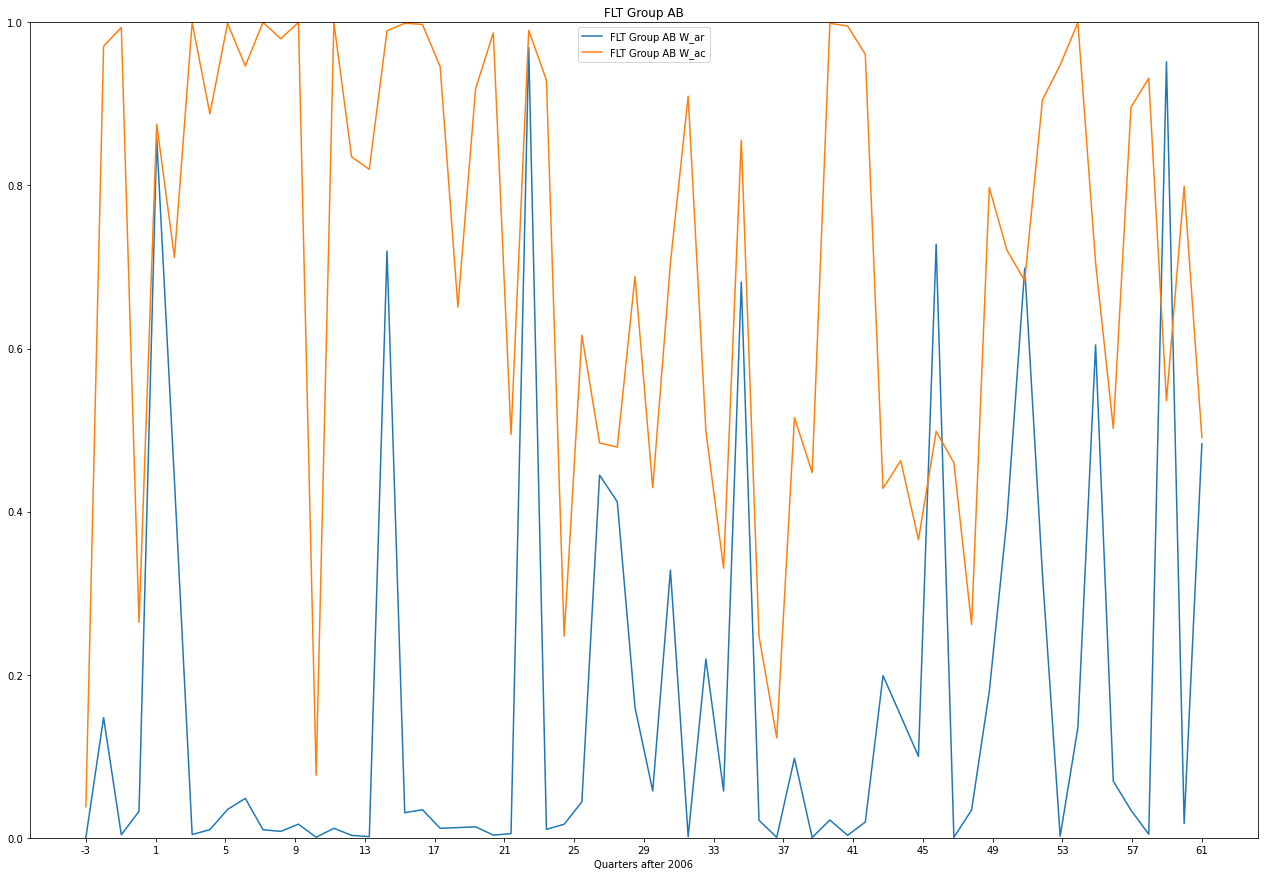

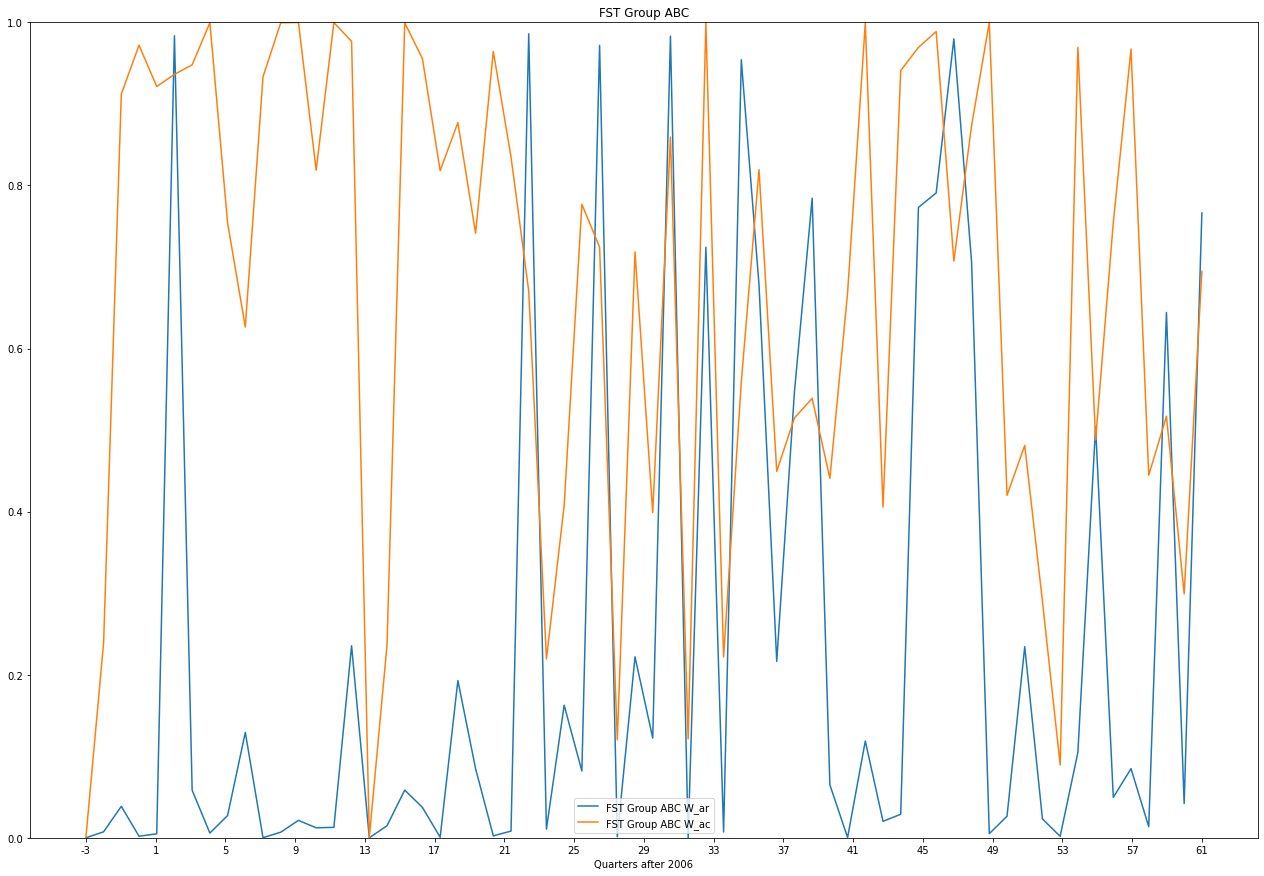

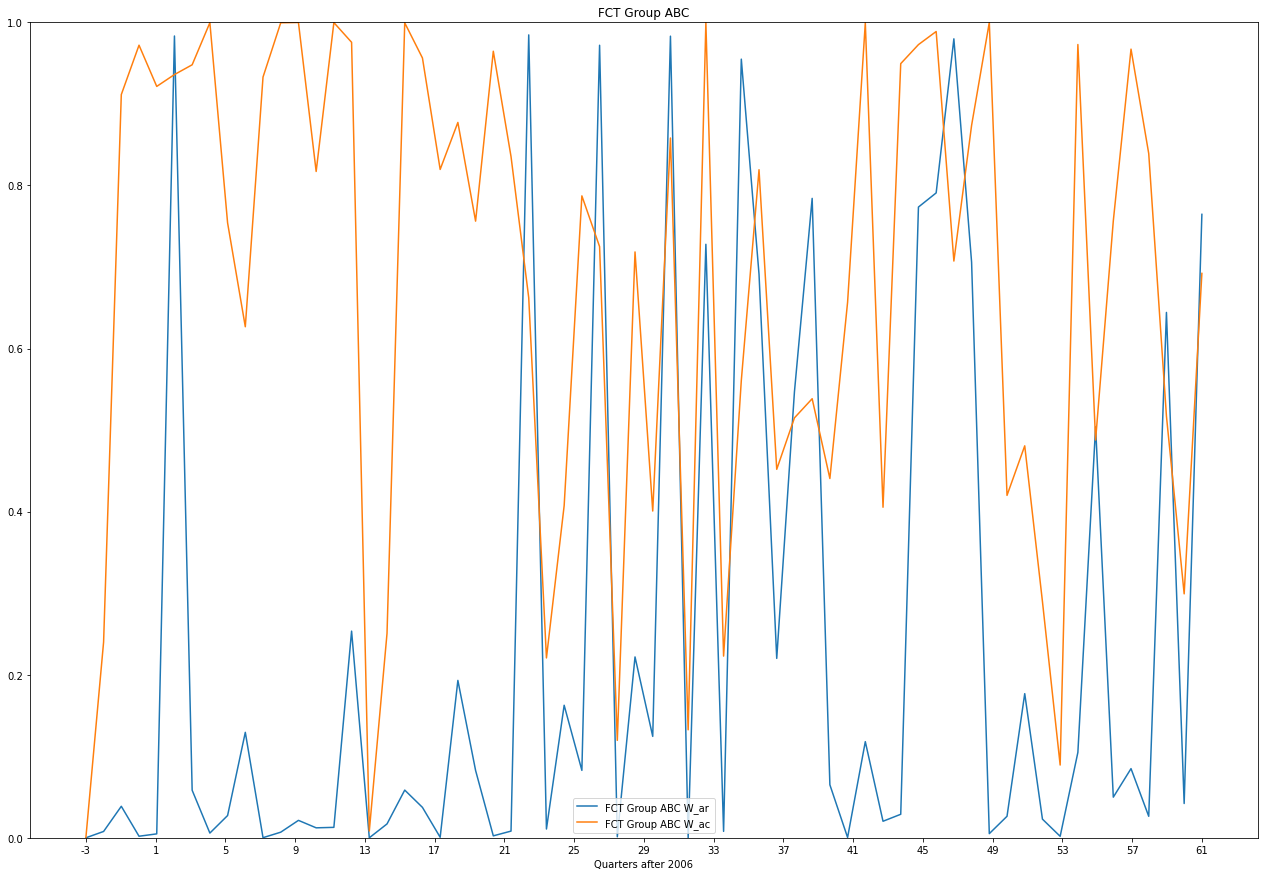

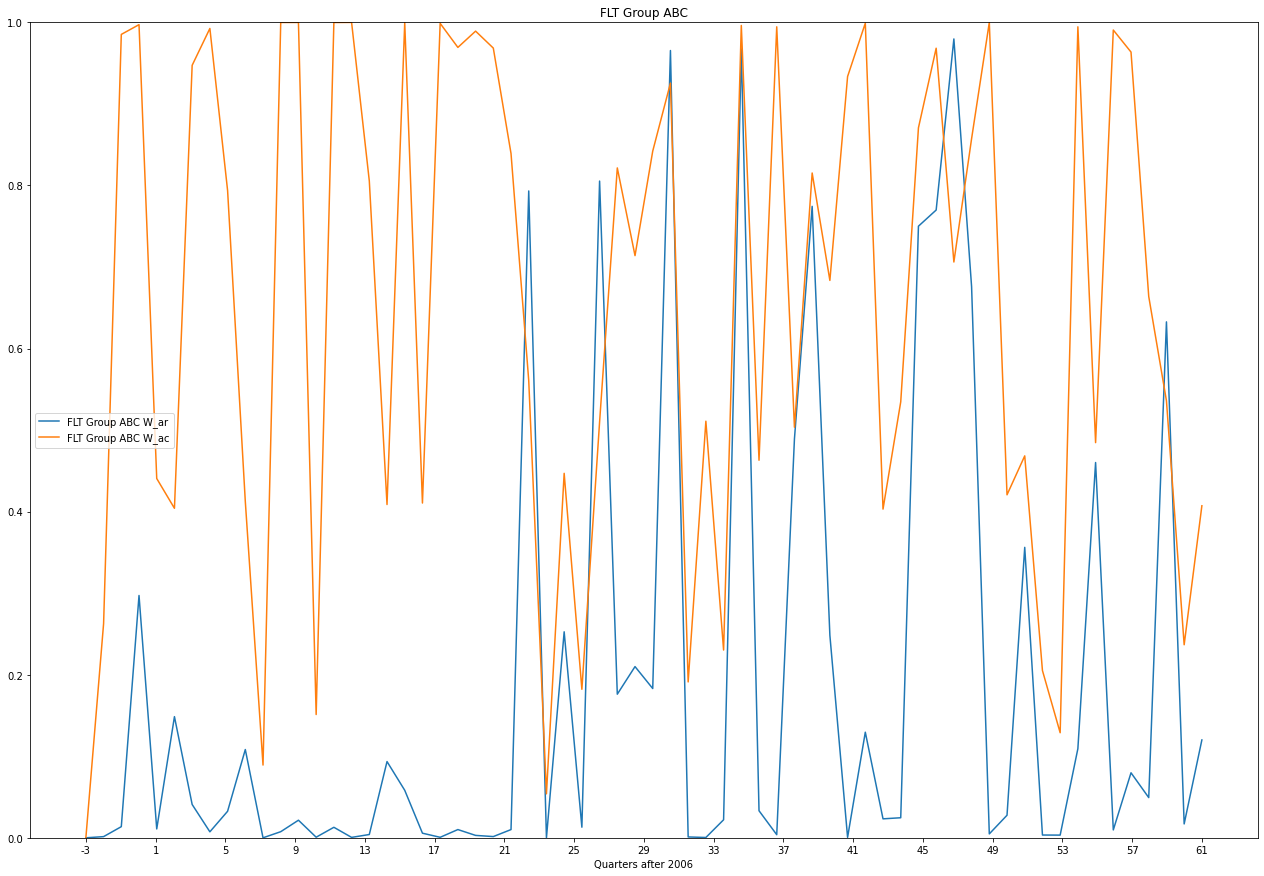

<Figure size 1584x1080 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,15)
arlabelfst = ["FST Group A W_ar","FST Group AB W_ar","FST Group ABC W_ar"]
aclabelfst = ["FST Group A W_ac","FST Group AB W_ac","FST Group ABC W_ac"]
arlabelfct = ["FCT Group A W_ar","FCT Group AB W_ar","FCT Group ABC W_ar"]
aclabelfct = ["FCT Group A W_ac","FCT Group AB W_ac","FCT Group ABC W_ac"]
arlabelflt = ["FLT Group A W_ar","FLT Group AB W_ar","FLT Group ABC W_ar"]
aclabelflt = ["FLT Group A W_ac","FLT Group AB W_ac","FLT Group ABC W_ac"]

tlabelfst = ["FST Group A","FST Group AB","FST Group ABC"]
tlabelfct = ["FCT Group A","FCT Group AB","FCT Group ABC"]
tlabelflt = ["FLT Group A","FLT Group AB","FLT Group ABC"]

xe = np.linspace(0,64,64)
ax = plt.axes()

y = [0,.2,.4,.6,.8,1]

ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])

for p in range(3):
  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  plt.xlabel("Quarters after 2006")
  ax.set_yticks([0,.2,.4,.6,.8,1])
  plt.ylim(0,1)
  plt.plot(xe,qwarfst[p][::-1],label = arlabelfst[p])
  plt.plot(xe,qwacfst[p][::-1],label = aclabelfst[p])
  plt.title(tlabelfst[p])
  plt.legend()
  plt.figure()
  ax = plt.axes()

  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  plt.xlabel("Quarters after 2006")
  ax.set_yticks([0,.2,.4,.6,.8,1])
  plt.ylim(0,1)
  plt.plot(xe,qwarfct[p][::-1],label = arlabelfct[p])
  plt.plot(xe,qwacfct[p][::-1],label = aclabelfct[p])
  plt.title(tlabelfct[p])
  plt.legend()
  plt.figure()

  ax = plt.axes()
  ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
  ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
  plt.xlabel("Quarters after 2006")
  ax.set_yticks([0,.2,.4,.6,.8,1])
  plt.ylim(0,1)
  plt.plot(xe,qwarflt[p][::-1],label = arlabelflt[p])
  plt.plot(xe,qwacflt[p][::-1],label = aclabelflt[p])
  plt.title(tlabelflt[p])
  plt.legend()
  plt.figure()

In [ ]:
ofst = np.zeros((16,3,4))
ofct = np.zeros((16,3,4))
oflt = np.zeros((16,3,4))


count = 0
for i in range(16):
  for j in range(4):
    for k in range(3):
      ofst[i][k][j] = np.sqrt(np.matmul(np.matmul(fst[count],roll_var[i][k][j]),fst[count]))
      ofct[i][k][j] = np.sqrt(np.matmul(np.matmul(fct[count],roll_var[i][k][j]),fct[count]))

      if(k == 0):
        oflt[i][k][j] = np.sqrt(np.matmul(np.matmul(fltfA[i][j],roll_var[i][k][j]),fltfA[i][j]))
      if(k == 1):
        oflt[i][k][j] = np.sqrt(np.matmul(np.matmul(fltfAB[i][j],roll_var[i][k][j]),fltfAB[i][j]))
      if(k == 2):
        oflt[i][k][j] = np.sqrt(np.matmul(np.matmul(fltfABC[i][j],roll_var[i][k][j]),fltfABC[i][j]))     

      count = count + 1

In [ ]:
fstABC = np.zeros((16,4,9))
counter = 0

for i in range(16):
  for j in range(4):
    for k in range(3):
      if(k == 2):
        fstABC[i][j] = fst[counter]
      counter = counter + 1
counter = 0


In [ ]:

x = [0.0,0.0625,0.1250,0.18755, 0.2500, 0.3125, 0.3750, 0.4375,0.5]
vlrf = np.zeros((16,3,4))

count = 0
vrf = np.zeros((16,3,4))
fstarA = np.zeros((16,4,9,3))
fstarAB = np.zeros((16,4,9,6))
fstarABC = np.zeros((16,4,9,9))
mtildeA = np.zeros((16,4,3))
vtildeA = np.zeros((16,4,3,3))
mtildeAB = np.zeros((16,4,6))
vtildeAB = np.zeros((16,4,6,6))
mtildeABC = np.zeros((16,4,9))
vtildeABC = np.zeros((16,4,9,9))

for i in range(16):
  for j in range(4):
    for k in range(3):
      vrf[i][k][j] = np.sqrt(np.matmul(np.matmul(roll_means[i][k][j] - usi[count]*np.ones(len(roll_means[i][k][j])),np.linalg.inv(roll_var[i][k][j])),(roll_means[i][k][j] - usi[count]*np.ones(len(roll_means[i][k][j])))))
      if(k == 0):
        mtildeA[i][j] = 1/(1+usi[count])*(roll_means[i][k][j] - usi[count]*np.ones(len(roll_means[i][k][j])))
        vtildeA[i][j] = 1/((1+usi[count])**2)*(roll_var[i][k][j])
      if(k == 1):
        mtildeAB[i][j] = 1/(1+usi[count])*(roll_means[i][k][j] - usi[count]*np.ones(len(roll_means[i][k][j])))
        vtildeAB[i][j] = 1/((1+usi[count])**2)*(roll_var[i][k][j])
      if(k == 2):
        mtildeABC[i][j] = 1/(1+usi[count])*(roll_means[i][k][j] - usi[count]*np.ones(len(roll_means[i][k][j])))
        vtildeABC[i][j] = 1/((1+usi[count])**2)*(roll_var[i][k][j])        

    count = count + 1


count = 0
for i in range(16):
  for j in range(4):
    for k in range(3):
      if(mflt[i][k][j] > usi[count]):
        vlrf[i][k][j] = (mflt[i][k][j] - usi[count])/oflt[i][k][j]

    count = count + 1
count = 0


xdiffflt = np.zeros((16,3,4,9))

for i in range(16):
  for k in range(3):
    for j in range(4):
      for l in range(9):
        xdiffflt[i][k][j][l] = 1/2*(1+ x[l]*vrf[i][k][j]) + 1/2*np.sqrt((1-x[l] * vrf[i][k][j])**2 + 4*vrf[i][k][j]**2)
        if(k == 2):
          if(x[l] >= vrf[i][k][j]):
            fstarABC[i][j][l] = [0,0,0,0,0,0,0,0,0]
          else:   
            fstarABC[i][j][l] = (1- x[l]/vrf[i][k][j]) *(np.matmul(np.linalg.inv(vtildeABC[i][j]),mtildeABC[i][j])/xdiffflt[i][k][j][l])      

maxer = np.zeros((16,4,9))
mgrowth = np.zeros((16,4,9))
xopt = []
for i in range(16):
  for j in range(4):
    for l in range(9):
      for d in range(252):
        mgrowth[i][j][l] = mgrowth[i][j][l] + np.matmul(roll_ret[i][j][d],fstarABC[i][j][l])
      mgrowth[i][j][l] = mgrowth[i][j][l]/252

    xopt.append(x[np.argmax(mgrowth[i][j])])





In [ ]:

qxoptABC = [[],[],[]]
qvlrfABC = []


for i in range(16):
  for j in range(4):
      qvlrfABC.append(vlrf[i][1][j])
xopt = xopt[3:]
qvlrfABC = qvlrfABC[3:]
del qvlrfABC[-1]
del qvlrfABC[-1]
del qvlrfABC[-1]

del xopt[-1]
del xopt[-1]
del xopt[-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


<Figure size 1584x720 with 0 Axes>

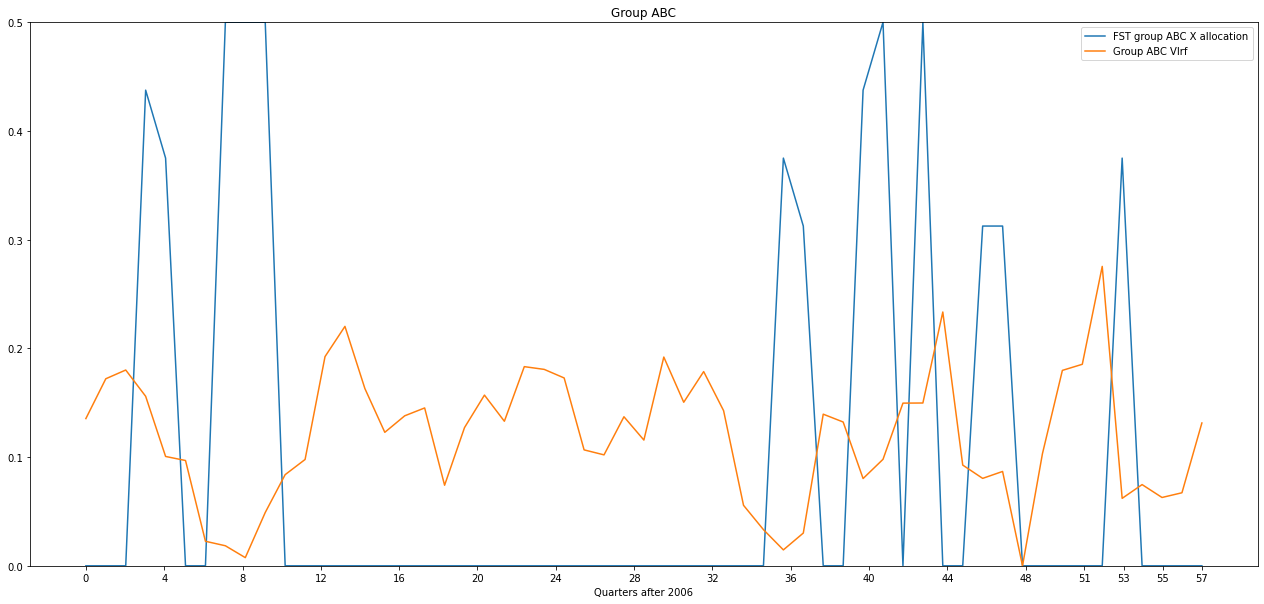

<Figure size 1584x720 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,10)
del qvlrfABC[-1]
del xopt[-1]
xe = np.linspace(0,57,57)
ax = plt.axes()

y = [0,.2,.4,.6,.8,1]

ax = plt.axes()
ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,51,53,55,57])
plt.xlabel("Quarters after 2006")
ax.set_yticks([0,.1,.2,.3,.4,.5])
plt.ylim(0,.5)
plt.plot(xe,xopt[::-1],label = "FST group ABC X allocation")
plt.plot(xe,qvlrfABC[::-1],label = "Group ABC Vlrf")
plt.title("Group ABC")
plt.legend()
plt.figure()

In [ ]:
uefst = np.zeros((16,3,4))

count = 0


for i in range(16):
  for j in range(4):
    for k in range(3):
      uef = roll_u[i][k][j] + roll_v[i][k][j] * math.sqrt(roll_var[i][k][j][1][1] - roll_o[i][k][j]**2)
      uif = roll_u[i][k][j] - roll_v[i][k][j] * math.sqrt(roll_var[i][k][j][1][1] - roll_o[i][k][j]**2)  
      uefst[i][k][j] = ((uef - (roll_means[i][k][j][1]))/(uef - uif))


In [ ]:
qefficiency = []
for i in range(16):
  for j in range(4):
    qefficiency.append(uefst[i][2][j])
print(qefficiency)

[0.6921133877191159, 0.5935299046567215, 0.6147758485044124, 0.6001248784620784, 0.500196967751946, 0.47924453868235367, 0.4921339101591282, 0.4707653366541977, 0.6044515657104864, 0.5568138011035364, 0.5500662910436959, 0.5549511106159009, 0.4822776059096819, 0.5233831131246118, 0.5254643563345939, 0.48908288669435174, 0.533291727533707, 0.49313166206159254, 0.5001444570922715, 0.5016555111331198, 0.5263428866127651, 0.5975084327194197, 0.5678381198180642, 0.5389962441636497, 0.5301733757733692, 0.5539107888049373, 0.5354500403972048, 0.602975657269857, 0.6540323778651765, 0.5967568894441548, 0.5820713344197695, 0.571548120501979, 0.5389390269798173, 0.5492263645228966, 0.537165059504795, 0.5945126335895105, 0.5360486850415224, 0.5668975230562613, 0.5242029768986665, 0.5445608214879377, 0.5100057579971324, 0.5069956572038502, 0.560072227373853, 0.5543402012190712, 0.5793154118053918, 0.5398714983319381, 0.6446607517156068, 0.6643154977192303, 0.5327399025629472, 0.493538264645242, 0.4

In [ ]:
prox= []
#Proximity

for i in range(16):
  for j in range(4):
    oo = roll_o[i][2][j]
    ot = (roll_means[i][2][j][2] - roll_u[i][2][j])/roll_v[i][2][j]
    o_n = np.sqrt(oo**2 + ot**2)

    prox.append(math.sqrt(1 - (o_n**2)/roll_var[i][2][j][2][2]))
print(prox)

[0.6063094585903711, 0.5584968930586696, 0.5421978157829495, 0.5434595773166466, 0.47654404386957455, 0.4958156205496386, 0.5436265811670162, 0.6259516681997133, 0.7376847075416669, 0.6684597299236376, 0.6170174063503169, 0.5851607356321216, 0.5861957606494275, 0.58794738766608, 0.6087492066834757, 0.6018604772043502, 0.6851276163138718, 0.7685459605455068, 0.7071034154838154, 0.7120861526924291, 0.6451269565388618, 0.5590813686408443, 0.607798273290651, 0.626516673504385, 0.6339606110334, 0.6398527961412699, 0.6353881683138776, 0.6234619096966662, 0.6270079241844246, 0.5784214200417123, 0.5985774917060032, 0.5855485865594523, 0.5624341101997778, 0.603326925545457, 0.592762831476575, 0.6735910791737333, 0.684160352667222, 0.7286456533780775, 0.7608855709012744, 0.7549228764110412, 0.7504403428940065, 0.7077700831680767, 0.6830084874465131, 0.6893361587911069, 0.6700098244968694, 0.6806576946065765, 0.6173151856440832, 0.48988682588757704, 0.4732391993176496, 0.4512954847259419, 0.46532

In [ ]:
stability = []
count = 0
for i in range(16):
  for j in range(4):
    stability.append(1/(1+((roll_u[i][2][j] - usi[count])**2)/(roll_v[i][2][j]**2 * roll_o[i][2][j]**2)))
    count = count + 1

In [ ]:
Amaxf = []

dsf = -1000

counter = 0
ufltfl = np.zeros((16,4))
for i in range(16):
  for j in range(4):
    ufltfl[i][j] = ufltf[i][2][j]

for j in range(16): #Liquidity
  for k in range(4):
    dsA = -1000
    for i in range(252):
      dsA = max(dsA,np.matmul(roll_ret[j][k][i].T,fltfABC[j][k]) * (-1)) 
      ufltfl[j][k] = ufltfl[j][k] + ((1/252) * np.matmul(roll_ret[j][k][i],fltfABC[j][k]))
    if(counter > 2):
     Amaxf.append(dsA + ufltfl[j][k]/(1 + ufltfl[j][k]))
    counter = counter + 1

<Figure size 1584x720 with 0 Axes>

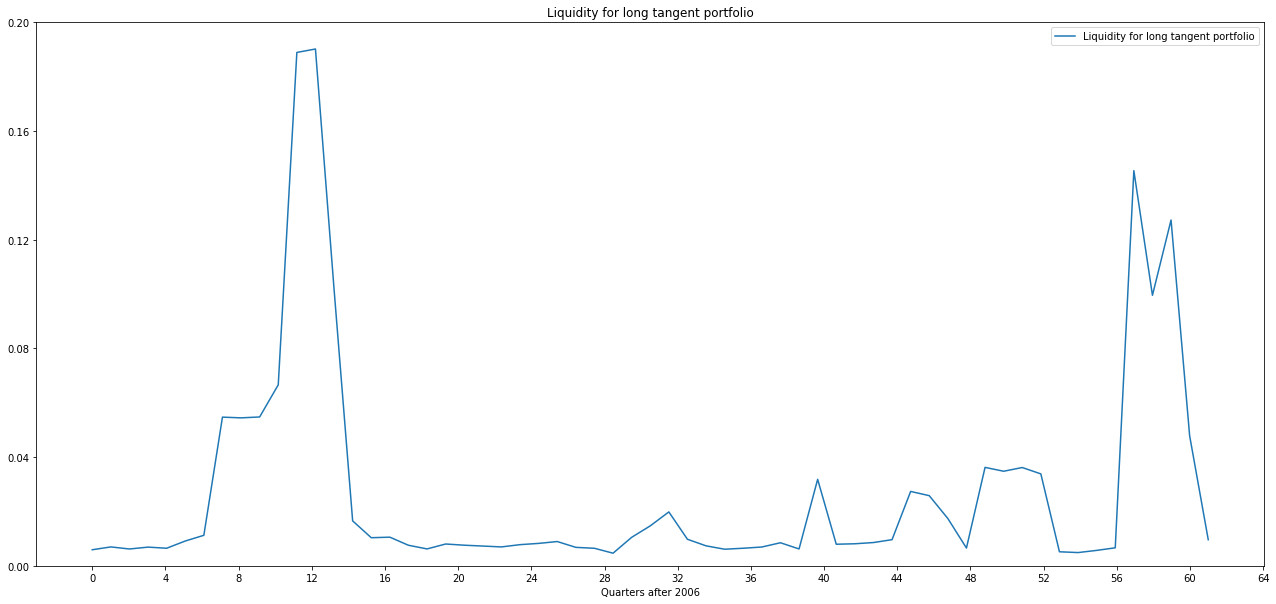

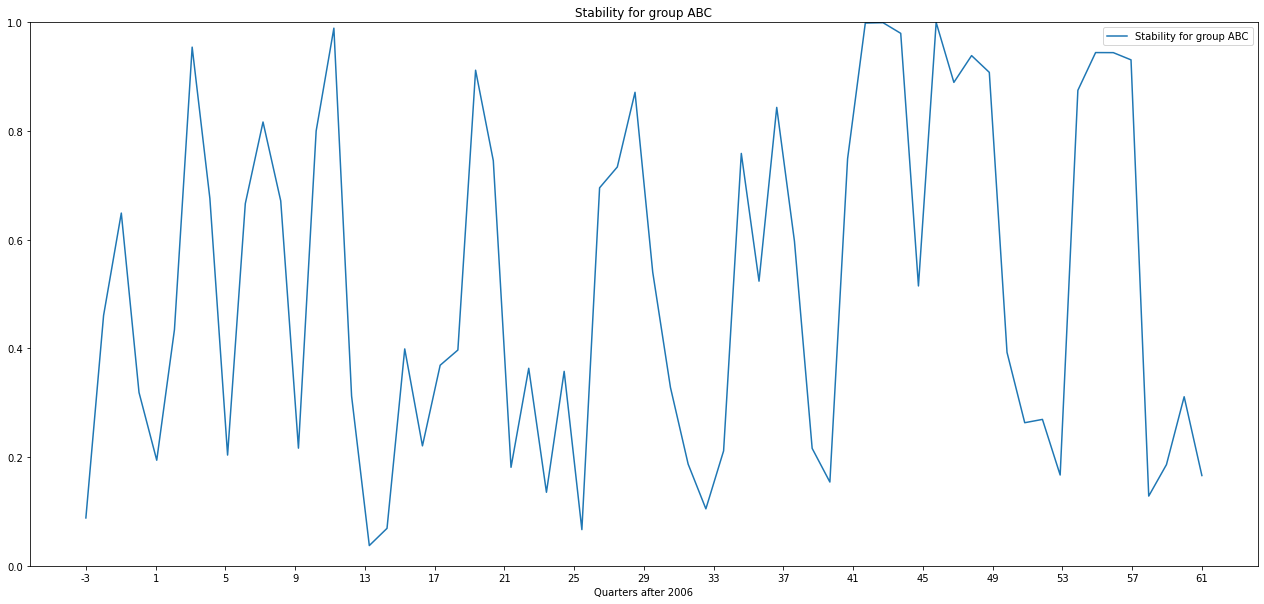

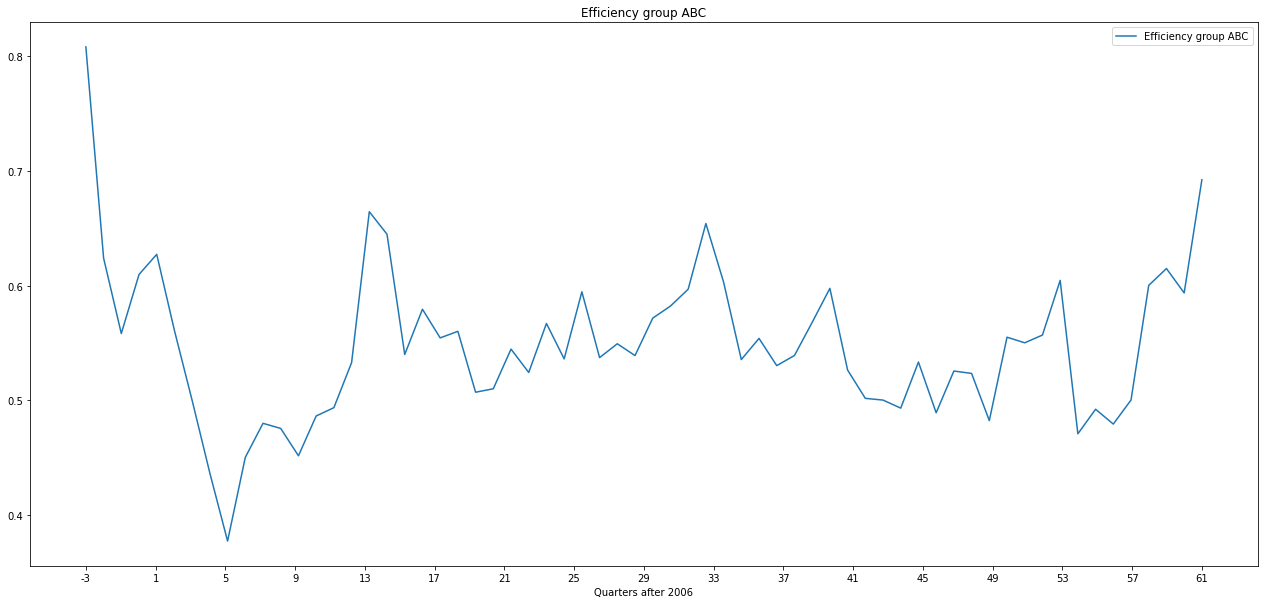

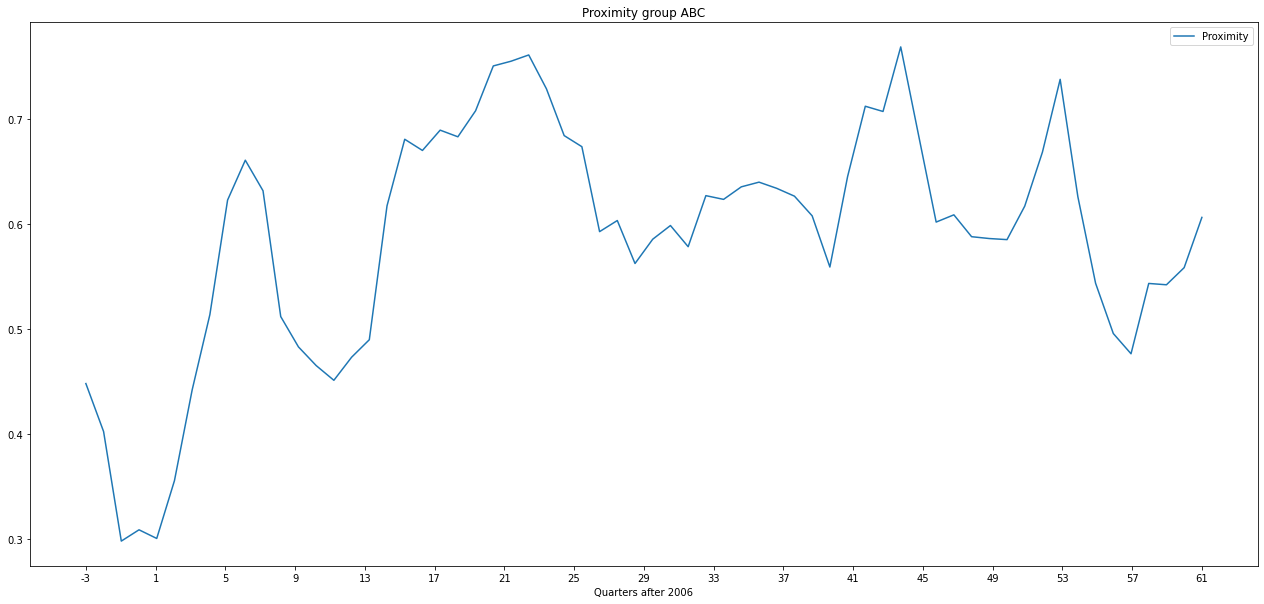

<Figure size 1584x720 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"]=(22,10)


tlabelfst = ["FST Group A","FST Group AB","FST Group ABC"]
tlabelfct = ["FCT Group A","FCT Group AB","FCT Group ABC"]
tlabelflt = ["FLT Group A","FLT Group AB","FLT Group ABC"]

xe = np.linspace(0,61,61)


y = [0,.2,.4,.6,.8,1]

ax = plt.axes()
ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])

plt.xlabel("Quarters after 2006")
ax.set_yticks([0,.04,.08,.12,.16,.2])
plt.ylim(0,.2)
plt.plot(xe,Amaxf[::-1],label = "Liquidity for long tangent portfolio")
plt.title("Liquidity for long tangent portfolio")
plt.legend()
plt.figure()
xe = np.linspace(0,64,64)


ax = plt.axes()
ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
plt.xlabel("Quarters after 2006")
ax.set_yticks([0,.2,.4,.6,.8,1])
plt.ylim(0,1)
plt.plot(xe,stability[::-1],label = "Stability for group ABC")
plt.title("Stability for group ABC")
plt.legend()
plt.figure()



ax = plt.axes()
ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
plt.xlabel("Quarters after 2006")

plt.plot(xe,qefficiency[::-1],label = "Efficiency group ABC")
plt.title("Efficiency group ABC")
plt.legend()
plt.figure()



ax = plt.axes()
ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64])
ax.set_xticklabels(['-3','1','5','9','13','17','21','25','29','33','37','41','45','49','53','57','61'])
plt.xlabel("Quarters after 2006")

plt.plot(xe,prox[::-1],label = "Proximity")
plt.title("Proximity group ABC")
plt.legend()
plt.figure()


